# <font color='Green'>Problem Statement :</font>

#### The lending company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read loan dataset from csv file
loan_df  = pd.read_csv('loan.csv', low_memory=False) 

In [3]:
loan_df.shape

(39717, 111)

## <font color='Blue'>Filter Loan Status</font>

<p> As the Current loans are not going to help in identifying the driving factors of loan default filtering those records from the dataset

In [4]:
loan_df.shape

(39717, 111)

In [5]:
# Remove the data with Current loan status
loan_df = loan_df[loan_df.loan_status != 'Current']  

In [6]:
loan_df.shape

(38577, 111)

## <font color='Blue'>Data Cleaning</font>

## <font color='purple'>Removing NA / Unnecessary columns</font>

#### Removing all NA columns

In [7]:
# Dropping columns with all NA values
loan_df.dropna(axis=1, how='all', inplace=True) 

In [8]:
loan_df.shape

(38577, 56)

#### Removing columns with more than 80% NA values as these columns do not have enough datapoints

In [9]:
# Dropping columns with NA values more than 80%
loan_df.drop(list(loan_df.columns[loan_df.isna().mean() > 0.8]), axis=1, inplace=True)

In [10]:
loan_df.shape

(38577, 55)

#### Removing all the columns with single values as any column with all the single values in it cannot contribute to any decision making for loan default

In [11]:
# List the columns which have single values
singleValuedCols = [c for c in loan_df.columns if len(loan_df[c].value_counts()) == 1]
singleValuedCols

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [12]:
loan_df.drop(singleValuedCols, axis=1, inplace=True)

In [13]:
loan_df.shape

(38577, 44)

#### Now, removing the columns which do not have significant impact on the loan default behaviour

In [14]:
# Drop columns 'id','member_id','url','collection_recovery_fee','last_pymnt_d','installment','recoveries', 'desc', 'title'
loan_df.drop(['id','member_id','url','collection_recovery_fee','last_pymnt_d','installment','recoveries', 'desc', 'title'], axis=1, inplace=True)

In [15]:
loan_df.shape

(38577, 35)

## <font color='purple'>Fixing Missing Values ( Rows )</font>

##### Below is the list of columns where the sum of NA values greater than zero

In [16]:
loan_df.columns[loan_df.isna().sum() > 0]

Index(['emp_title', 'emp_length', 'mths_since_last_delinq', 'revol_util',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
len(loan_df[loan_df.emp_length.isna()])

1033

In [18]:
len(loan_df[loan_df.emp_title.isna()])

2386

##### Removing all the rows where emp_length and emp_title is NA as these two are an important factors that can drive the loan default bhaviour of the customer and cannot be derived from any other column

In [19]:
# Dropping rows where 'emp_length', 'emp_title' values are NA
loan_df.dropna(subset=['emp_length', 'emp_title'],inplace=True)

##### Using mode imputation on 'mths_since_last_delinq', 'revol_util', 'pub_rec_bankruptcies' continuous values as these columns can be filled with other values that are frequently appearing in the dataset

In [20]:
print("Mode : ", loan_df.mths_since_last_delinq.mode())

# Imputing NA values with mode
loan_df.mths_since_last_delinq.fillna(0, inplace=True)

Mode :  0    0.0
Name: mths_since_last_delinq, dtype: float64


In [21]:
print("Mode : ", loan_df.pub_rec_bankruptcies.mode())

# Imputing NA values with mode
loan_df.pub_rec_bankruptcies.fillna(0, inplace=True)

Mode :  0    0.0
Name: pub_rec_bankruptcies, dtype: float64


#### Impute revol_util column with median
##### Since this is a continuous numerical variable, we can impute using either the mean or the median but considering outliers in the data, replace all null values with the median value.

In [22]:
# Fixing revol_util column data type to numeric by trimming '%' in the string

loan_df.revol_util = loan_df.revol_util.apply(lambda x : float(str(x).rstrip('%')))

In [23]:
print("Median : ", loan_df.revol_util.median())

Median :  49.5


In [24]:
# Imputing NA values with median
loan_df.revol_util.fillna(loan_df.revol_util.median(), inplace=True)

In [25]:
# Reseting index after dropping the rows
loan_df = loan_df.reset_index(drop=True)

## <font color='purple'> Correcting data types </font>

<p> int_rate column can be used for range calculations but is derived as object
<p> emp_length column can be used for range calculations but is derived as object


In [26]:
loan_df.dtypes

loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                float64
total_acc                   int64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prnc

#### Fixing int_rate column data type

In [27]:
loan_df.int_rate.value_counts()

10.99%    862
11.49%    739
7.51%     732
13.49%    711
7.88%     674
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
15.01%      1
Name: int_rate, Length: 368, dtype: int64

In [28]:
# Fixing int_rate column data type to numeric by trimming '%' in the string
loan_df.int_rate = loan_df.int_rate.apply(lambda x : float(str(x).rstrip('%')))

#### Fixing emp_length column

In [29]:
loan_df.emp_length.value_counts()

10+ years    8156
2 years      4178
< 1 year     4127
3 years      3901
4 years      3266
5 years      3091
1 year       3067
6 years      2099
7 years      1663
8 years      1391
9 years      1197
Name: emp_length, dtype: int64

In [30]:
# Fixing emp_length column data type to numeric by removing all the string values in the data

loan_df.emp_length.replace('10+ years',10, inplace=True)
loan_df.emp_length.replace('< 1 year',0, inplace=True)
loan_df.emp_length = loan_df.emp_length.apply(lambda x : int(str(x).split(' year')[0]))

# <font color='blue'>Analysis</font>

## <font color='purple'>Types Of variables<font>

In [31]:
# Grouping columns by data types
loan_df.columns.groupby(loan_df.dtypes)

{int64: ['loan_amnt', 'funded_amnt', 'emp_length', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc'], float64: ['funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'], object: ['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d']}

##### As grouped above there are following continous and non continuous variables in the data

#### Continuous Variables

<p> ['loan_amnt', 'funded_amnt', 'emp_length', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc']
    
<p> ['funded_amnt_inv', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']
    
    
#### Non Continuous Variable
    
<p> ['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d']
    

In [32]:
continuous = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti', 'emp_length', 'annual_inc', 'delinq_2yrs', 'mths_since_last_delinq', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'open_acc', 'total_acc', 'revol_bal','revol_util', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']

In [33]:
categorical = ['term', 'emp_title', 'zip_code', 'addr_state',  'verification_status','issue_d','last_credit_pull_d', 'loan_status', 'purpose', 'grade', 'sub_grade', 'home_ownership', 'earliest_cr_line']

## <font color='purple'>Univariate Analaysis for continuous data</font>

In [34]:
def annotate_boxplot(bpdict):
    
    # This function gets the box plot output as a parameter and annotates the whisker, quantile and median values in the box plot
    
    # Get the whisker values
    minV = bpdict['caps'][0].get_ydata()[0]   
    maxV = bpdict['caps'][1].get_ydata()[0]
    
    # Get the quantile values
    q1 = bpdict['boxes'][0].get_ydata()[0]
    q2 = bpdict['boxes'][0].get_ydata()[2]
    
    # Get Median value
    median = bpdict['medians'][0].get_ydata()[0]   
    
    # Adding annotations on the whisker, quantile and median locations with values derived above
    plt.annotate(median, (1.10, median))
    plt.annotate(q1, (1.10, q1))
    plt.annotate(q2, (1.10, q2))
    plt.annotate(minV, (1.10, minV))
    plt.annotate(maxV, (1.10, maxV))

In [35]:
def univariate_plot_continuous(columnName):
    
    # Get the 1*2 grid and plot the subplots as specified below
    figure, axis=plt.subplots(nrows =1,ncols=2,figsize=(20,10))

    # Histplot for the given column in the first column of the grid
    axis[0].set_title("Distribution Plot for "+columnName)    
    sns.histplot(loan_df[columnName],ax=axis[0], kde=True)
    
    # Boxplot for the given column in the second column of the grid
    axis[1].set_title("Box Plot for " + columnName)
    bplt = plt.boxplot(loan_df[columnName])
    annotate_boxplot(bplt)
    
    plt.show()

#### Plotting continous variables to see the data trend

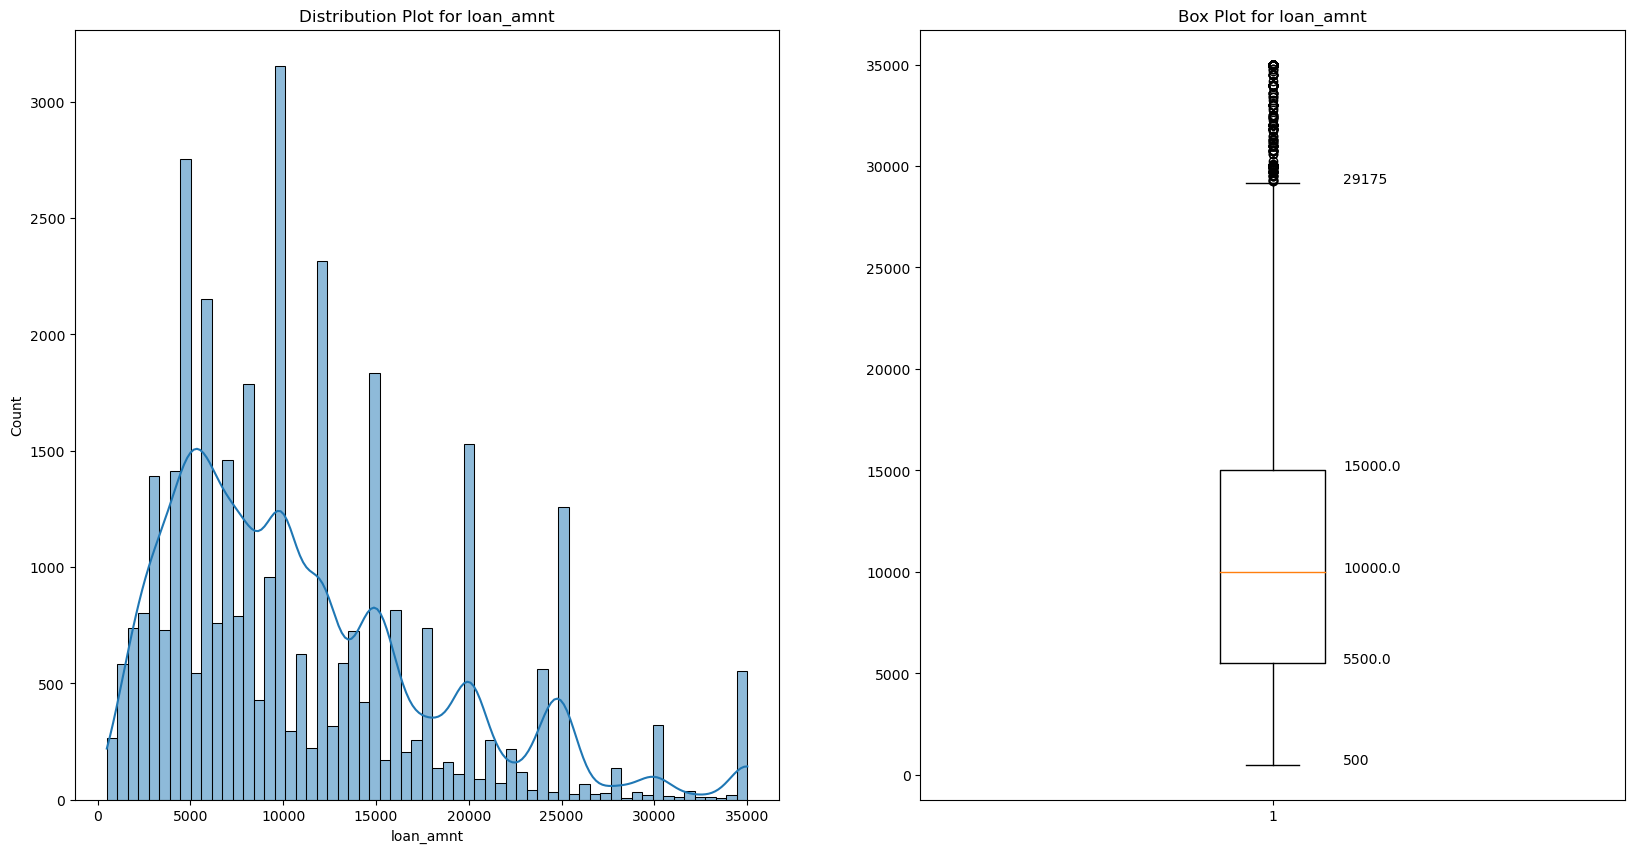

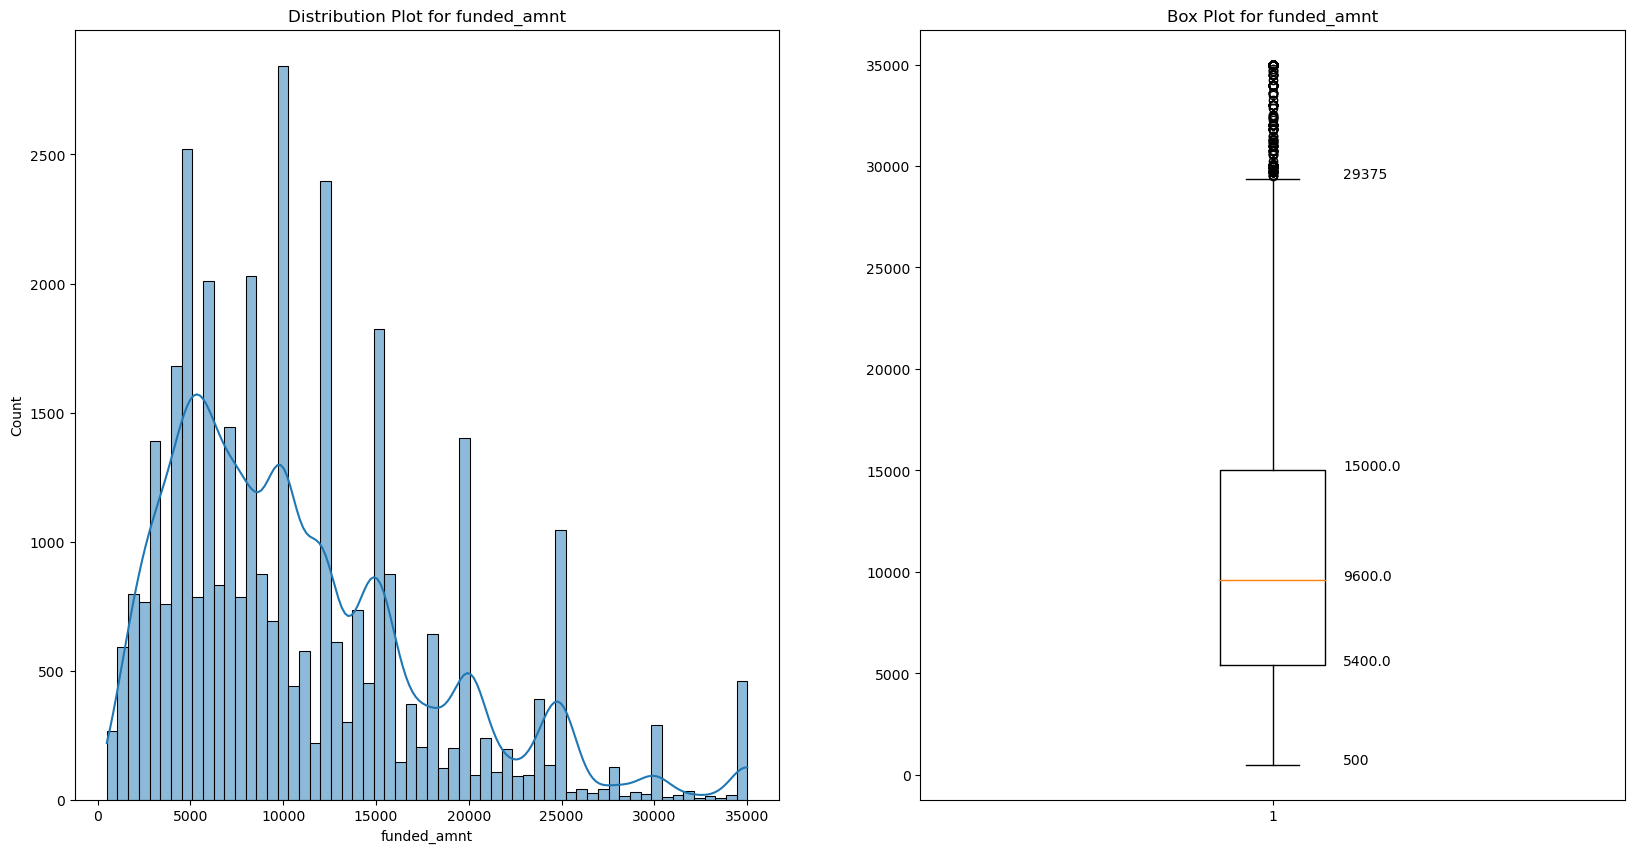

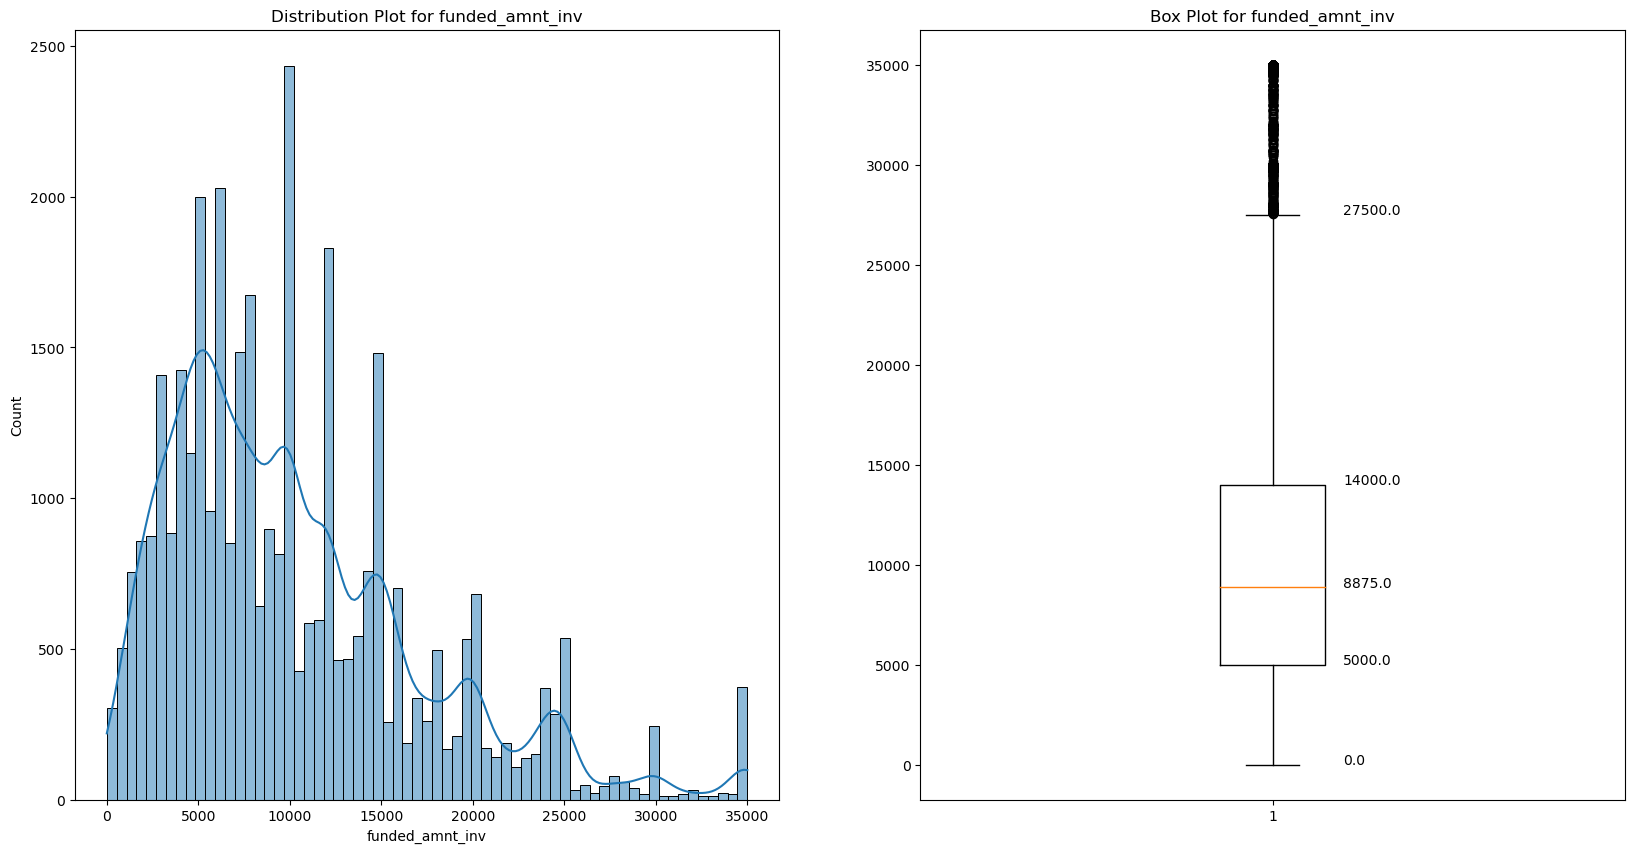

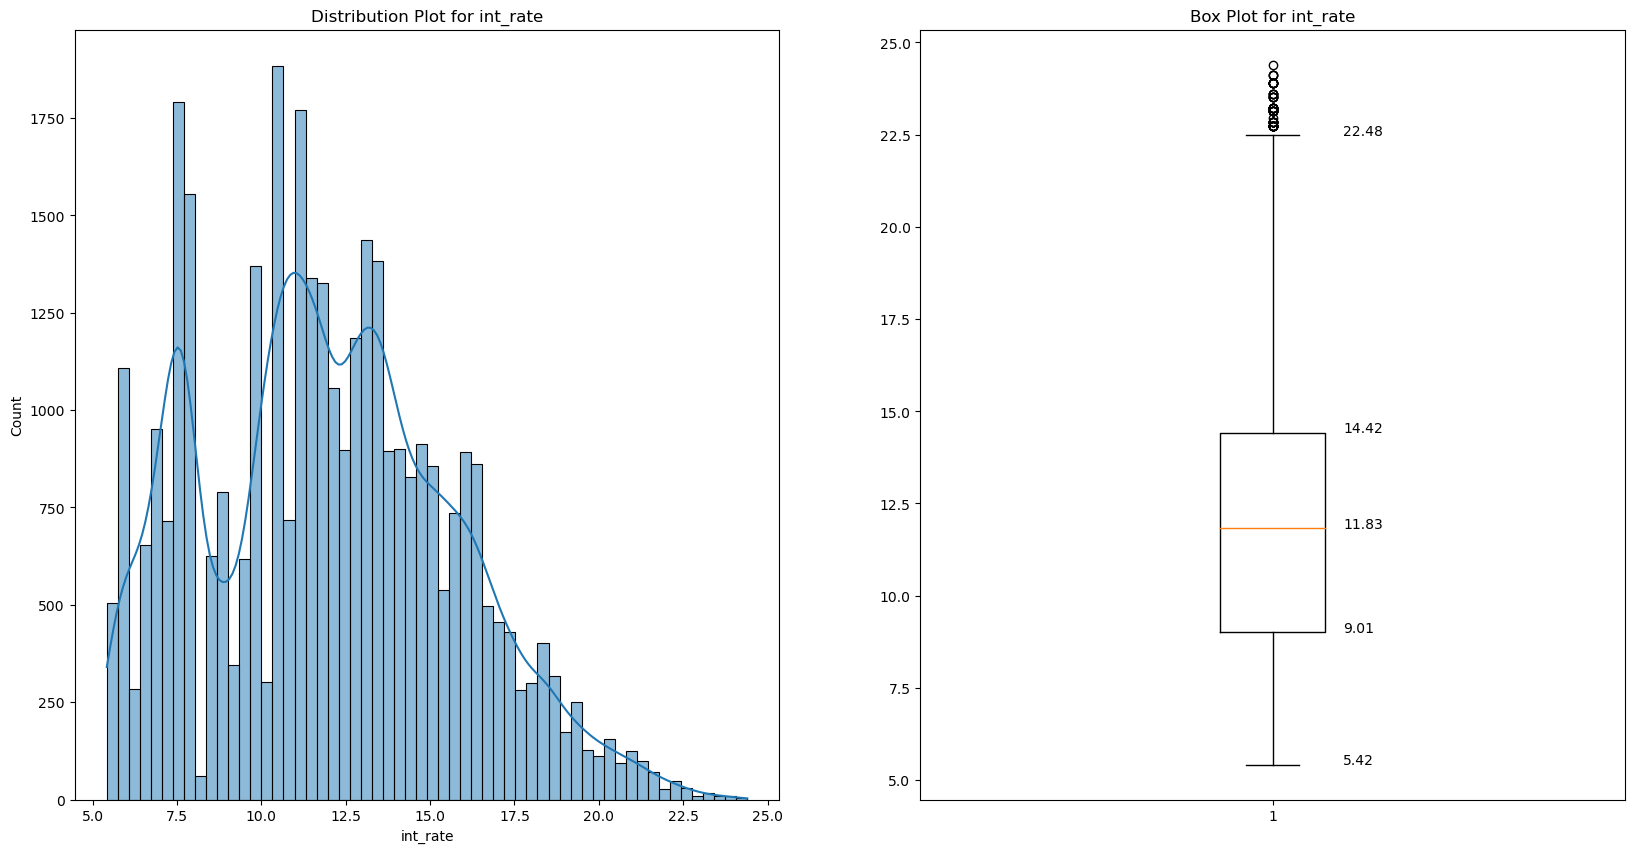

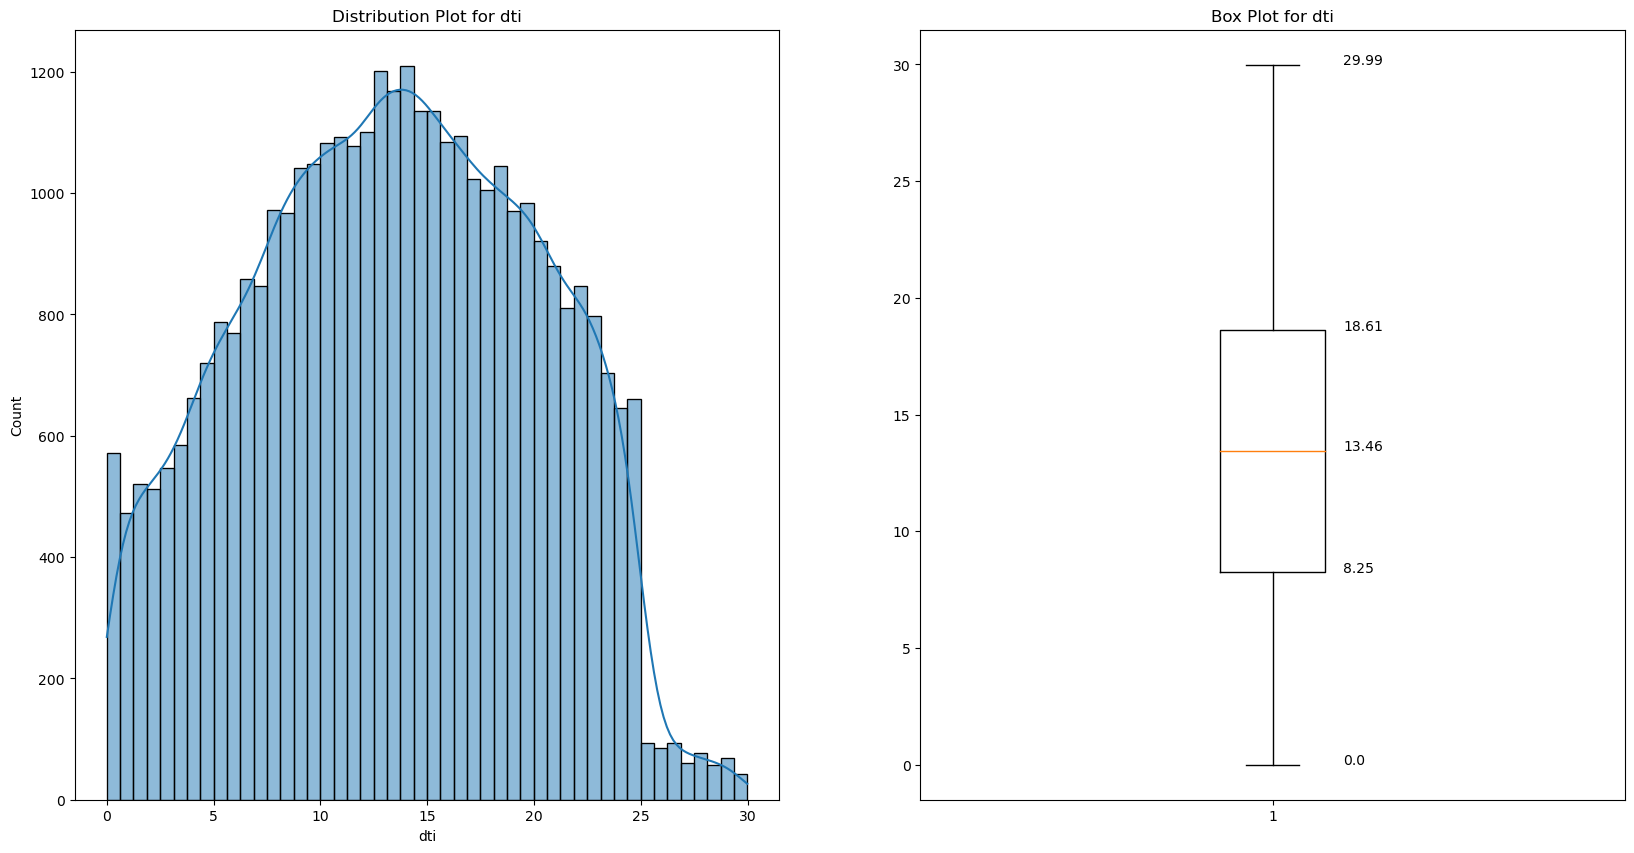

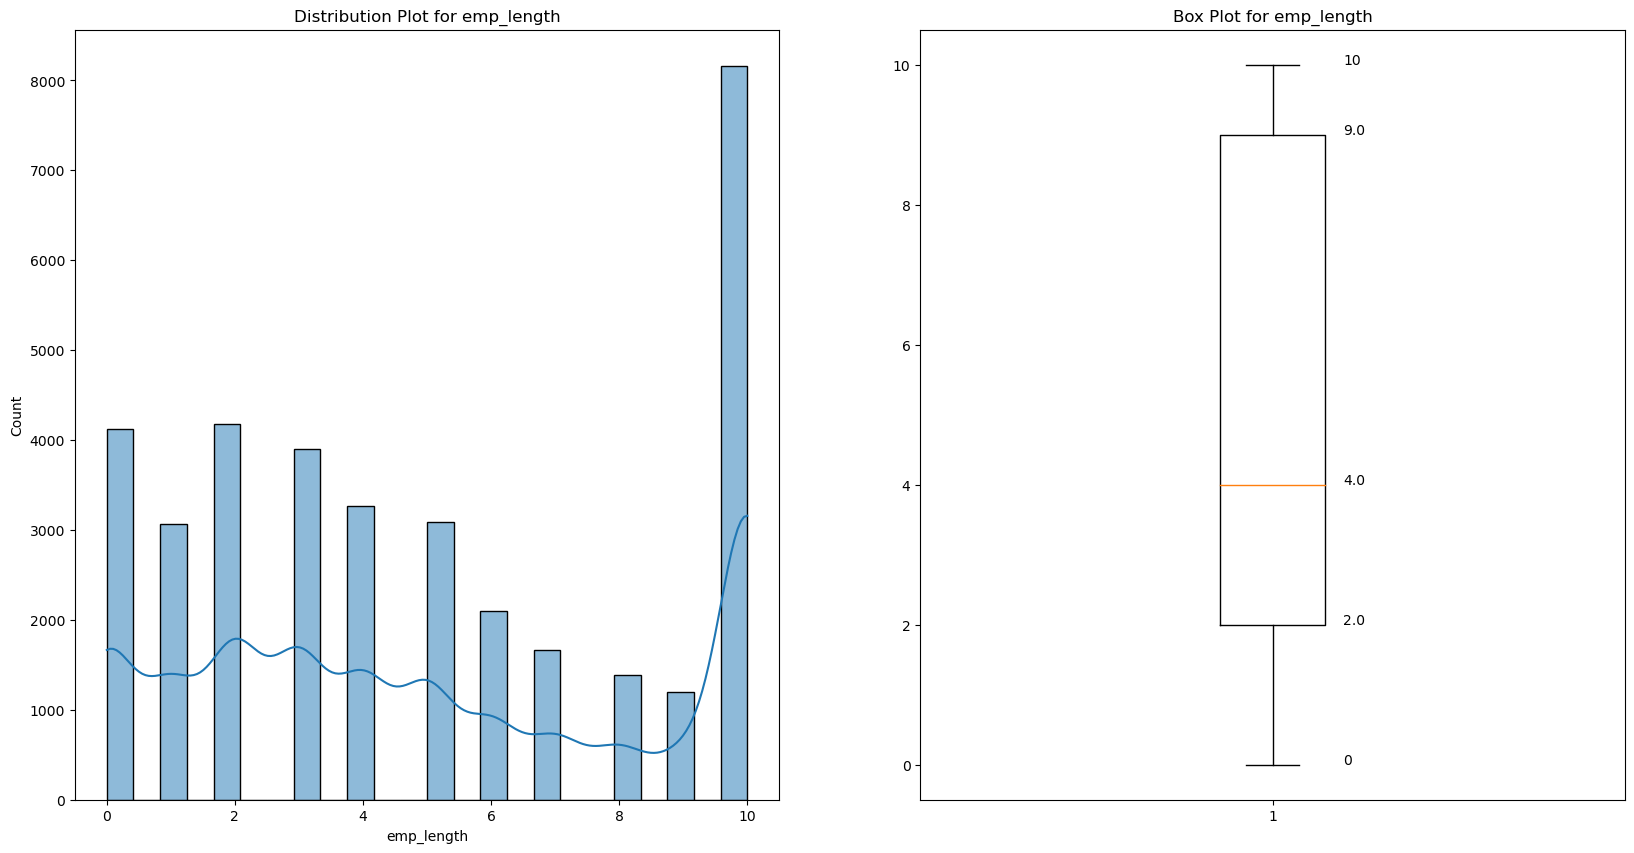

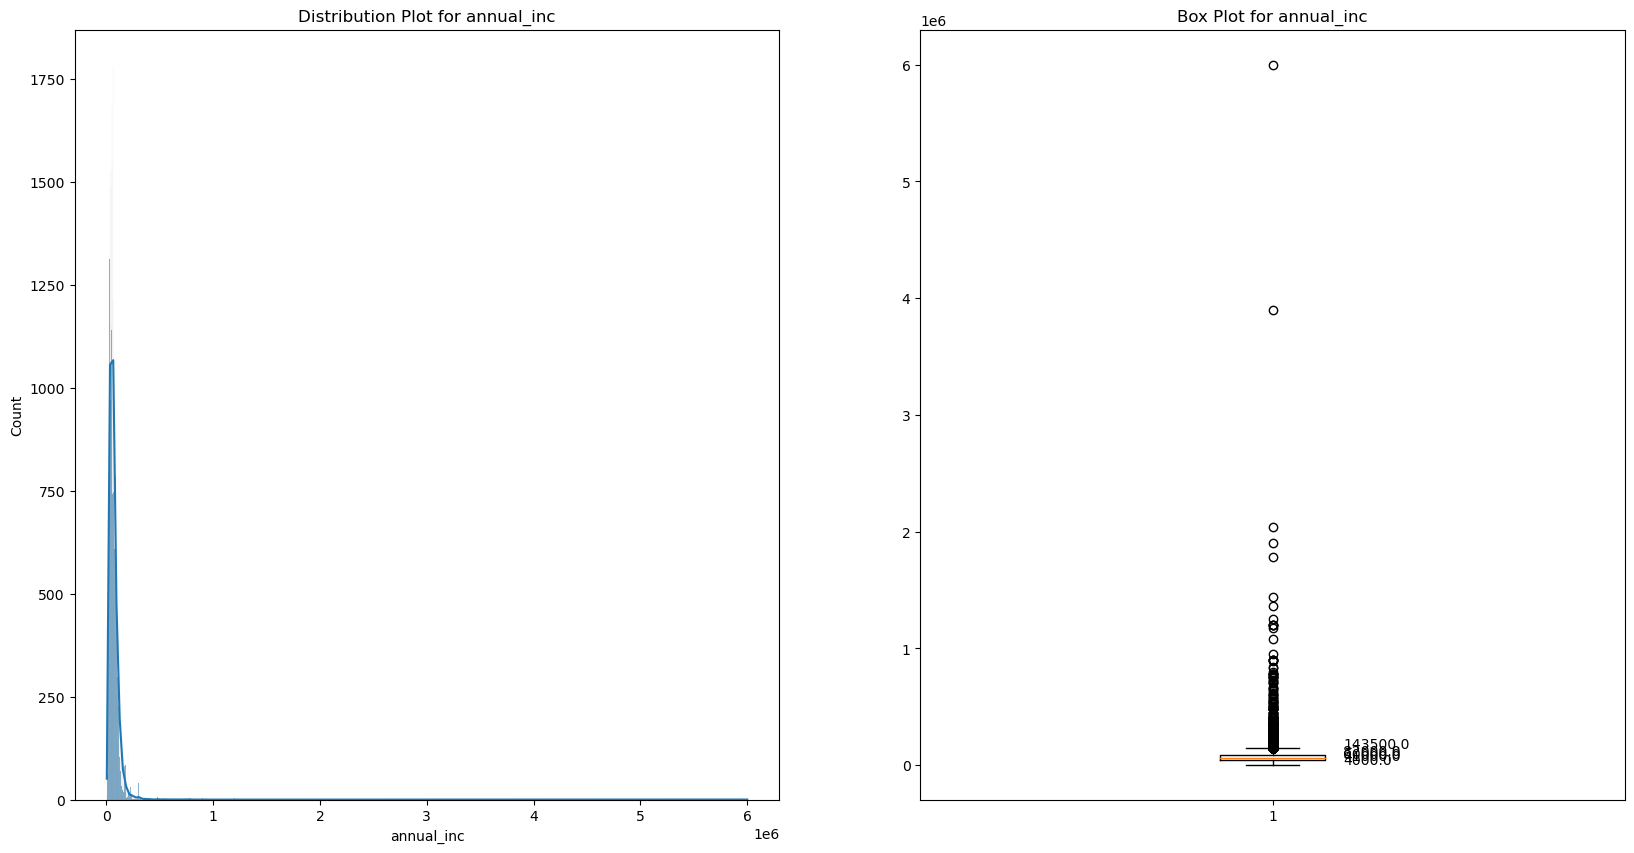

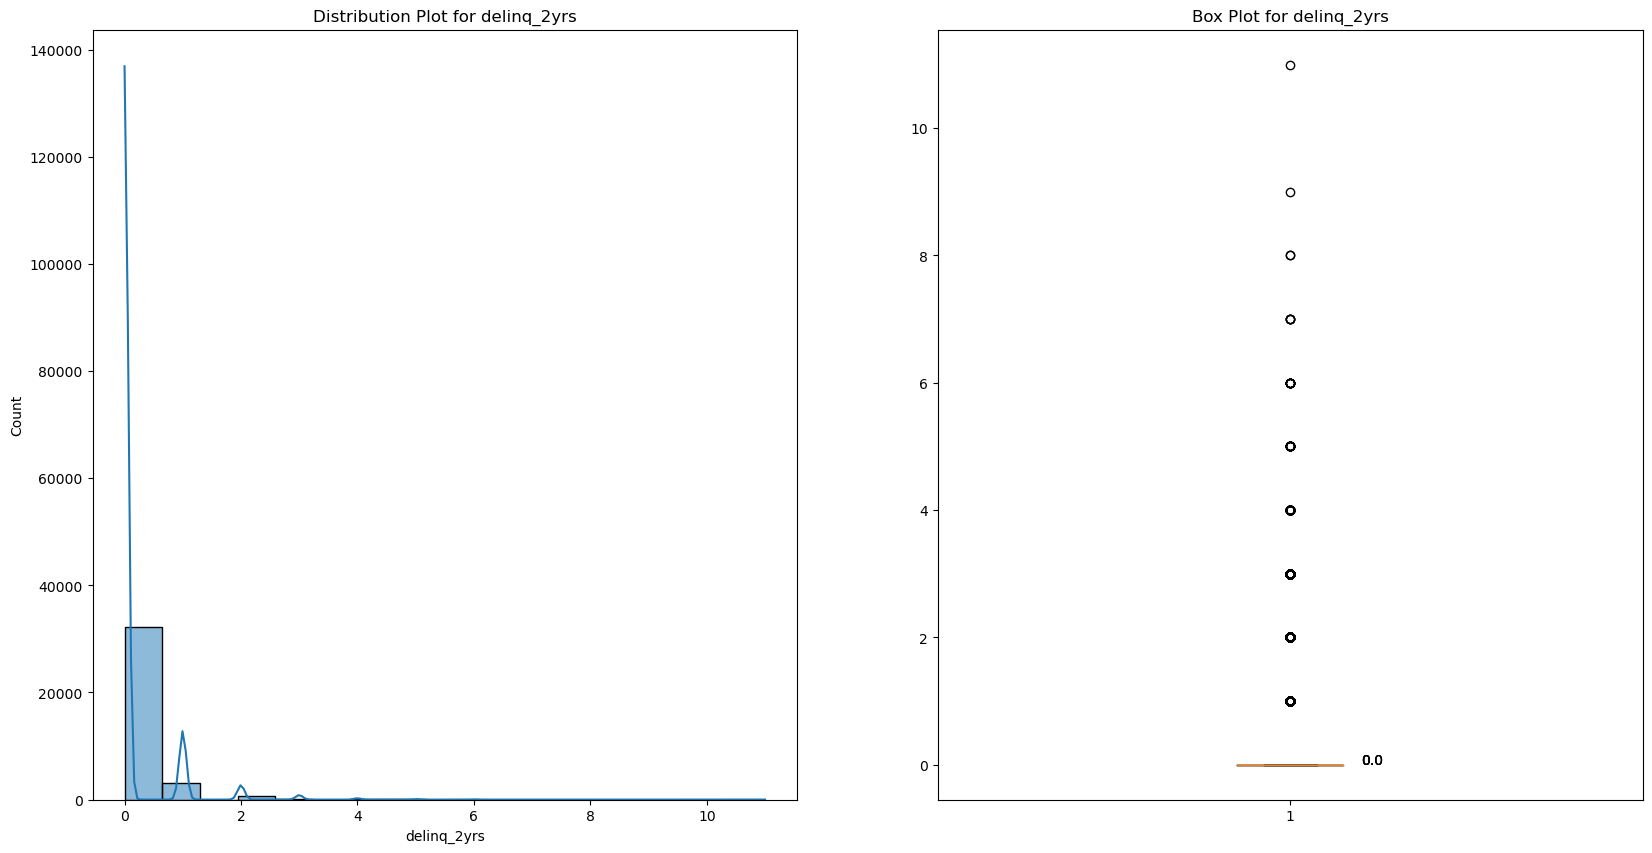

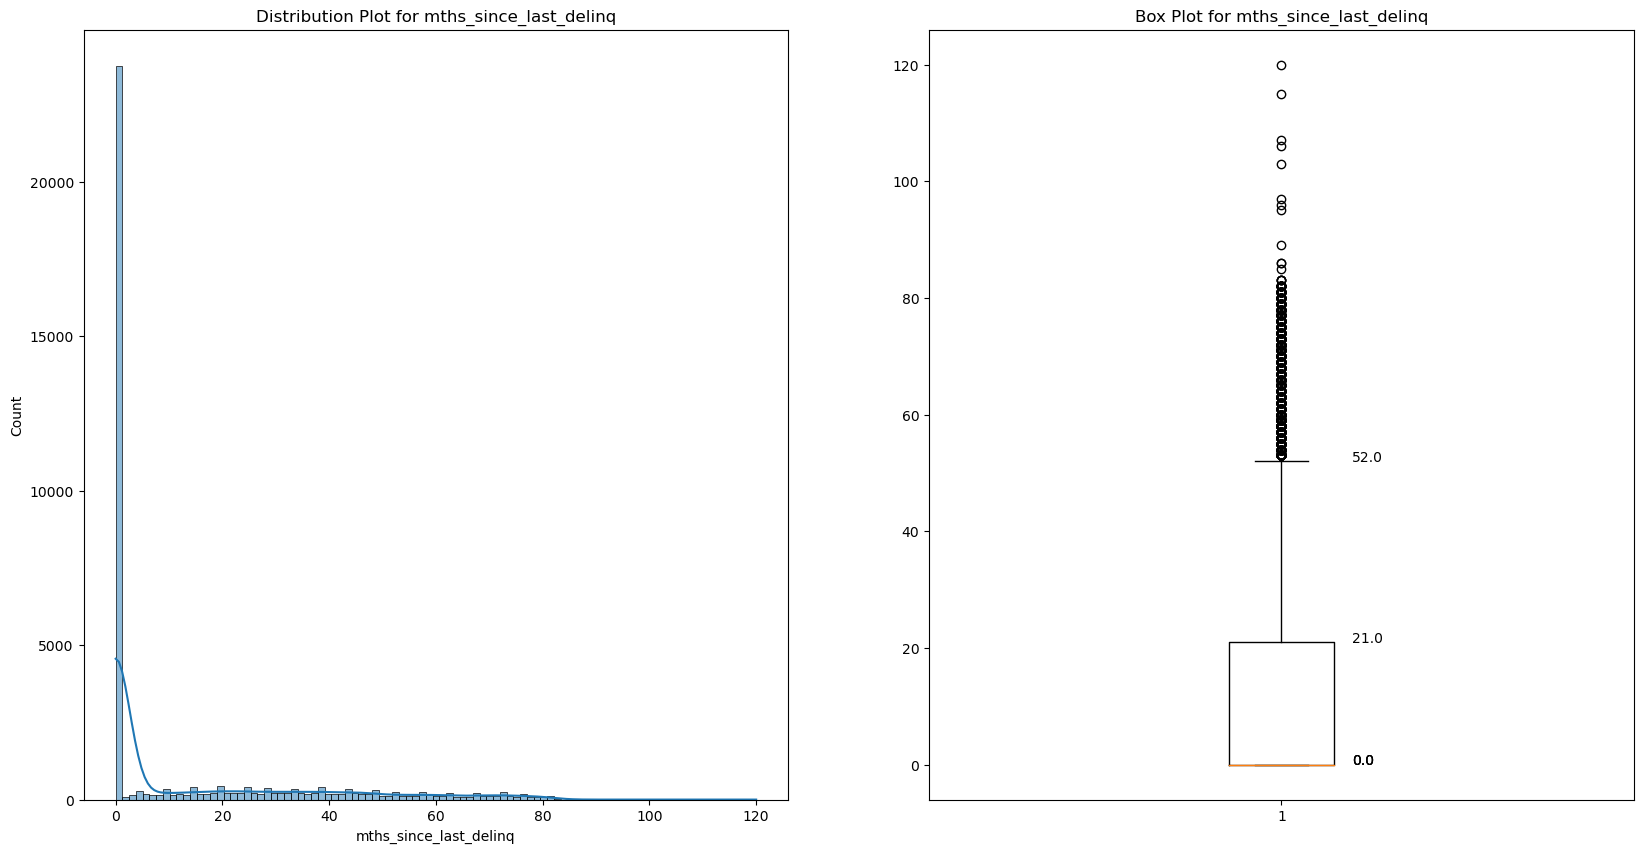

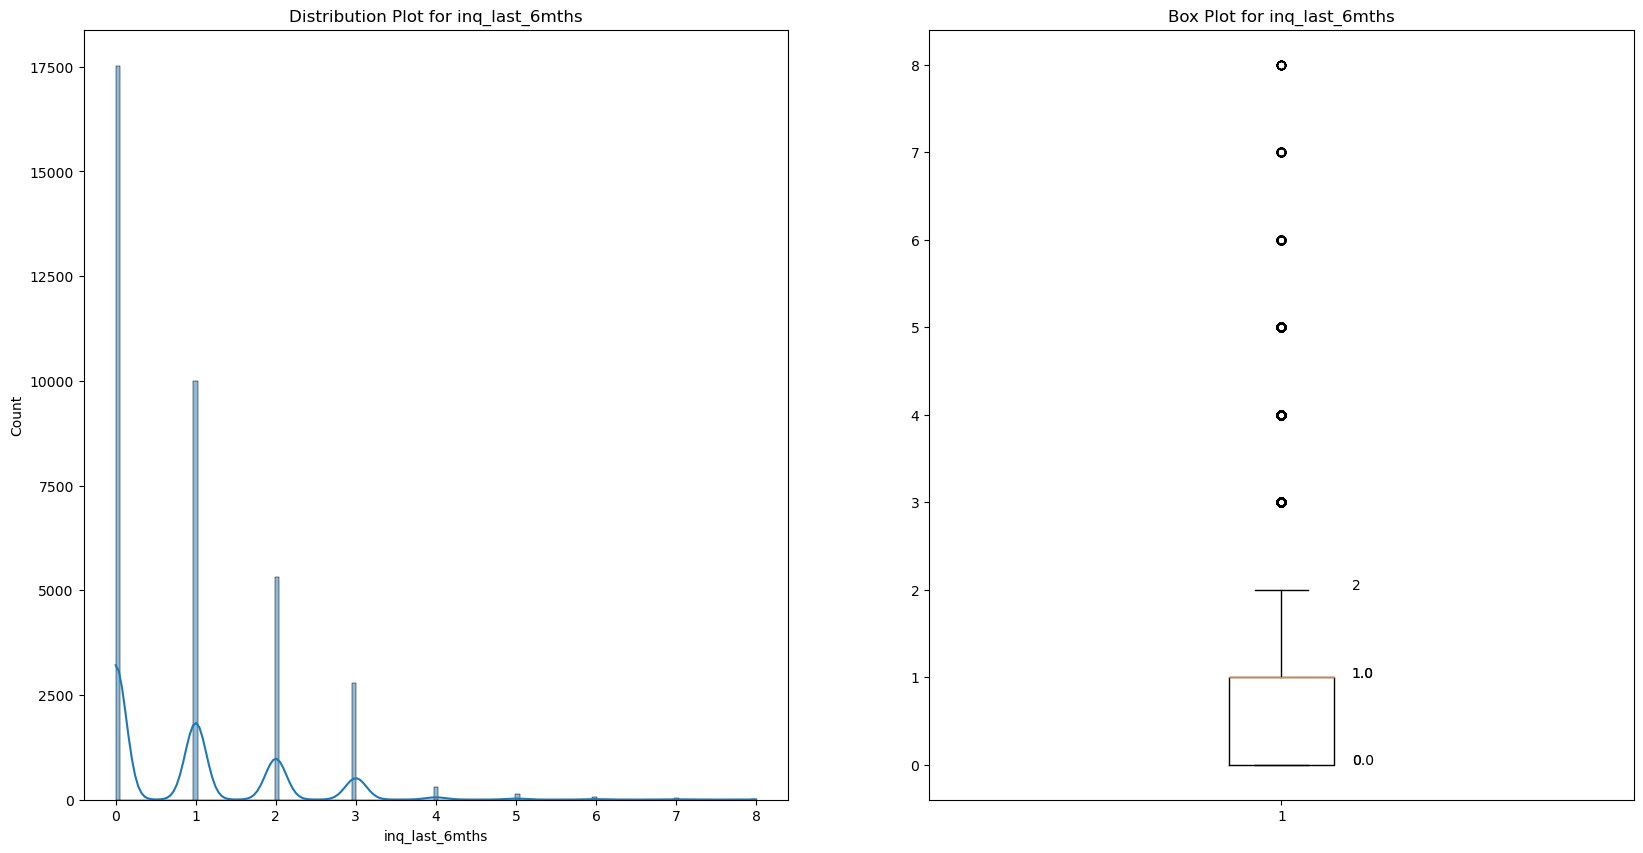

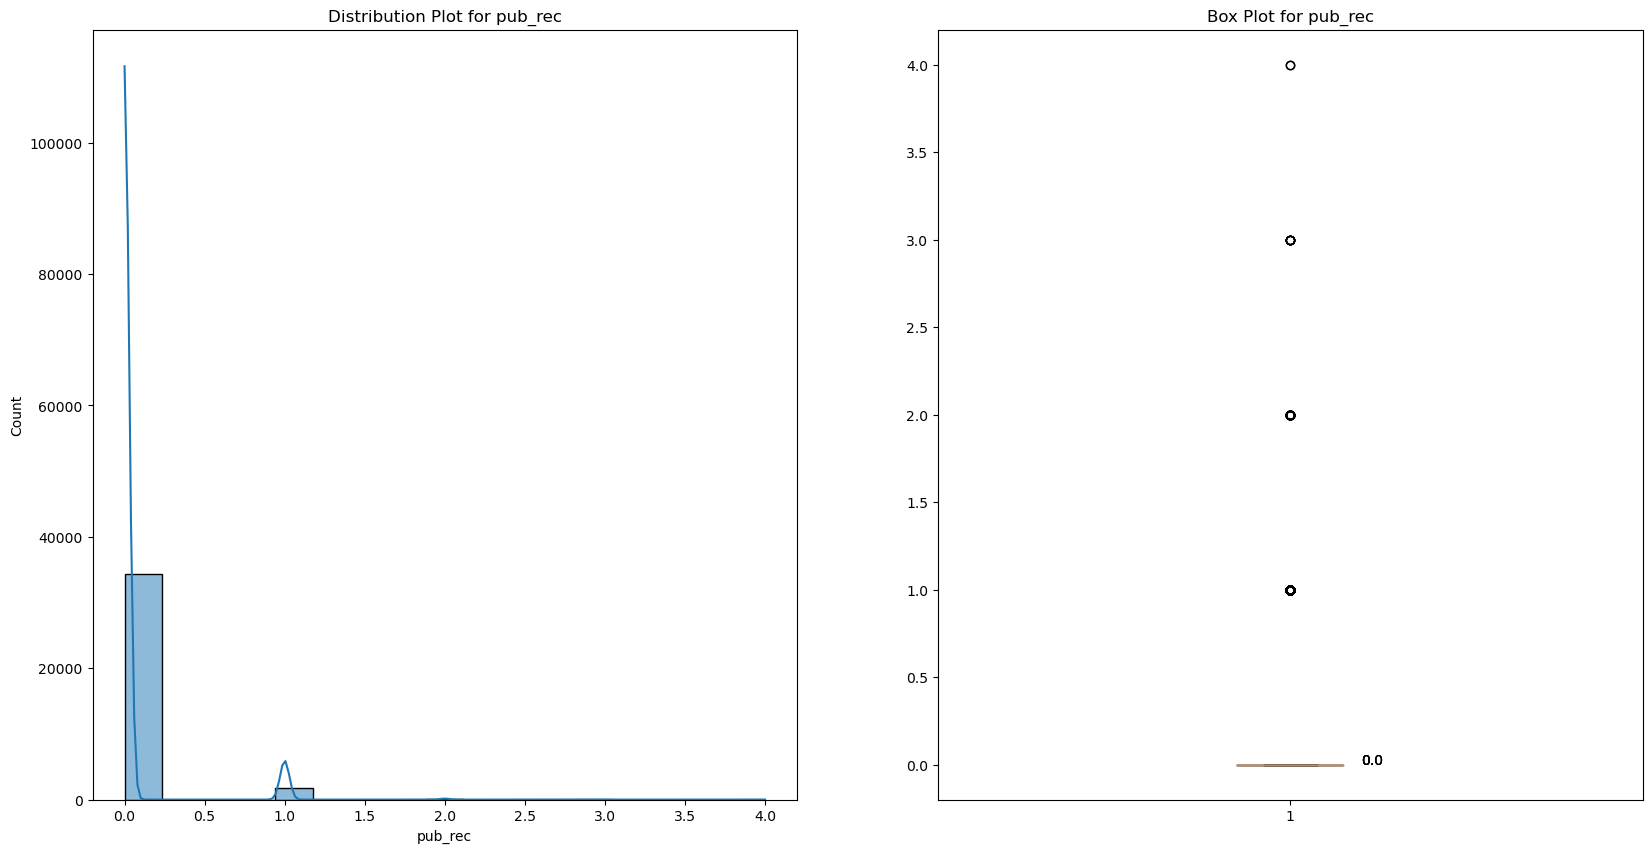

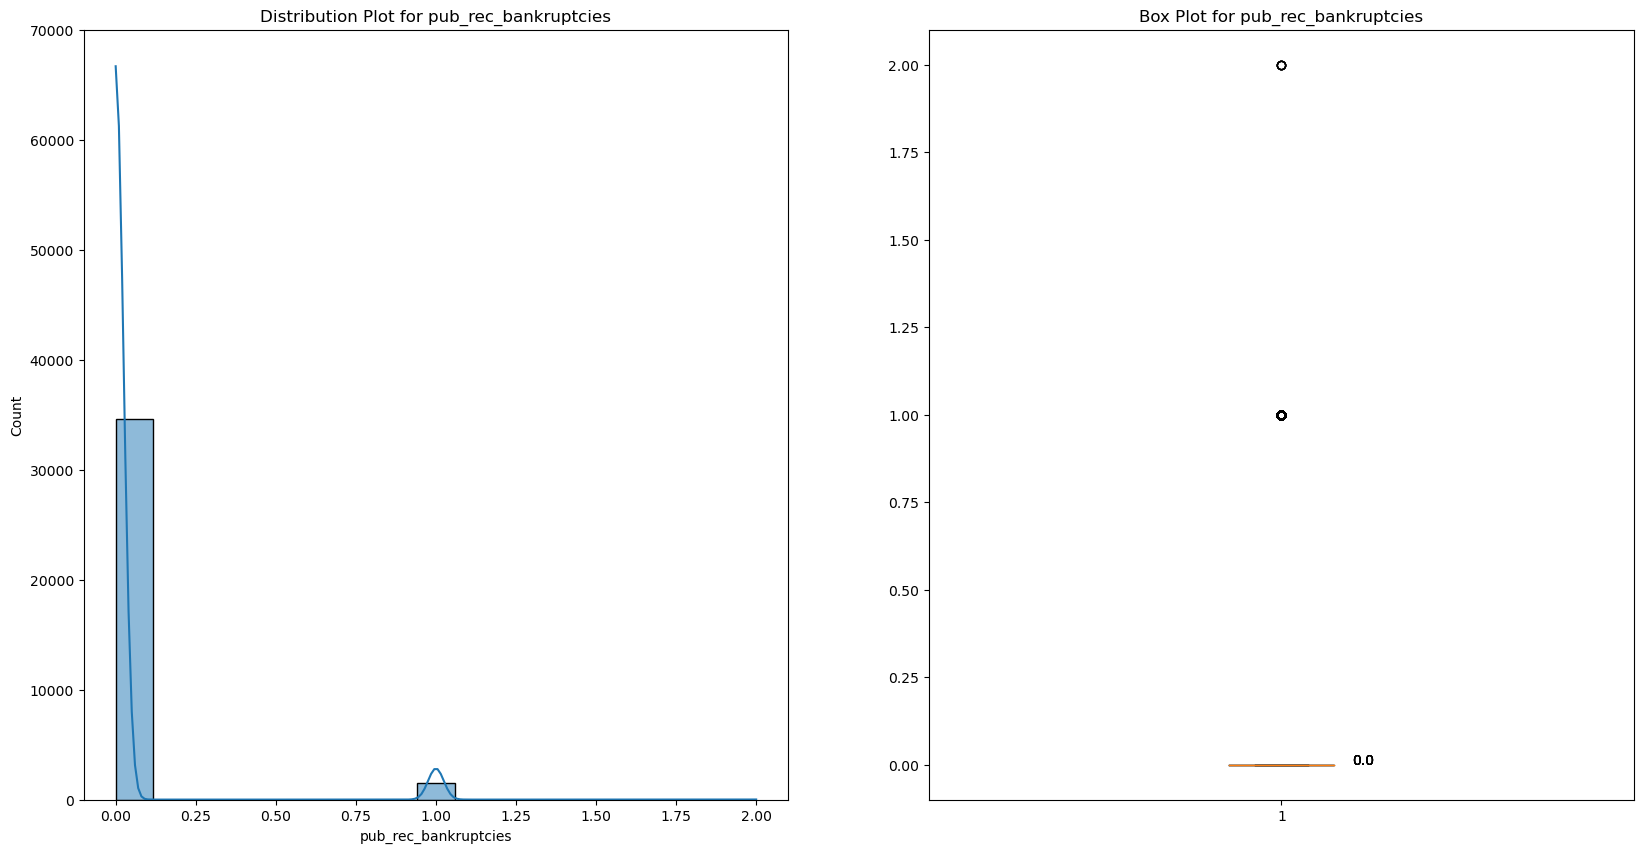

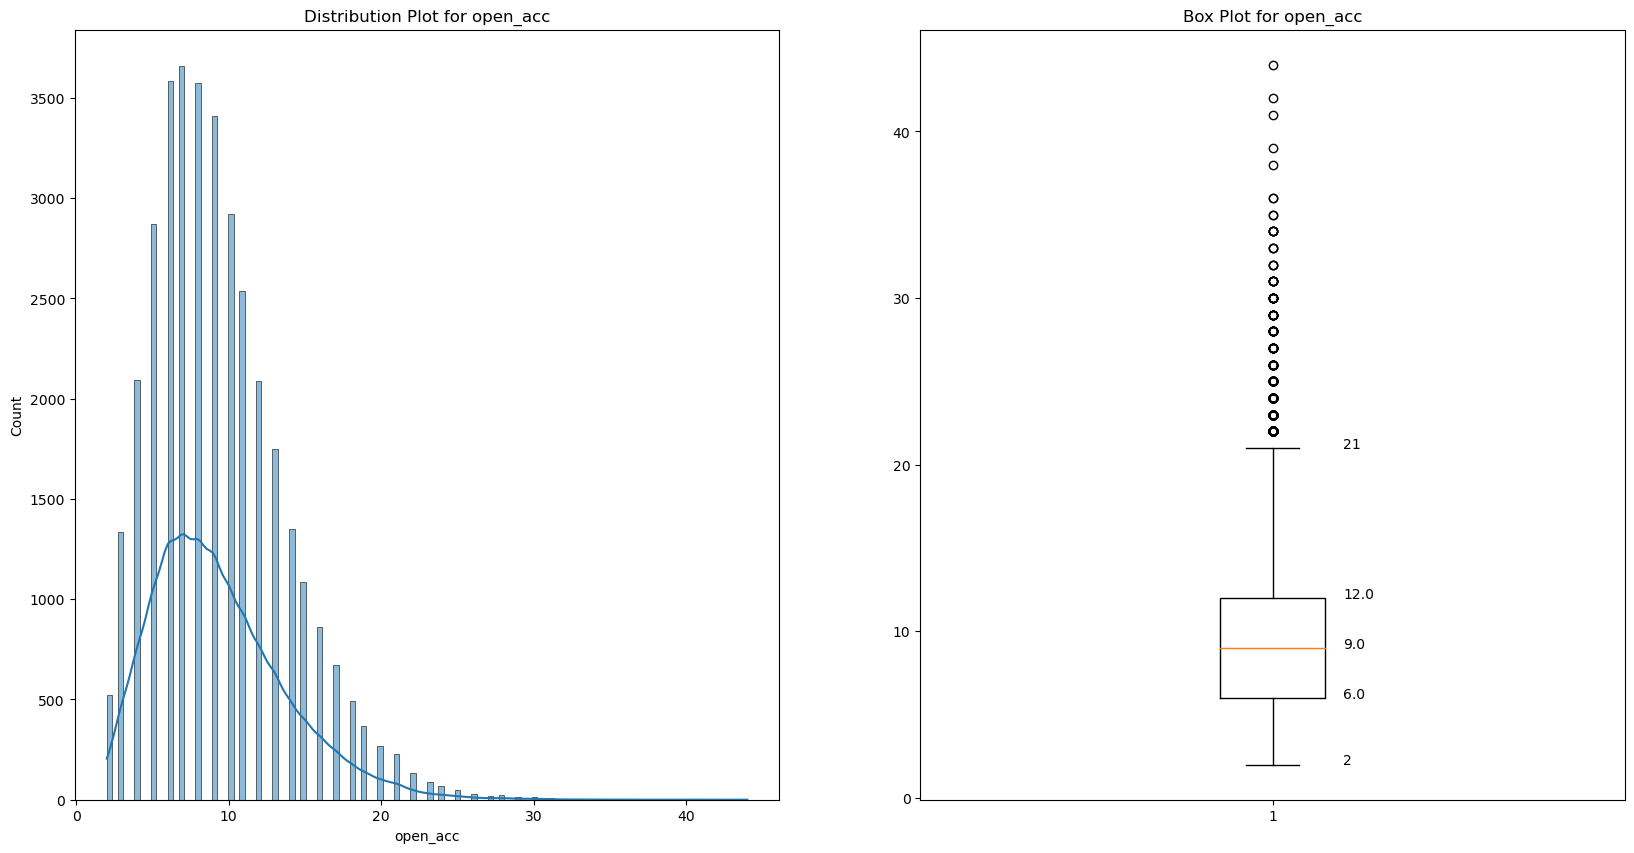

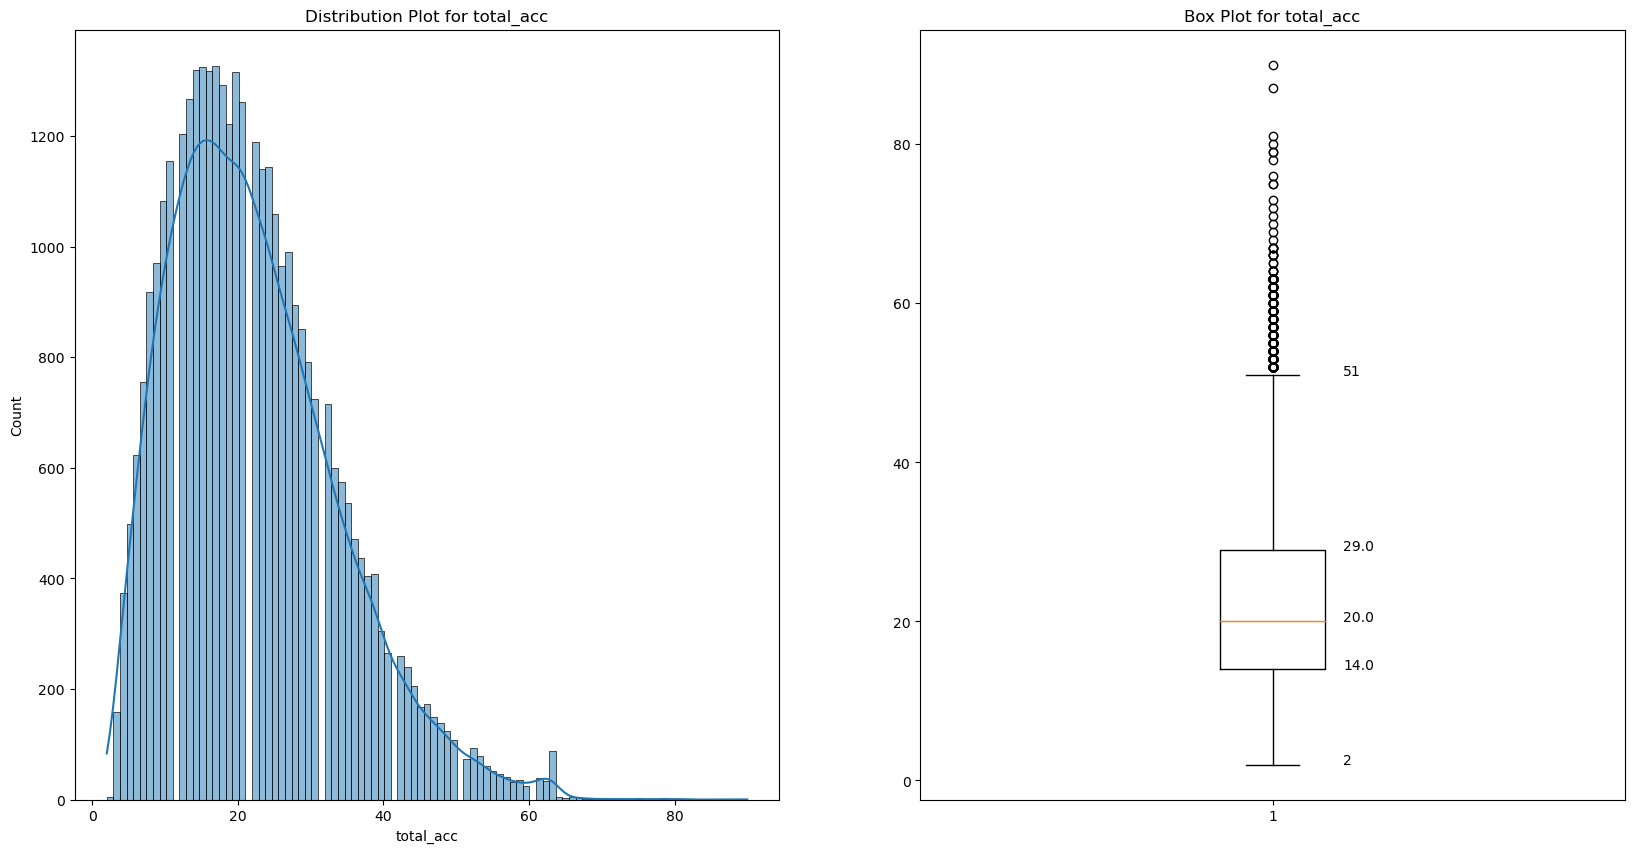

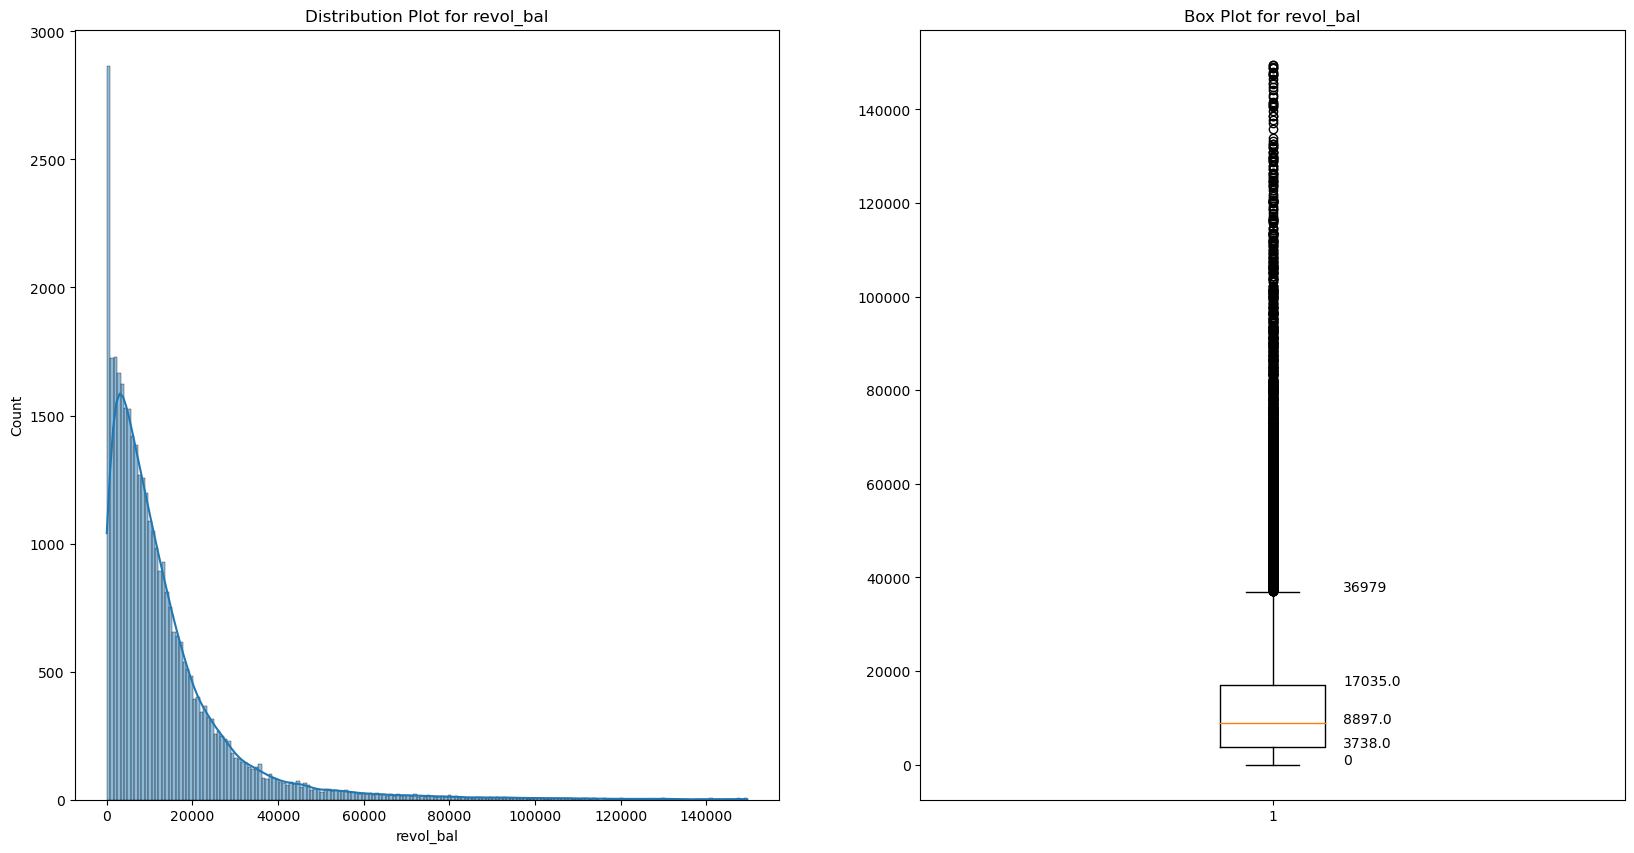

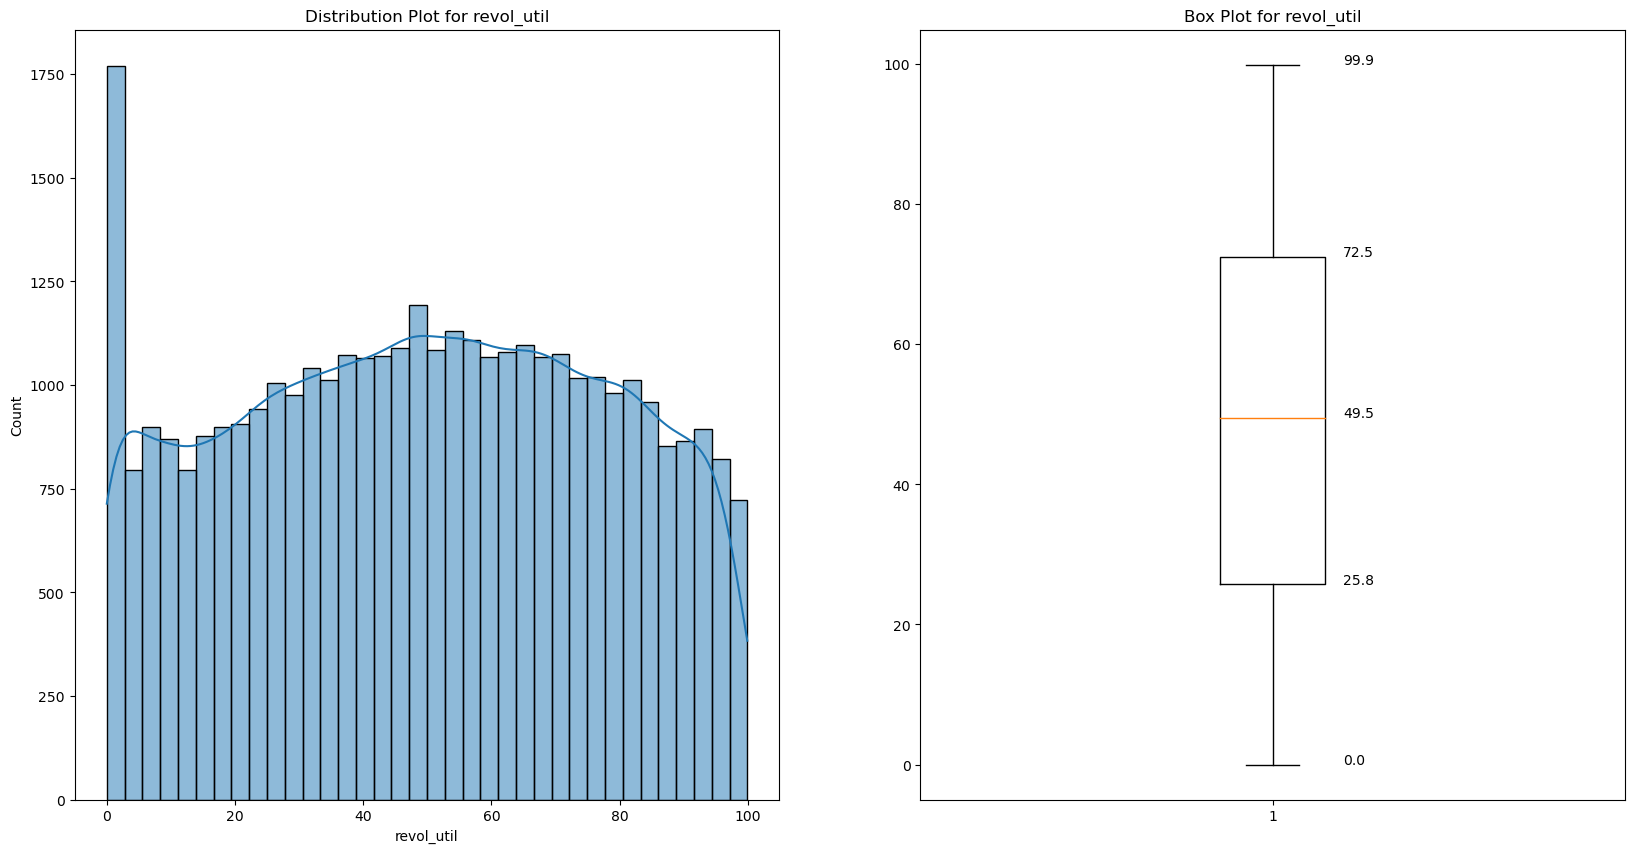

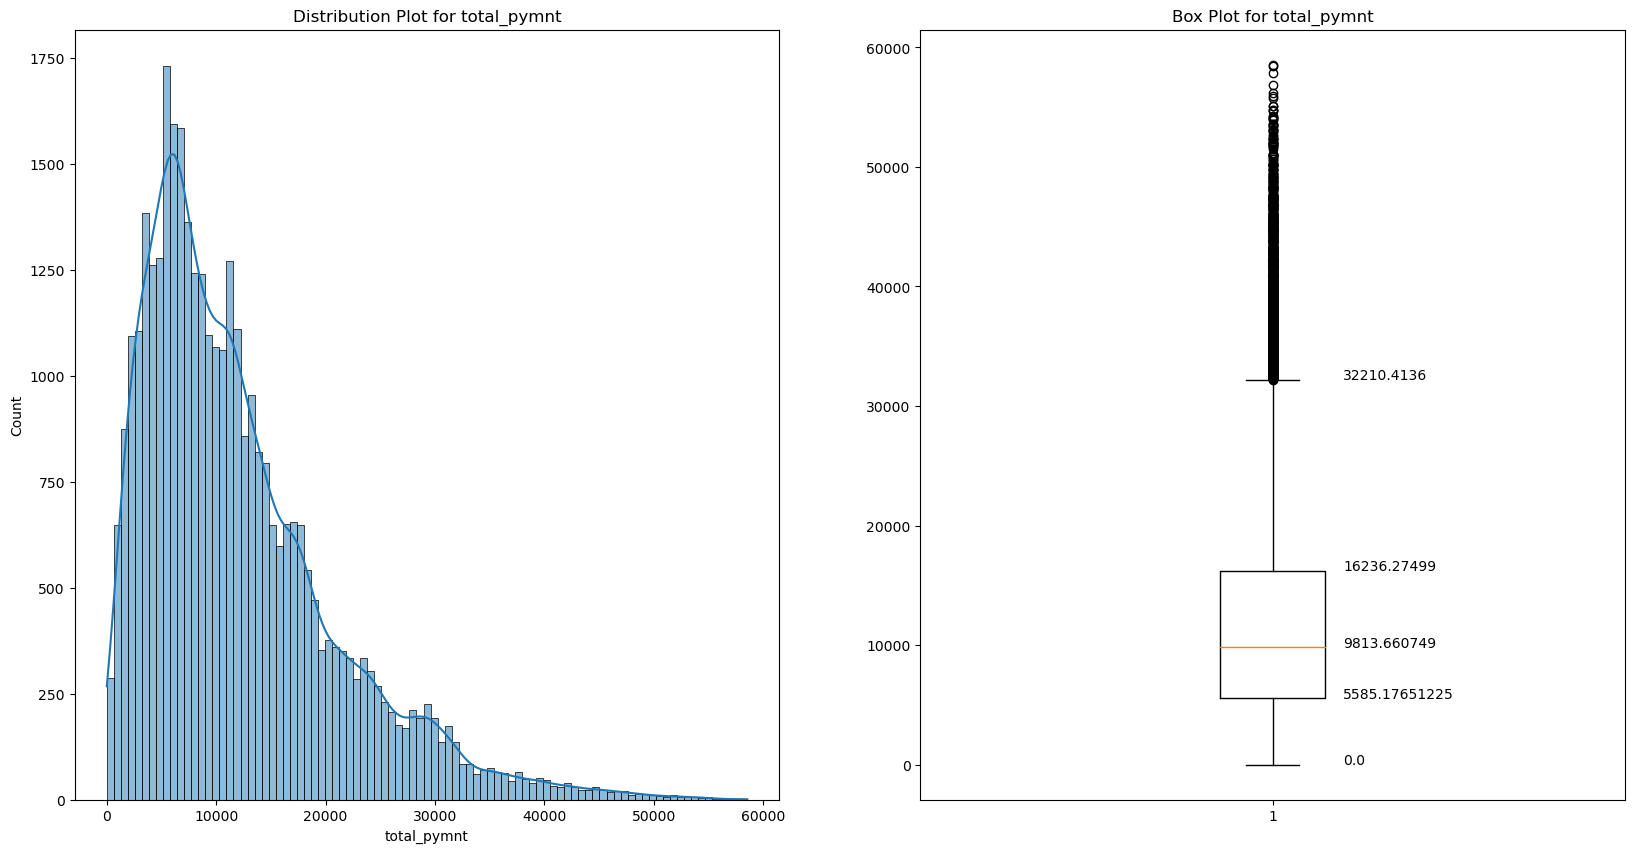

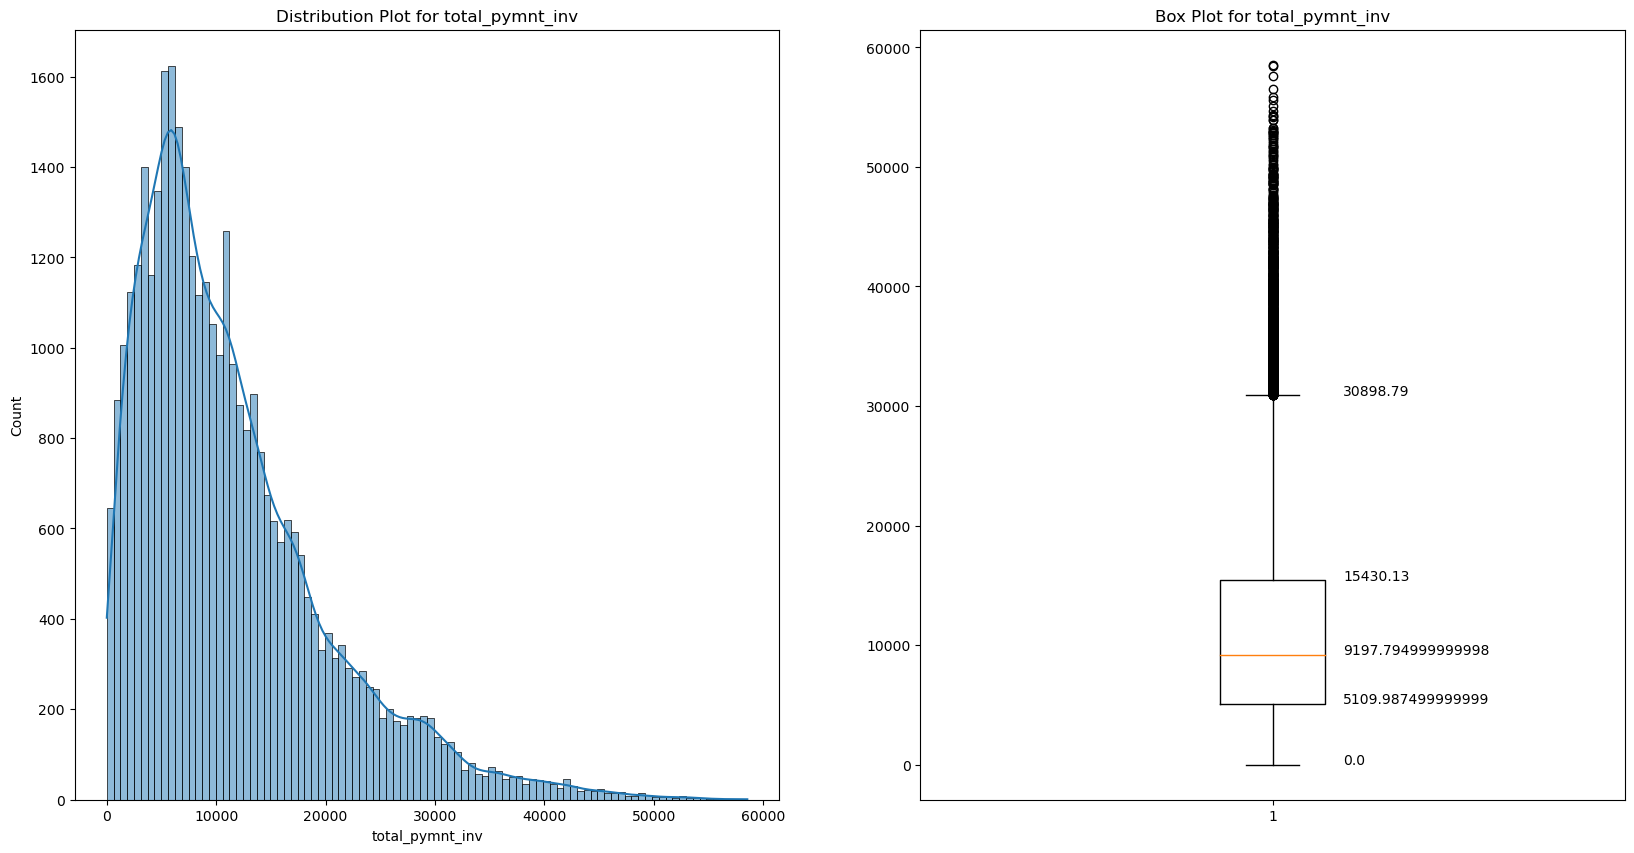

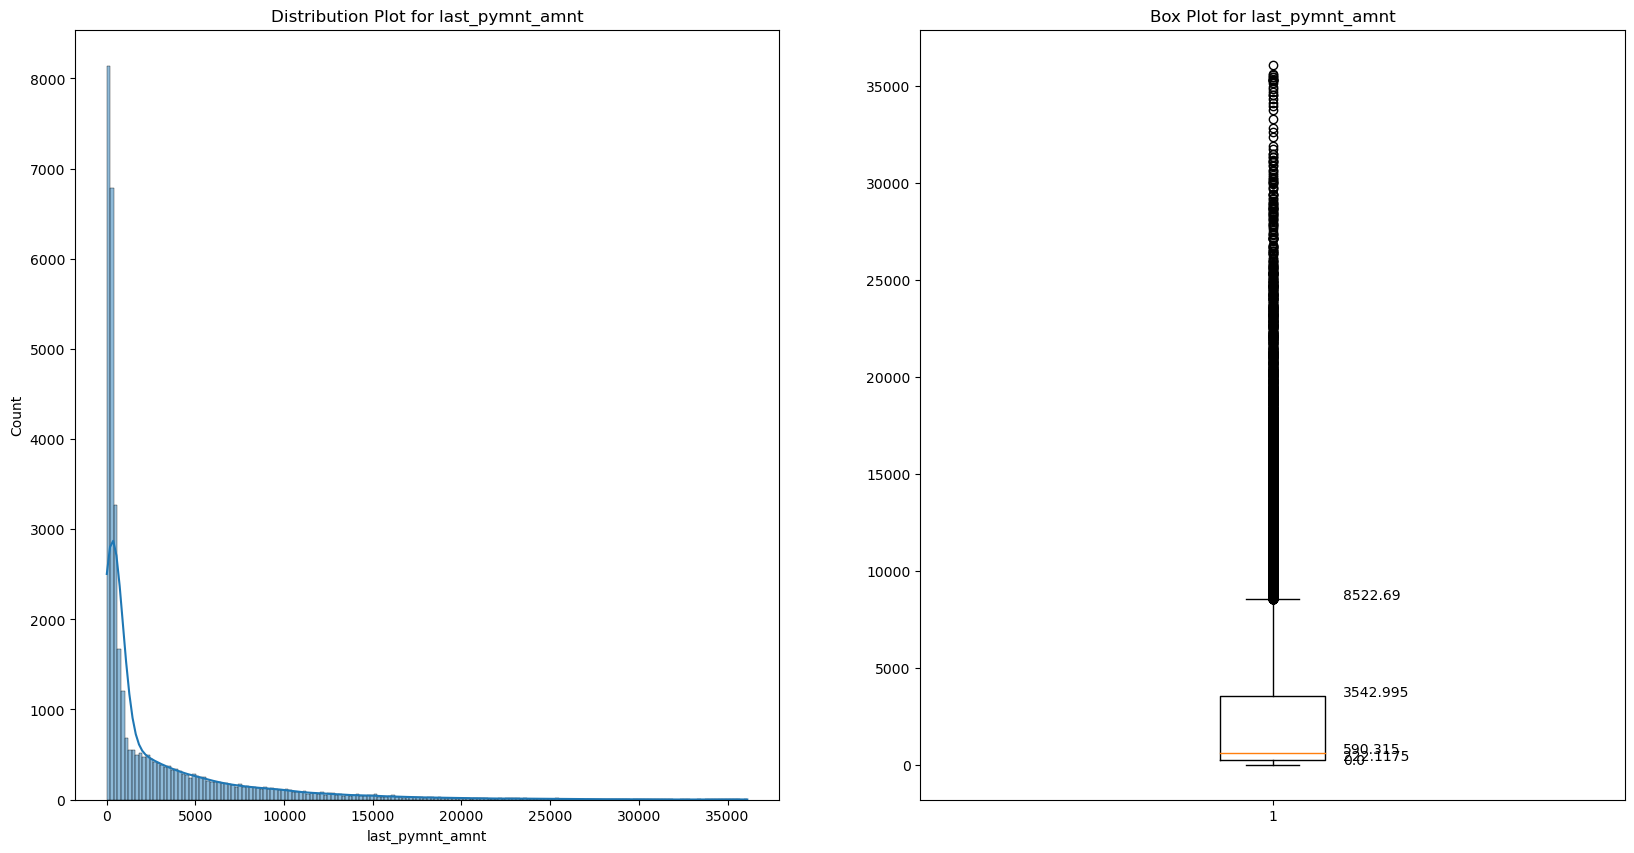

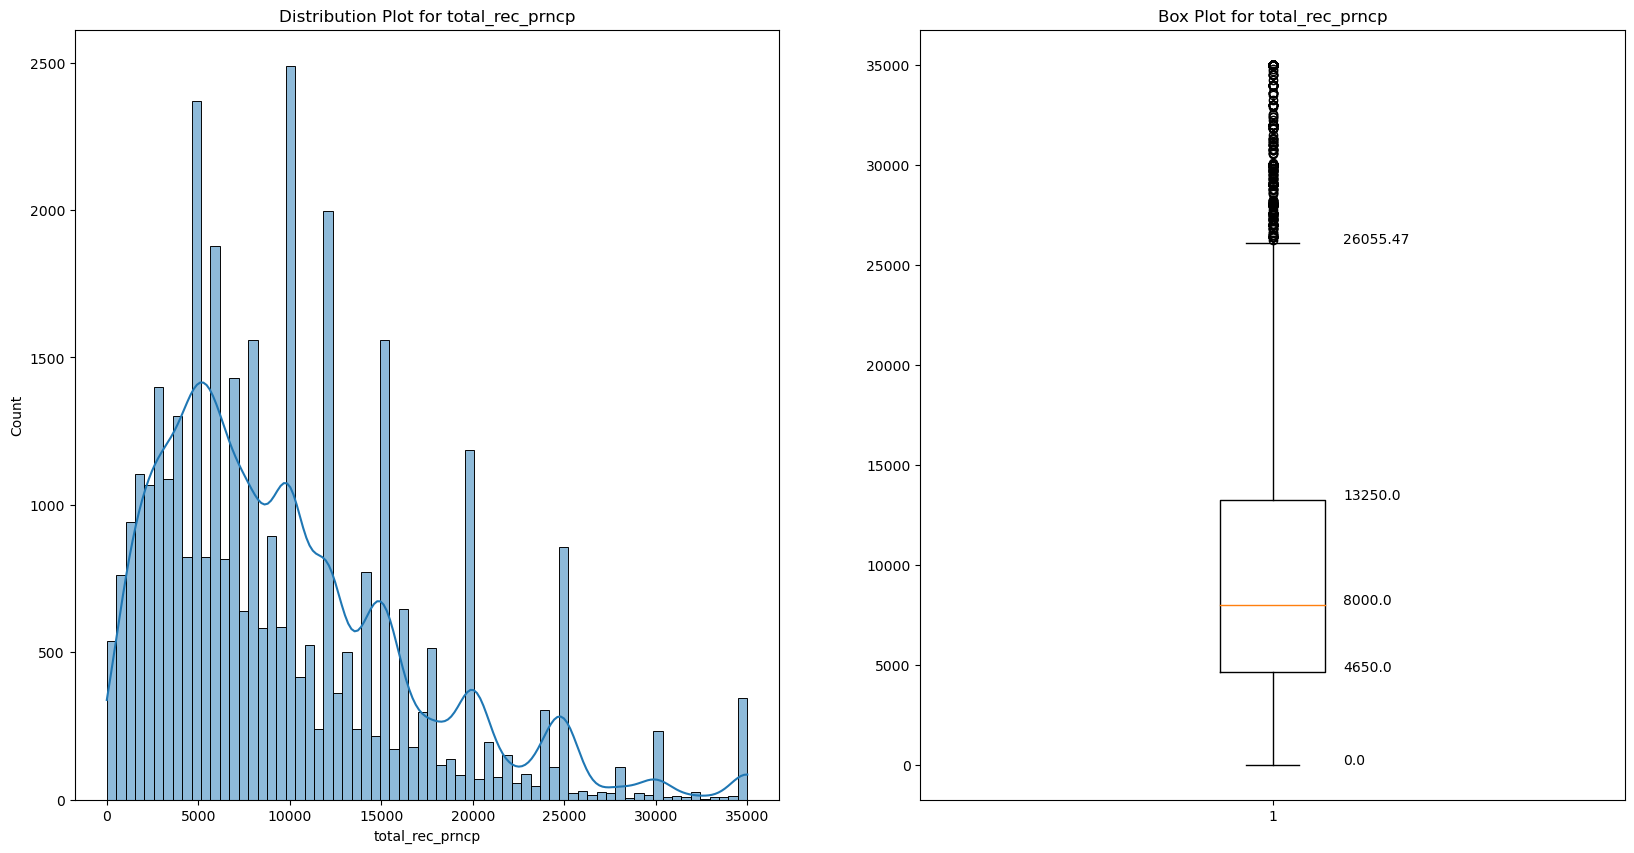

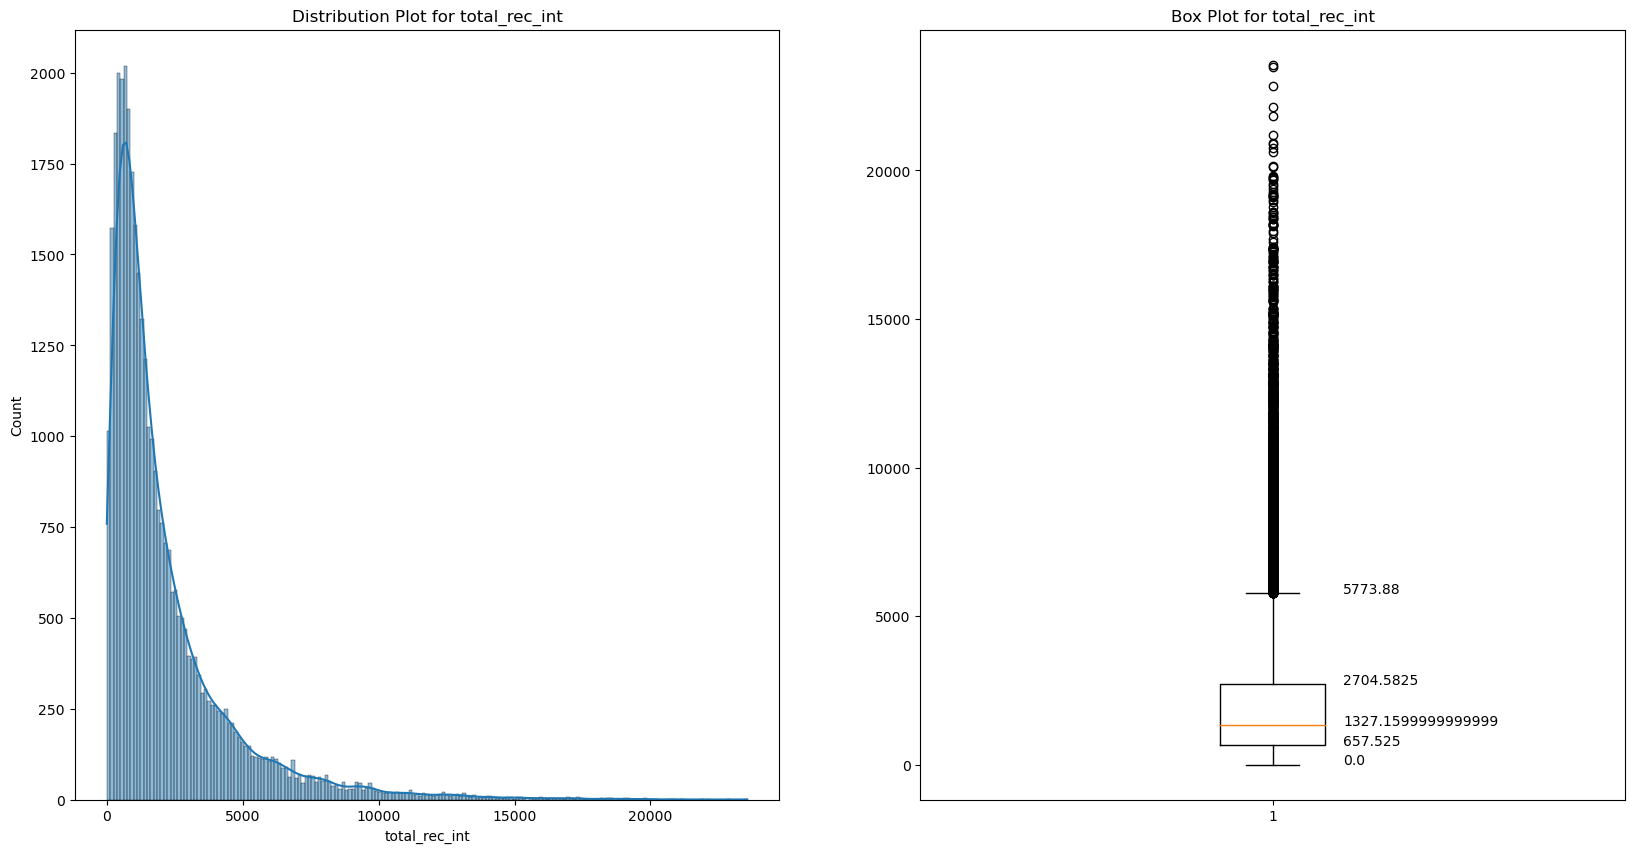

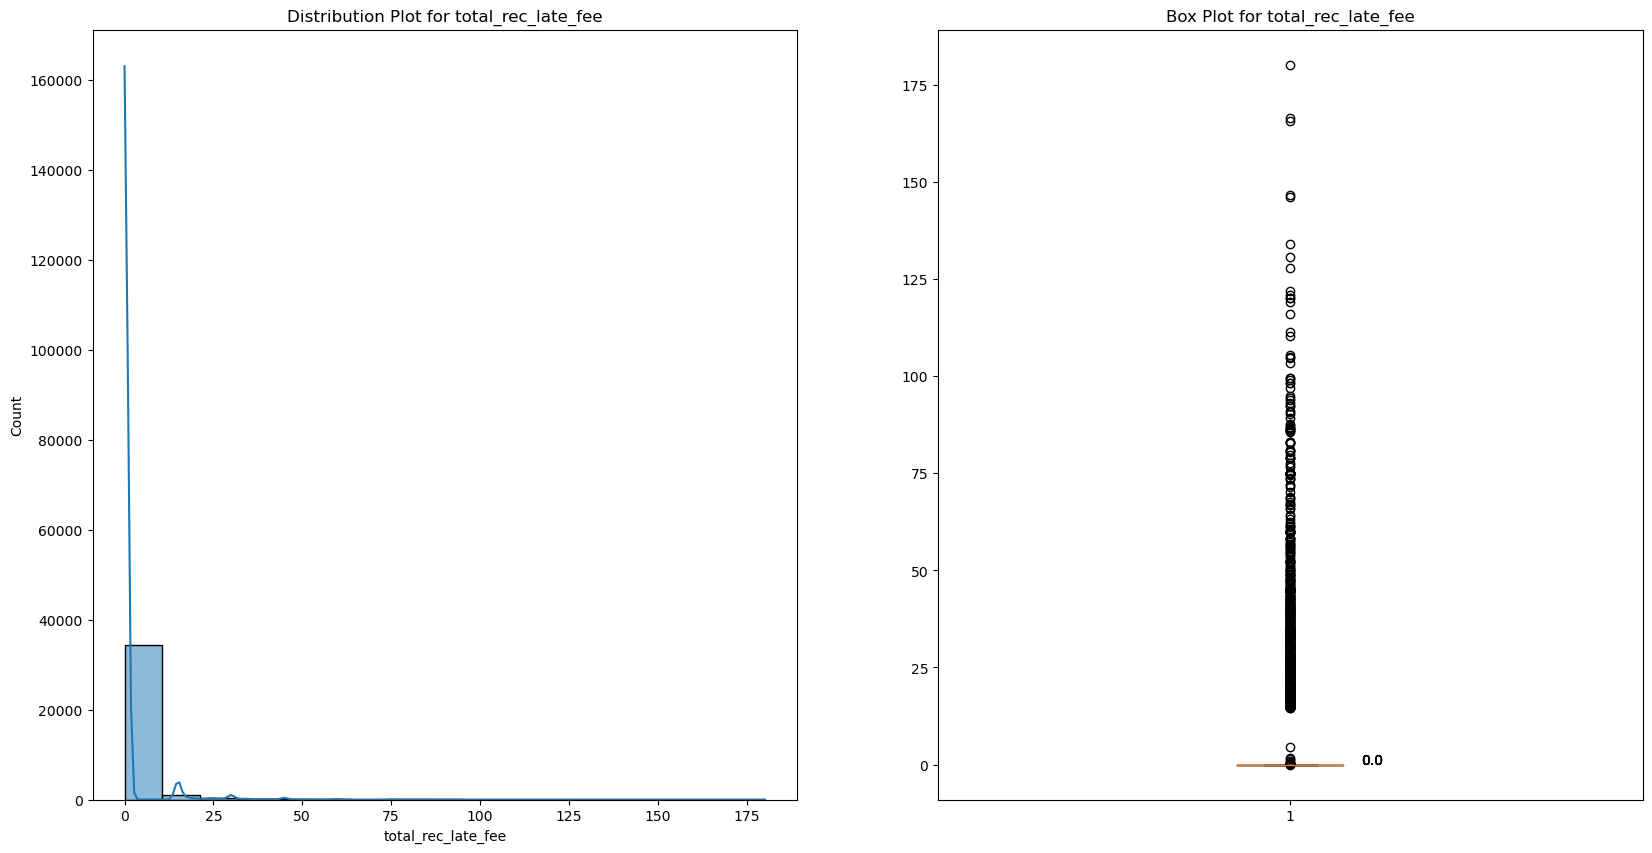

In [36]:
for i in continuous:
    univariate_plot_continuous(i)

## <font color='purple'>Outlier Treatment</font>

<p>From the above plots there are some attributes with outliers which are worth checking
    
<p> loan_amnt
,funded_amnt
,funded_amnt_inv
,int_rate
,annual_inc
,mnths_since_last_delinq
,revol_bal
,total_pymnt
,total_pymnt_inv
,last_pymnt_amnt
,total_rec_prncp
,total_rec_int

#### Where there are clear outliers in the column, we will remove the values greater than 95% quantile to standardize the data

* <font color='darkblue'>annual_inc</font>

<Axes: >

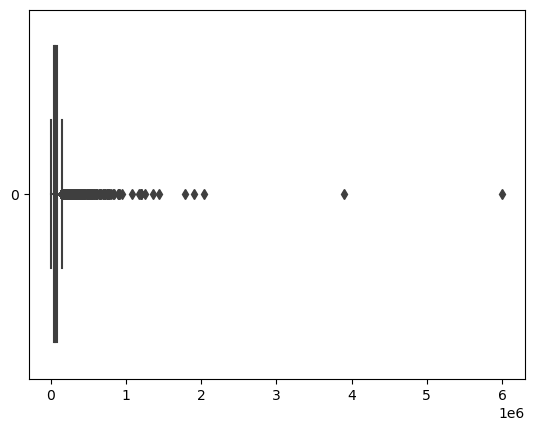

In [37]:
sns.boxplot(loan_df['annual_inc'], orient='h')

##### The box plot for annul income clearly indicates the dominance of outliers in the data and needs outlier treatment. Lets take a look at quantile info to get an idea of outliers

In [38]:
quantile_info = loan_df.annual_inc.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
quantile_info

0.50     60000.0
0.25     41000.0
0.50     60000.0
0.75     82000.0
0.80     90000.0
0.95    140000.0
0.97    162000.0
0.99    230000.0
Name: annual_inc, dtype: float64

##### From 0.95 quantile, there is a sharp increase in the annual income, which is the reason why the box plot looks skewed.

In [39]:
len(loan_df[loan_df.annual_inc > quantile_info[0.95]])

1752

In [40]:
# Dropping the outlier records abouve 0.95 quantile of annual income
loan_df = loan_df[loan_df.annual_inc <= quantile_info[0.95]]

<Axes: >

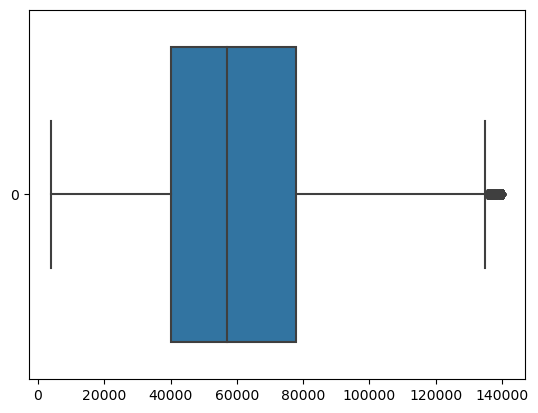

In [41]:
sns.boxplot(loan_df['annual_inc'], orient='h')

##### The box plot for annual_inc looks good after outlier treatment

* <font color='darkblue'> last_pymnt_amnt </font>

<Axes: >

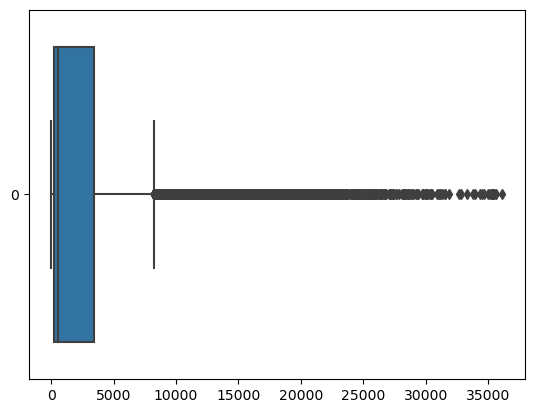

In [42]:
sns.boxplot(loan_df['last_pymnt_amnt'], orient='h')

In [43]:
quantile_info = loan_df.last_pymnt_amnt.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
quantile_info

0.50      563.4500
0.25      216.8775
0.50      563.4500
0.75     3414.9700
0.80     4531.8080
0.95    11874.8235
0.97    14630.1316
0.99    20262.5312
Name: last_pymnt_amnt, dtype: float64

##### From 0.95 quantile, last_pymnt_amnt has increased than the rest of data

In [44]:
len(loan_df[loan_df.last_pymnt_amnt > quantile_info[0.95]])

1720

In [45]:
# Dropping the outlier records abouve 0.95 quantile of last_pymnt_amnt
loan_df = loan_df[loan_df.last_pymnt_amnt <= quantile_info[0.95]]

<Axes: >

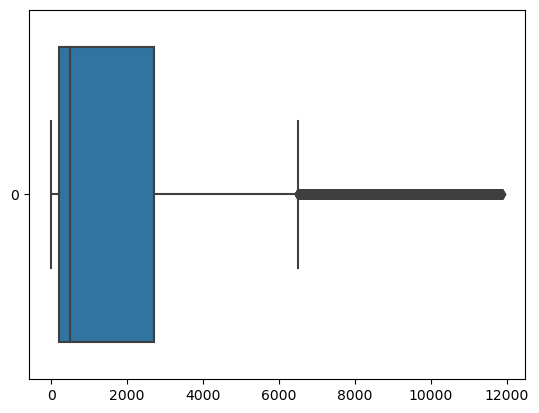

In [46]:
sns.boxplot(loan_df['last_pymnt_amnt'], orient='h')

<Axes: xlabel='last_pymnt_amnt', ylabel='Count'>

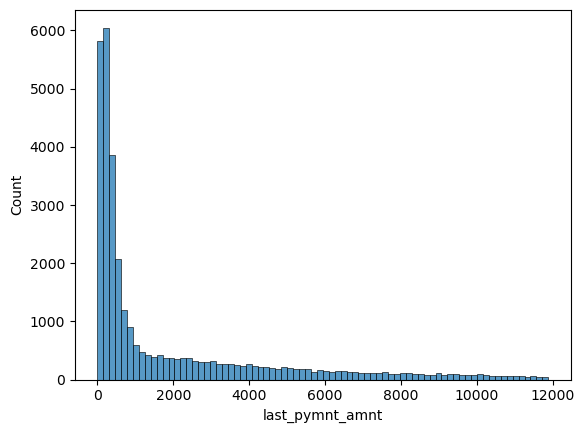

In [47]:
sns.histplot(loan_df['last_pymnt_amnt'])

* <font color='darkblue'> revol_bal </font>

<Axes: >

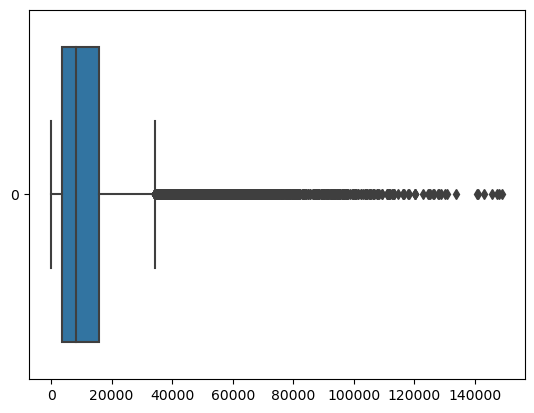

In [48]:
sns.boxplot(loan_df.revol_bal, orient='h')

In [49]:
quantile_info = loan_df.revol_bal.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
quantile_info

0.50     8359.00
0.25     3520.00
0.50     8359.00
0.75    15780.00
0.80    18160.60
0.95    35961.65
0.97    45011.98
0.99    68063.21
Name: revol_bal, dtype: float64

##### From 0.95 quantile, last_pymnt_amnt has increased than the rest of data

In [50]:
len(loan_df[loan_df.revol_bal > quantile_info[0.95]])

1634

In [51]:
# Dropping the outlier records abouve 0.95 quantile of revol_bal
loan_df = loan_df[loan_df.revol_bal <= quantile_info[0.95]]

<Axes: >

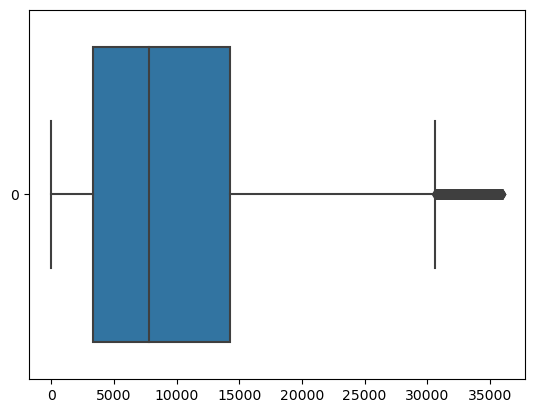

In [52]:
sns.boxplot(loan_df.revol_bal, orient='h')

#### We fixed outliers in annual_inc, last_pymnt_amnt and revol_bal. 

#### Now lets check  loan_amnt, funded_amnt, funded_amnt_inv, int_rate, mths_since_last_delinq, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int columns


0.50     8500.0
0.25     5000.0
0.50     8500.0
0.75    13000.0
0.80    15000.0
0.95    23000.0
0.97    25000.0
0.99    30000.0
Name: loan_amnt, dtype: float64
1521


<Axes: >

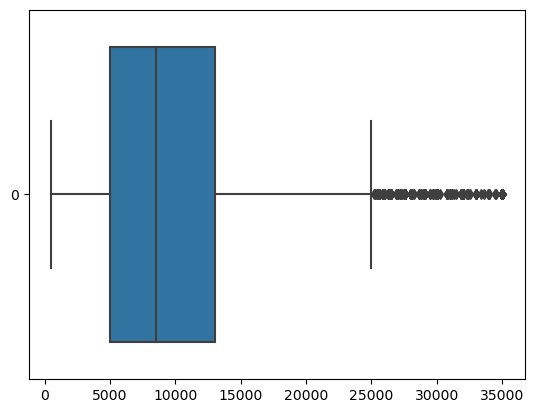

In [53]:
quantile_info = loan_df.loan_amnt.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.loan_amnt > quantile_info[0.95]]))
sns.boxplot(loan_df.loan_amnt, orient='h')

0.50     8400.0
0.25     5000.0
0.50     8400.0
0.75    12800.0
0.80    14500.0
0.95    21000.0
0.97    25000.0
0.99    28000.0
Name: funded_amnt, dtype: float64
1541


<Axes: >

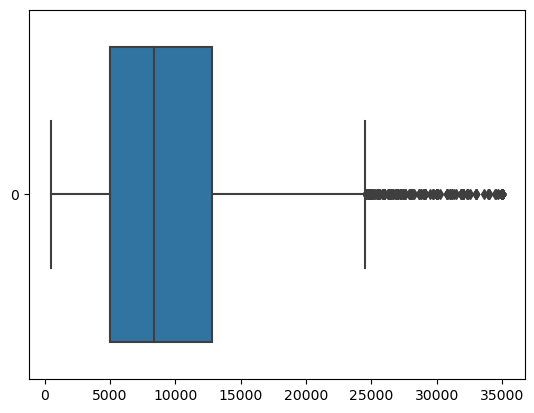

In [54]:
quantile_info = loan_df.funded_amnt.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.funded_amnt > quantile_info[0.95]]))
sns.boxplot(loan_df.funded_amnt, orient='h')

0.50     8000.000000
0.25     4889.243026
0.50     8000.000000
0.75    12000.000000
0.80    13950.646148
0.95    20375.000000
0.97    23950.000000
0.99    27952.593502
Name: funded_amnt_inv, dtype: float64
1550


<Axes: >

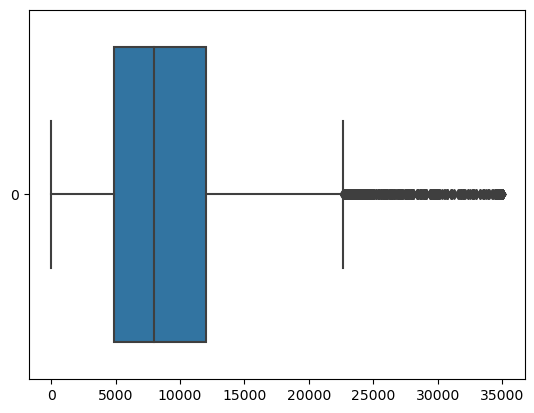

In [55]:
quantile_info = loan_df.funded_amnt_inv.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.funded_amnt_inv > quantile_info[0.95]]))
sns.boxplot(loan_df.funded_amnt_inv, orient='h')

0.50    11.71
0.25     8.90
0.50    11.71
0.75    14.26
0.80    14.91
0.95    17.99
0.97    18.79
0.99    20.62
Name: int_rate, dtype: float64
1479


<Axes: >

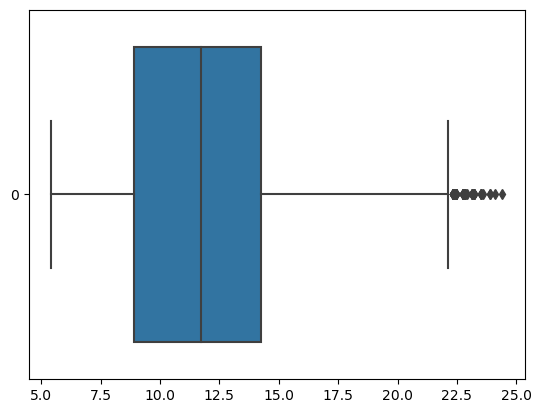

In [56]:
quantile_info = loan_df.int_rate.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.int_rate > quantile_info[0.95]]))
sns.boxplot(loan_df.int_rate, orient='h')

0.50     0.0
0.25     0.0
0.50     0.0
0.75    22.0
0.80    31.0
0.95    64.0
0.97    71.0
0.99    78.0
Name: mths_since_last_delinq, dtype: float64
1523


<Axes: >

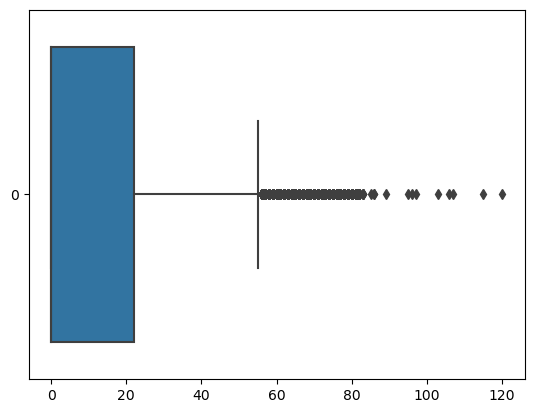

In [57]:
quantile_info = loan_df.mths_since_last_delinq.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.mths_since_last_delinq > quantile_info[0.95]]))
sns.boxplot(loan_df.mths_since_last_delinq, orient='h')

0.50     7450.0
0.25     4100.0
0.50     7450.0
0.75    12000.0
0.80    12950.0
0.95    20000.0
0.97    22400.0
0.99    25000.0
Name: total_rec_prncp, dtype: float64
1240


<Axes: >

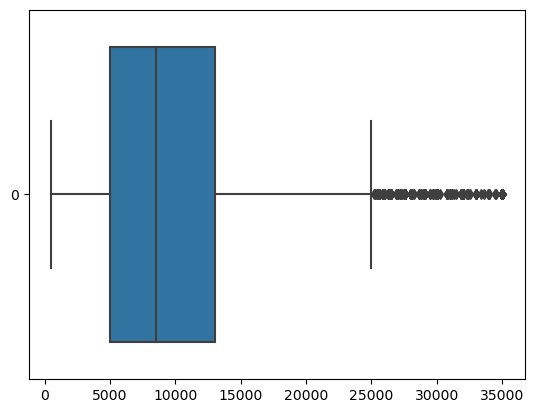

In [58]:
quantile_info = loan_df.total_rec_prncp.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.total_rec_prncp > quantile_info[0.95]]))
sns.boxplot(loan_df.loan_amnt, orient='h')

0.50     1226.1000
0.25      621.7600
0.50     1226.1000
0.75     2413.5475
0.80     2843.0960
0.95     6014.9890
0.97     7340.5818
0.99    10206.4809
Name: total_rec_int, dtype: float64
1552


<Axes: >

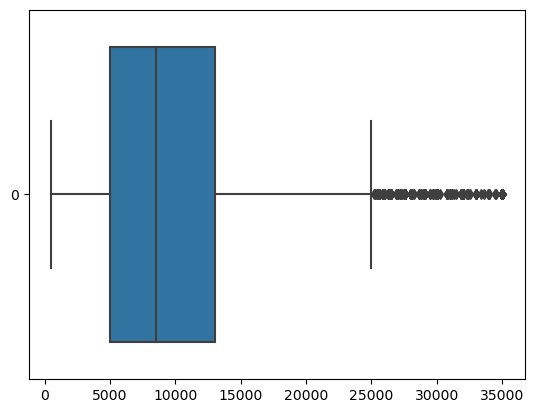

In [59]:
quantile_info = loan_df.total_rec_int.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])
print(quantile_info)
print(len(loan_df[loan_df.total_rec_int > quantile_info[0.95]]))
sns.boxplot(loan_df.loan_amnt, orient='h')

##### Though there is a presence of outliers in the above plots, overall quantile distribution is not extreme far from standard distribution. Hence no outlier treatment is needed.

## <font color='purple'> Univariate analysis of categorical variables <font>

In [60]:
for i in categorical:
    print(len(loan_df[i].unique()), '\t', i)

2 	 term
24565 	 emp_title
806 	 zip_code
50 	 addr_state
3 	 verification_status
55 	 issue_d
105 	 last_credit_pull_d
2 	 loan_status
14 	 purpose
7 	 grade
35 	 sub_grade
5 	 home_ownership
500 	 earliest_cr_line


#### As the total numer of unique values for emp_title, zip_code, earliest_cr_line are too large to fit on the countplot, picking top 50 for analysis

In [61]:
def PlotFirst50Categorical(column):
    result = []
    df_temp = loan_df.groupby(column) # Group by column name 
    
    for key,item in df_temp:
        temp = {}
        temp[column] = key 
        temp['Count'] = item[column].count() # Find length of column
        result.append(temp)
    
    df_result = pd.DataFrame(result) # Create data frame

    df_plot = df_result.nlargest(50,['Count']) # Finding top 50 counts in the dataframe 

    plt.figure(figsize=(15, 5))
    plt.title(column)

    sns.barplot(x=column, y='Count', data=df_plot) # Plot

    plt.xticks(rotation=90)
    plt.show()

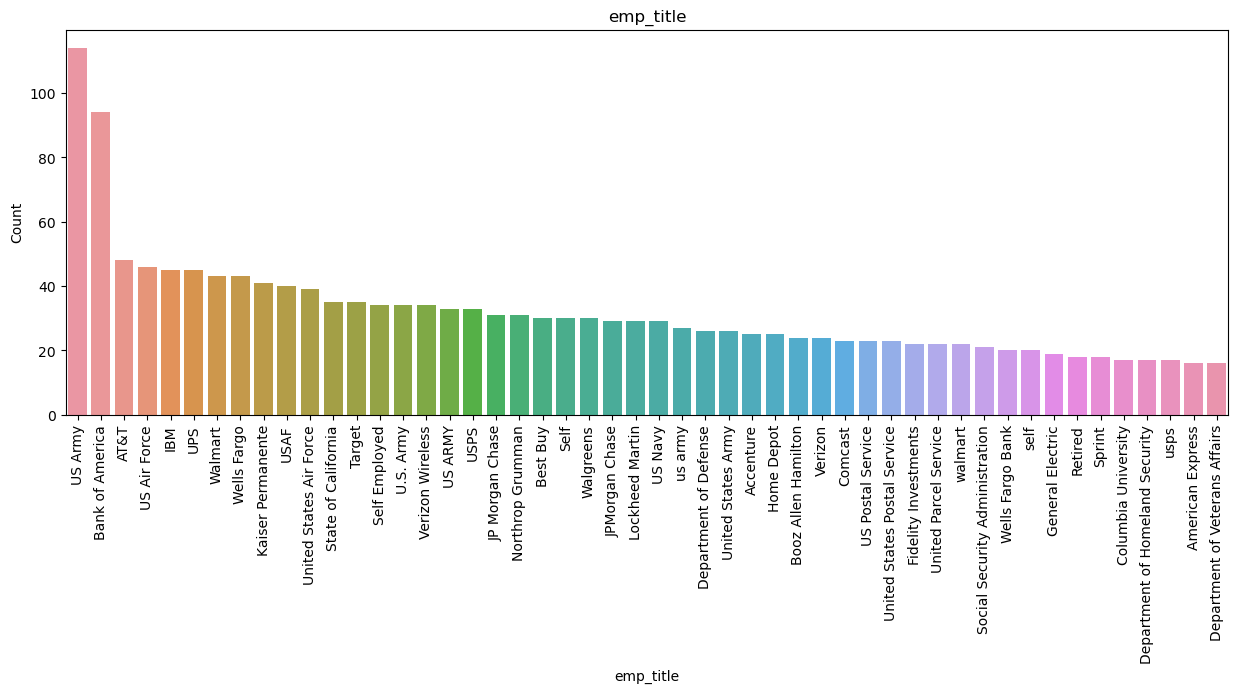

In [62]:
PlotFirst50Categorical('emp_title')

In [63]:
categorical.remove('emp_title')

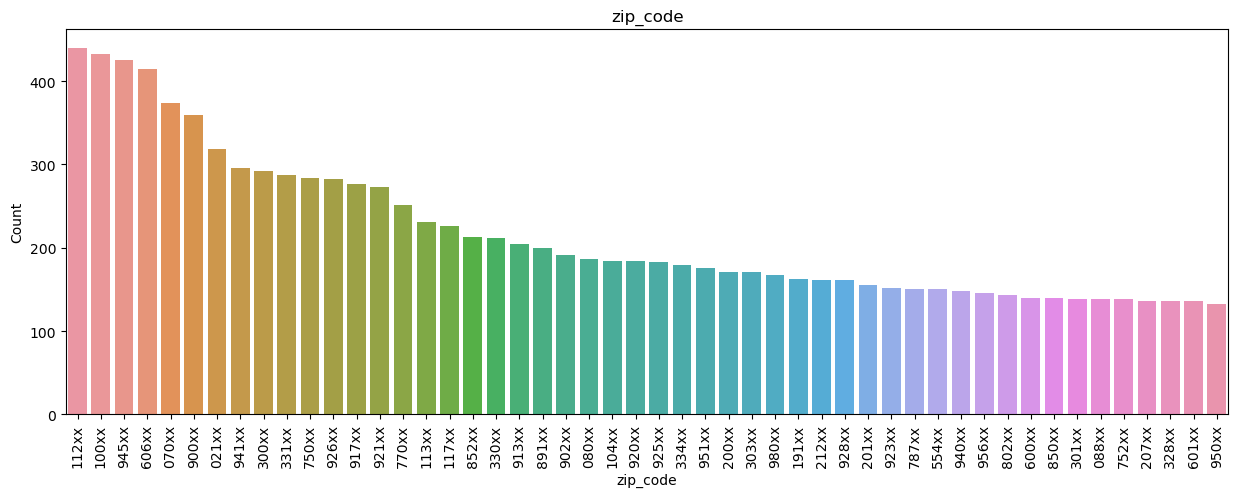

In [64]:
PlotFirst50Categorical('zip_code')

In [65]:
categorical.remove('zip_code')

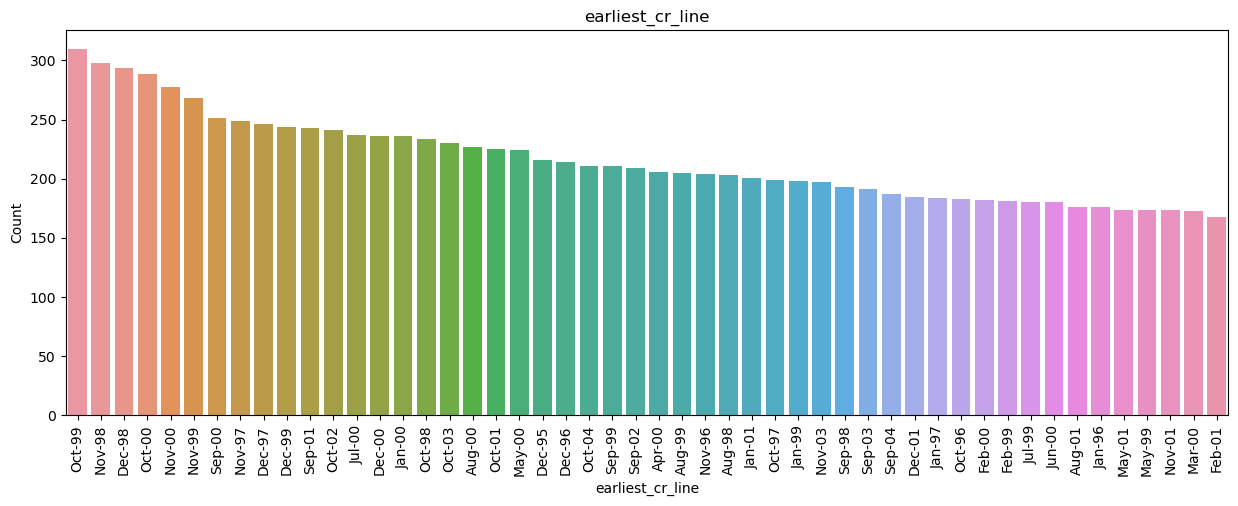

In [66]:
PlotFirst50Categorical('earliest_cr_line')

In [67]:
categorical.remove('earliest_cr_line')

#### Rendering count plots for rest of the columns

In [68]:
def plot_univariate_analysis_categorical(column_name):    
    plt.figure(figsize=(15, 5))
    plt.title(column_name)
    
    sns.countplot(x = column_name, data = loan_df)
            
    plt.xticks(rotation=90)
    plt.show()    


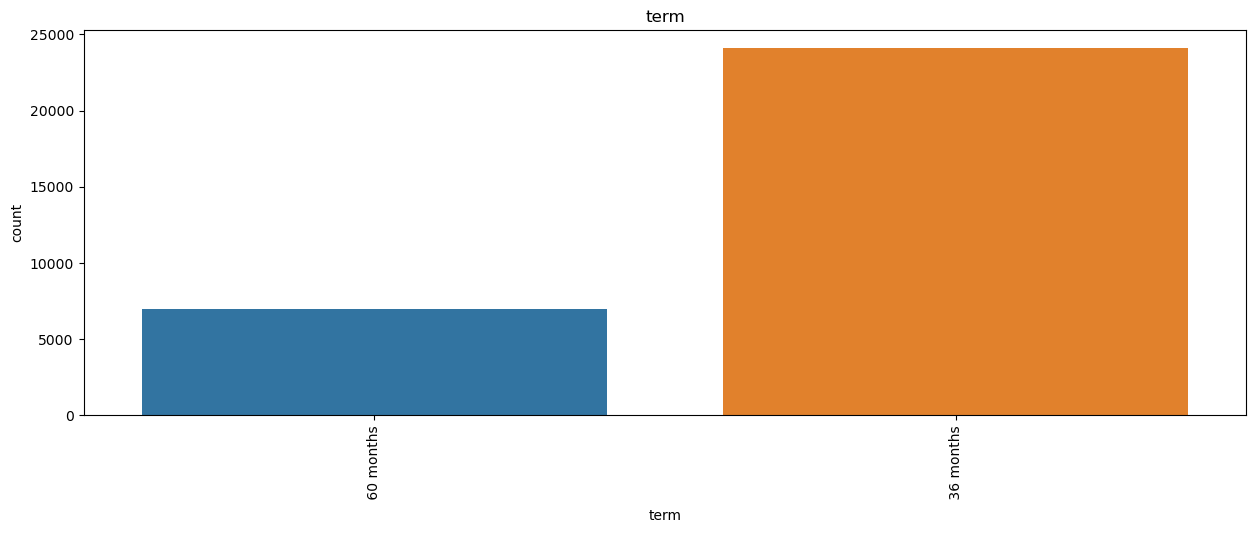

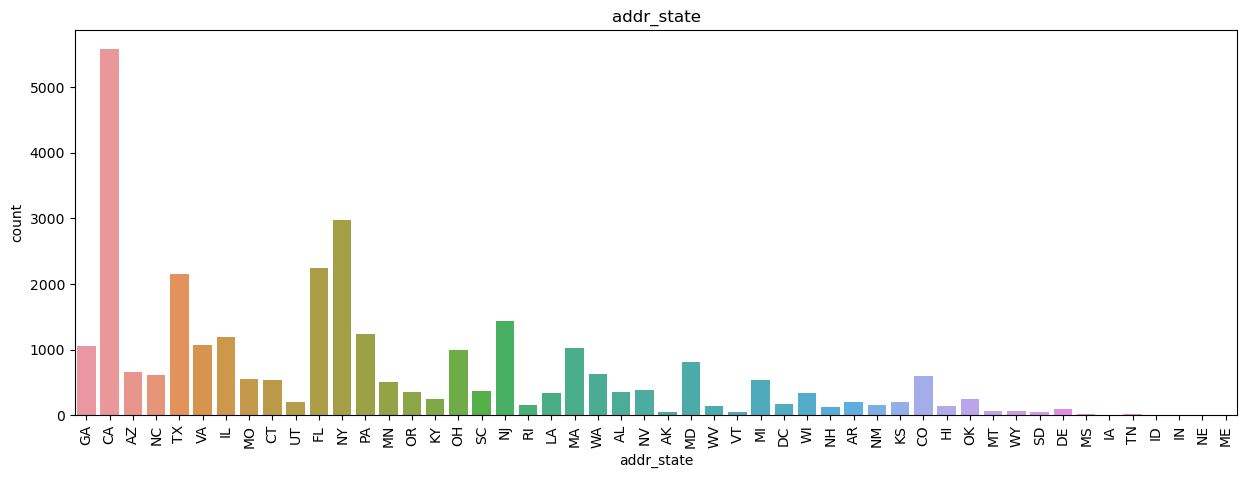

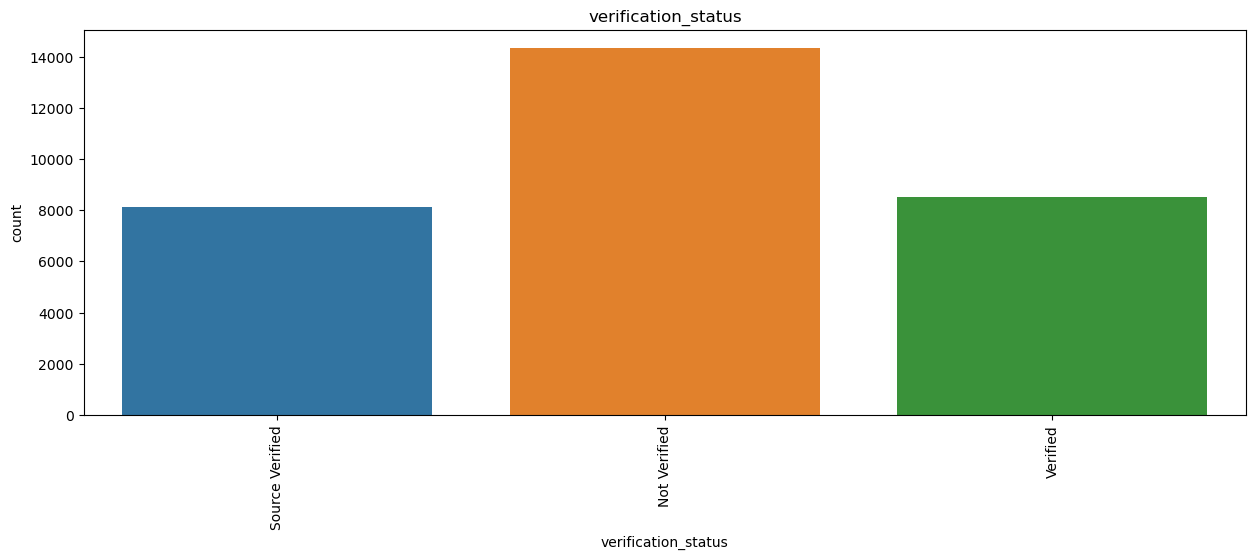

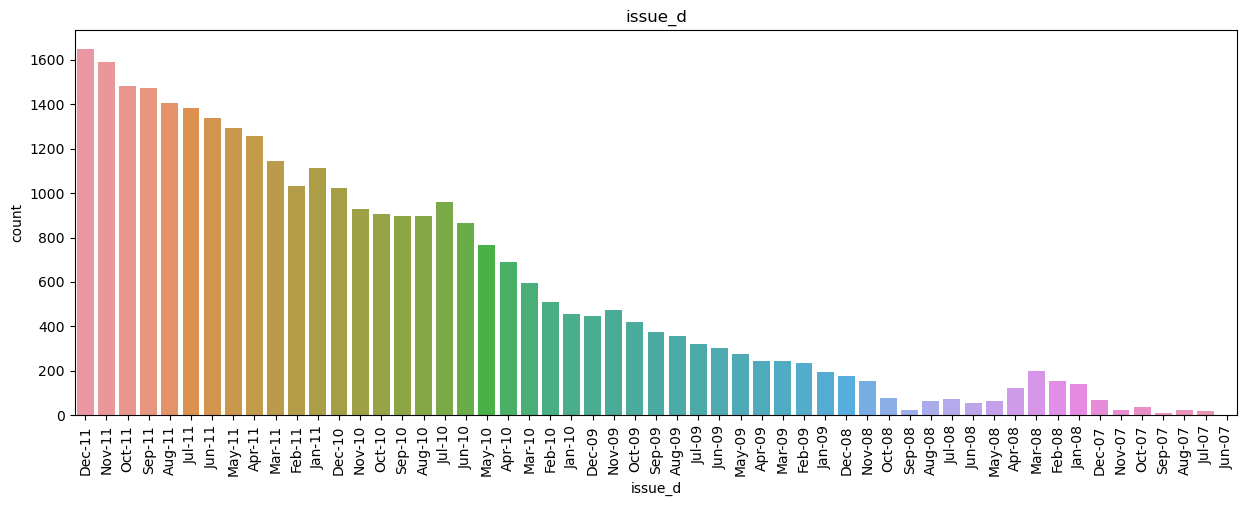

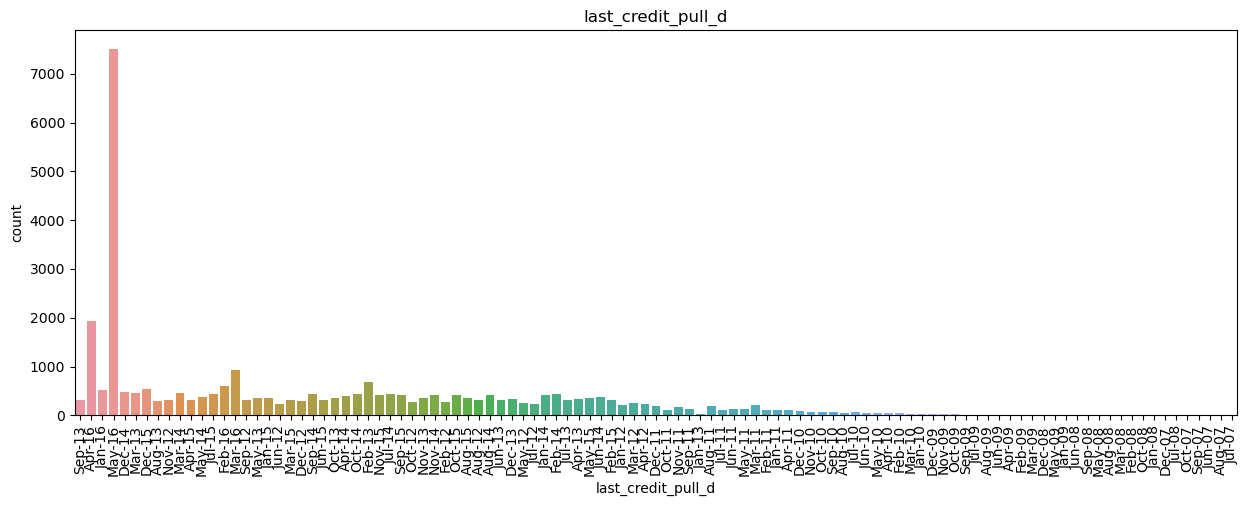

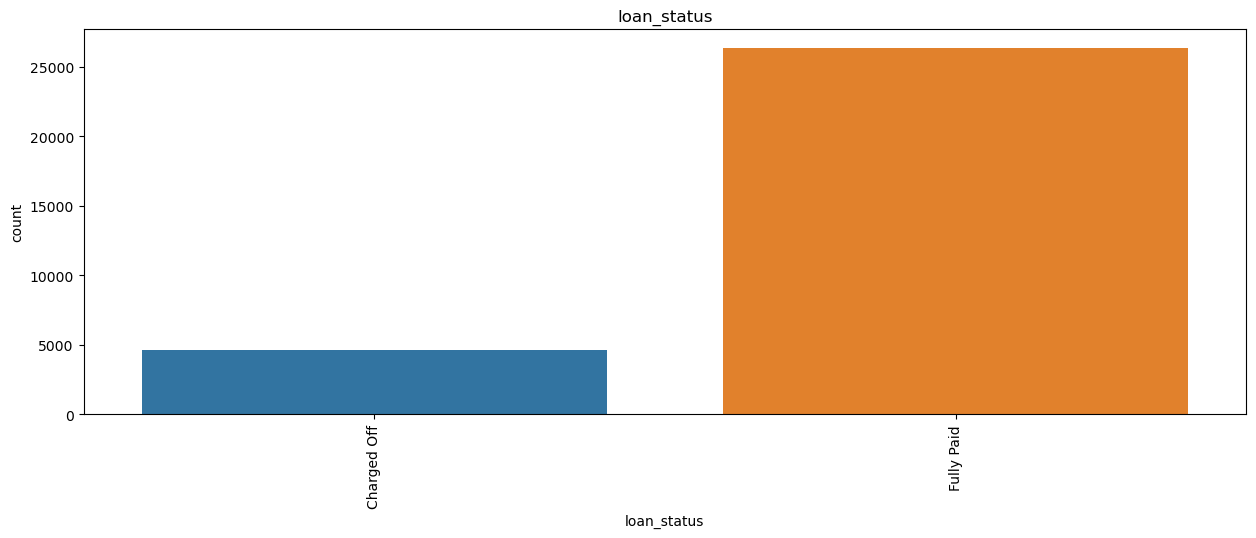

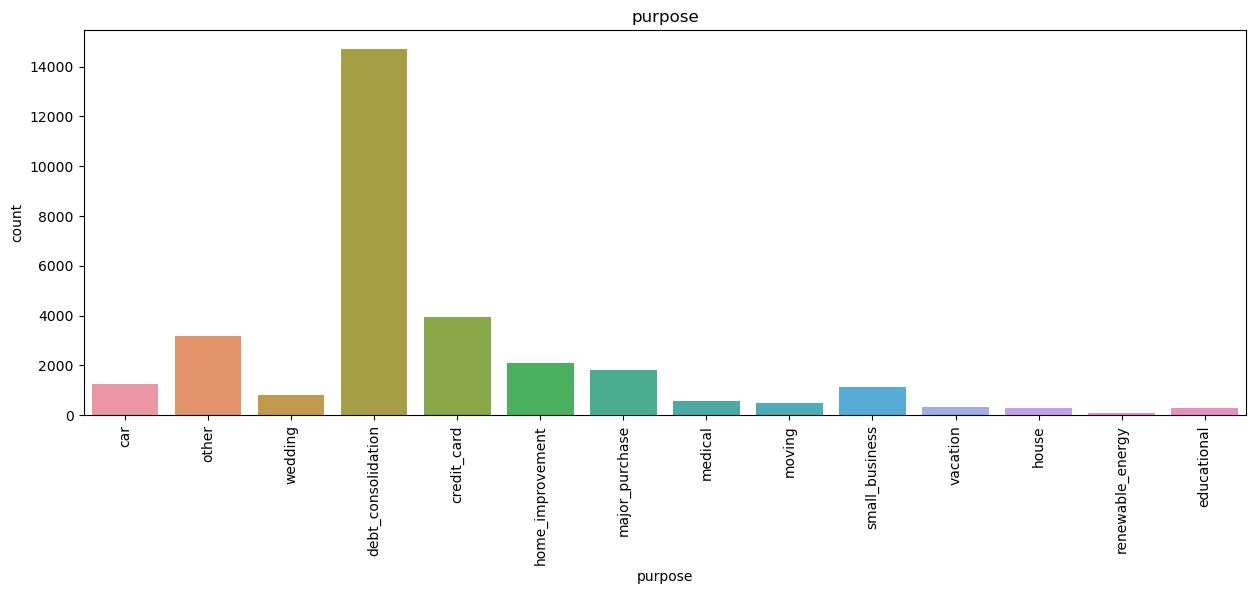

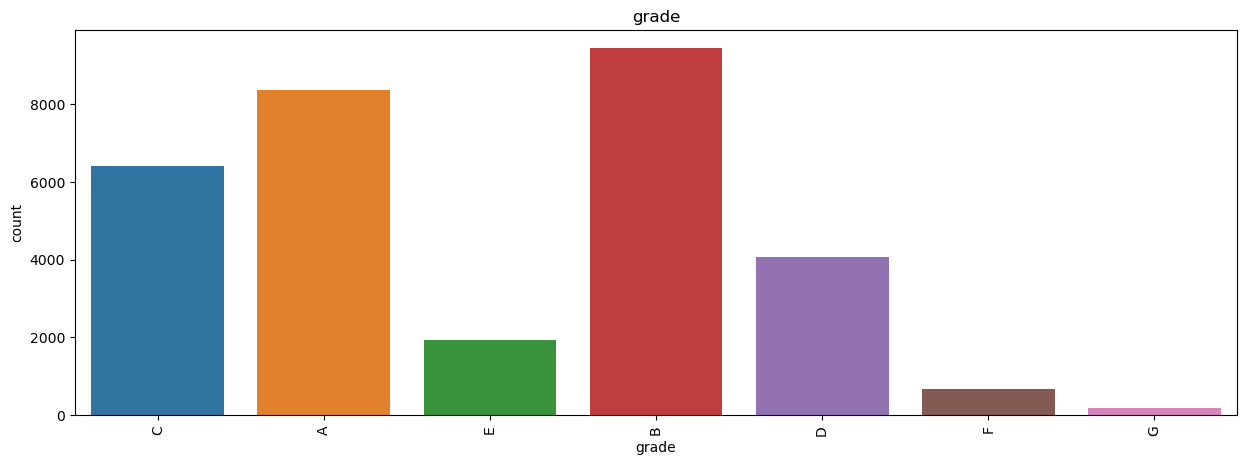

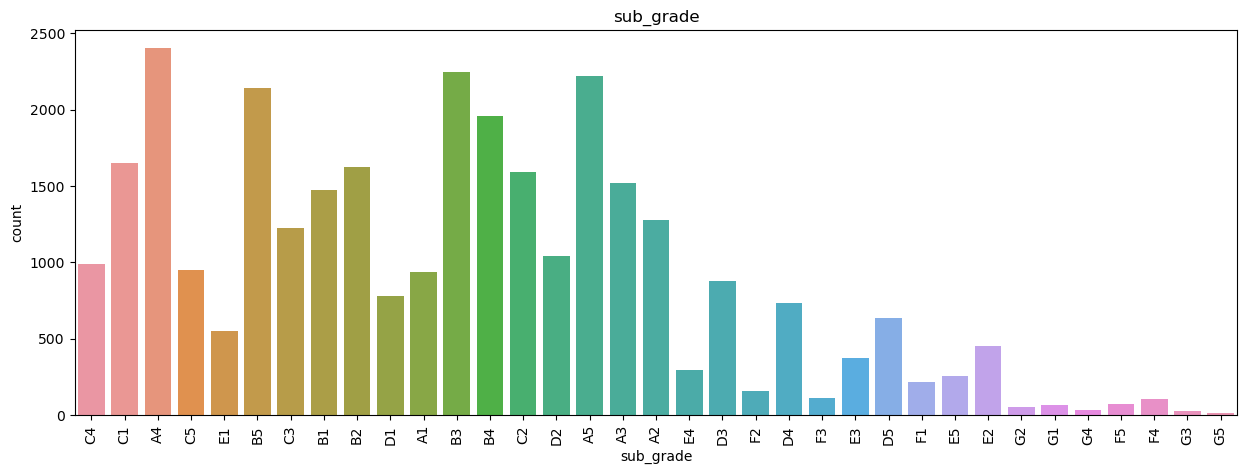

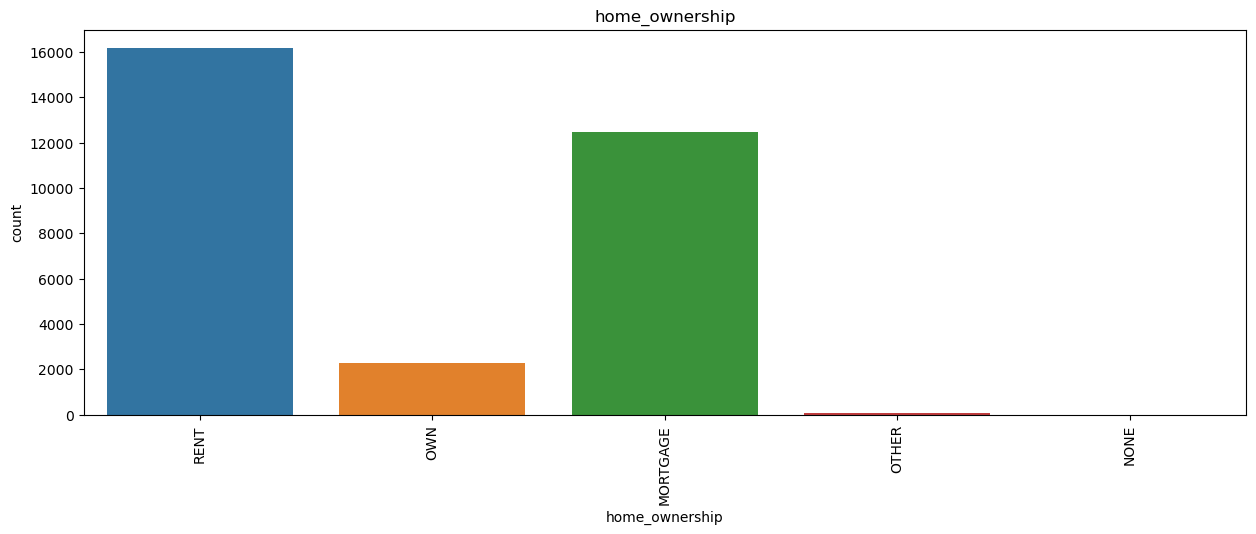

In [69]:
for i in categorical:
    plot_univariate_analysis_categorical(i)

## Insights from continouous univariate analysis

- Loan amount spread is between 5500–15000 and majority people have borrowed loan amount of approx. 10000
- Funded amount spread is between 5400–15000 and majority loan amount funded was approx. 9600
- Funded amount investment spread is between 5000–14000 and majority loan amount funded was approx. 8875
- Interest rate spread is between 9–14 and majority loan were approved with approx. interest rate of 11.83
- Dti ratio spread is between 8.25–18.61 and majority of the borrowers have dti ratio of 13.46
- Employment length of the borrowers ranges between 2–9 years where most of the people have approx. 4 years of employment length
- For most of the people, the number of delinquency incidents, derogatory public record, bankrupcies and enquieries in last 6 months are 0
- Only approx 30% of the people have healthy revoling credit utilization and majority people stands at approx 49.5 revol credit utilization
- Annual income of majority borrowers is between 40000-80000


## Insights from categorical univariate analysis

- The job title for which the maximum loan is taken by the borrower is US Army.
- The zip code from which the maximum loan is taken by the borrower is 112xx
- The month the borrower’s earliest reported credit line was opened is October-99.
- Term for 36 months has more loan as compared to 60 months
- The states from where most of the loans are taken is CA and NY
- There are more than 14000 loans that are not verified
- Loan issue date for maximum loans is Dec-11
- In May-16 most of the loan credit reports are pulled
- Fully paid loan count is more than 25000 whereas the charged-off loans count is less than 5000 which implies that most of the loans lended are fully paid by the borrowers
- Most of the loans are taken for debt_consolidation purpose
- A and B grade loas were issued more than any other loan category followed by A4, B3, A5 and B5 sub grades
- Most of the borrowers are staying on the rent followed by mortgage category


#### Deriving Year and Month attributes for loan issue date

In [70]:
loan_df['loan_issue_year'] = loan_df.issue_d.apply(lambda d : '20'+ d.split('-')[1])
loan_df['loan_issue_year'].value_counts()

2011    16161
2010     9491
2009     3888
2008     1305
2007      185
Name: loan_issue_year, dtype: int64

In [71]:
loan_df['loan_issue_month'] = loan_df.issue_d.apply(lambda d : d.split('-')[0])
loan_df['loan_issue_month'].value_counts()

Dec    3365
Nov    3168
Oct    2923
Sep    2783
Jul    2754
Aug    2744
Jun    2560
May    2400
Apr    2312
Mar    2179
Feb    1933
Jan    1909
Name: loan_issue_month, dtype: int64

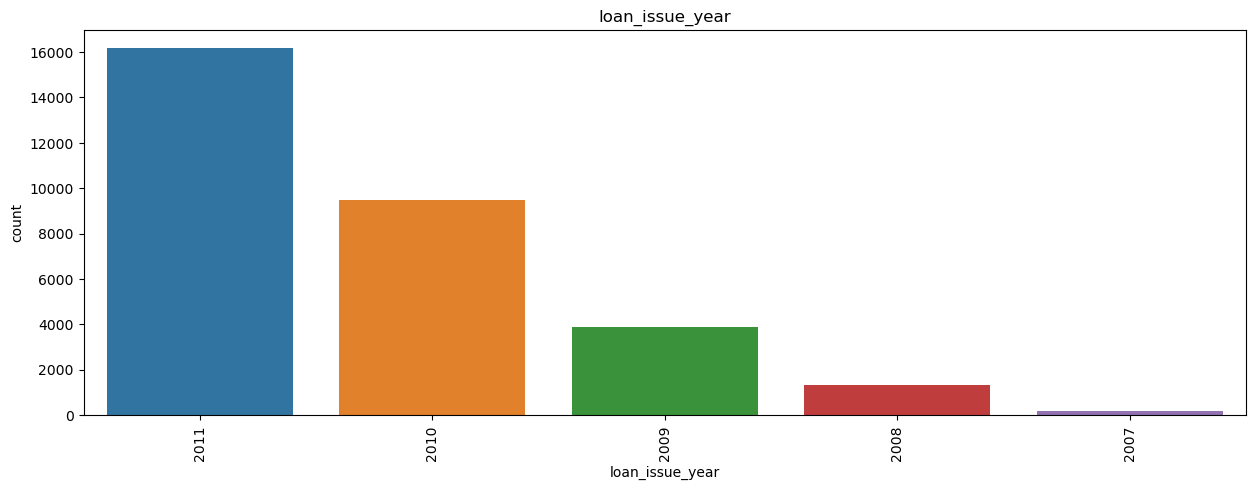

In [72]:
plot_univariate_analysis_categorical('loan_issue_year')

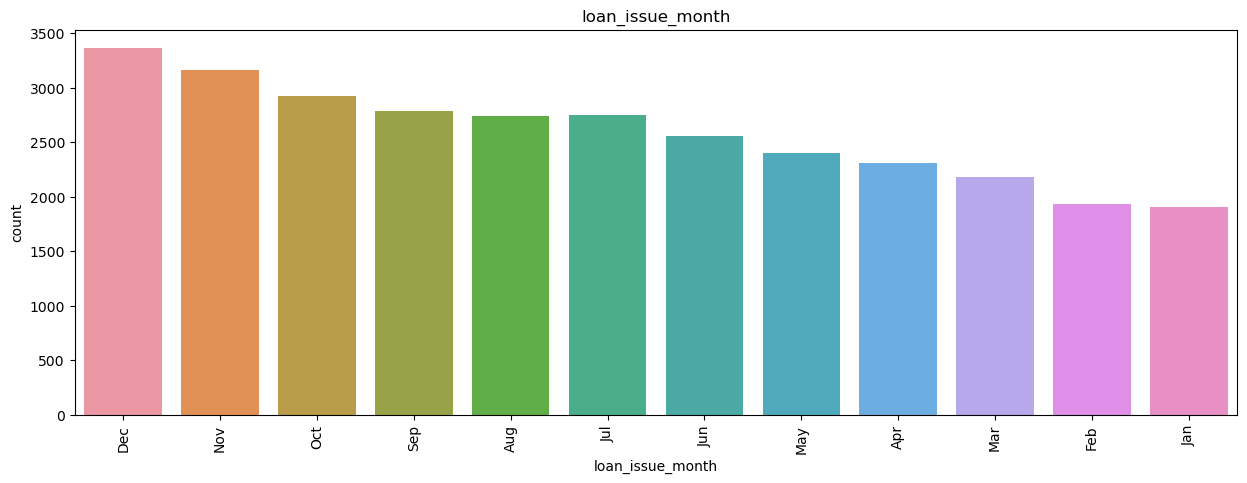

In [73]:
plot_univariate_analysis_categorical('loan_issue_month')

## Insights from derived categorical analysis

- Maximum loans are issued in December month
- Maximum loans are issued in 2011 year

## <font color='purple'> Segmented univariate analysis </font>

#### Creating bins for segmented analysis

<p>To create the bins for the attributes, lets first see whats the spread of the attribute and create similar size bins for the atributes having similar spread range

In [74]:
# Print min and max range for various columns

for i in continuous:
    minV = loan_df[i].min()
    maxV = loan_df[i].max()
    print(minV, "\t", maxV, "\t\t", i)

500 	 35000 		 loan_amnt
500 	 35000 		 funded_amnt
0.0 	 35000.0 		 funded_amnt_inv
5.42 	 24.4 		 int_rate
0.0 	 29.99 		 dti
0 	 10 		 emp_length
4000.0 	 140000.0 		 annual_inc
0 	 11 		 delinq_2yrs
0.0 	 120.0 		 mths_since_last_delinq
0 	 8 		 inq_last_6mths
0 	 4 		 pub_rec
0.0 	 2.0 		 pub_rec_bankruptcies
2 	 42 		 open_acc
2 	 90 		 total_acc
0 	 35954 		 revol_bal
0.0 	 99.9 		 revol_util
0.0 	 58563.67993 		 total_pymnt
0.0 	 58563.68 		 total_pymnt_inv
0.0 	 11873.37 		 last_pymnt_amnt
0.0 	 35000.02 		 total_rec_prncp
0.0 	 23563.68 		 total_rec_int
0.0 	 180.2 		 total_rec_late_fee


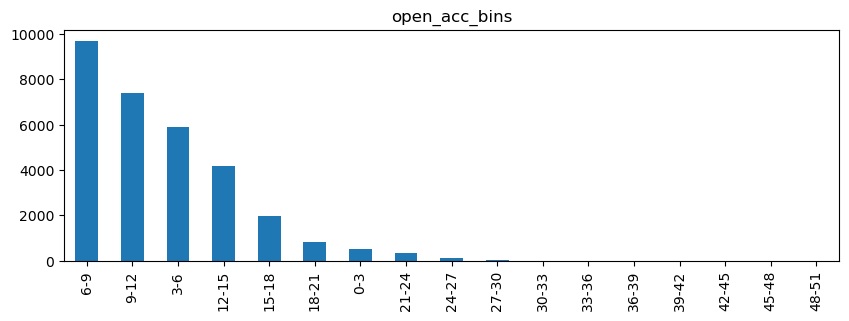

In [75]:
# Create and plot bins for open_acc with the range from 0 to 50 and bin size of 3


# create range lables
range_label = []
for i in range(0,50,3): 
    range_label.append(str(str(i)+'-'+str(i+3)))

# create bins
bins = np.linspace(0, 50, 18)

# Add a new column in the dataset indicating the bin for the record
loan_df['open_acc_bins'] = pd.cut(loan_df['open_acc'], bins, labels=range_label)

# Plot the bins and the count of records that falls under the bins
plt.figure(figsize = (10,3))
plt.title("open_acc_bins")
loan_df.open_acc_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()  

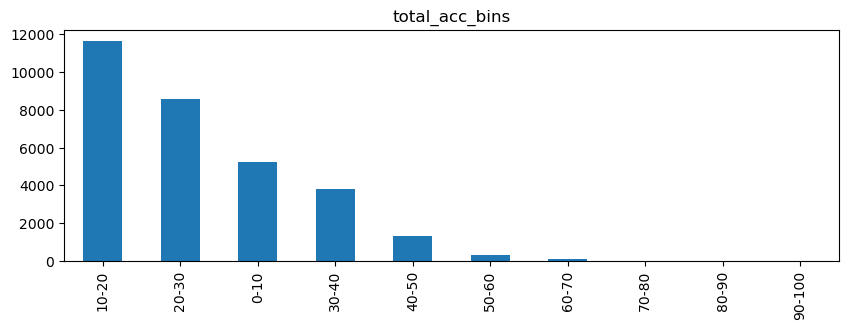

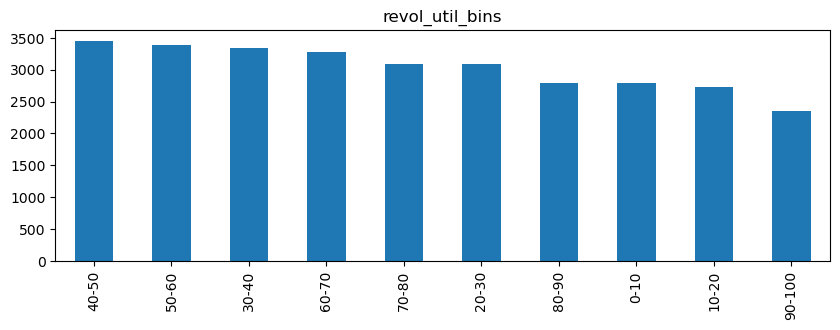

In [76]:
# Create and plot bins for total_acc and revol_util with the range from 0 to 100 and bin size of 10

# create range lables
range_label = []
for i in range(0,100,10): 
    range_label.append(str(str(i)+'-'+str(i+10)))

# create bins
bins = np.linspace(0, 100, 11)

# Add a new columns in the dataset indicating the bin for the record
loan_df['total_acc_bins'] = pd.cut(loan_df['total_acc'], bins, labels=range_label)
loan_df['revol_util_bins'] = pd.cut(loan_df['revol_util'], bins, labels=range_label)


# Plot the bins and the count of records that falls under the bins

plt.figure(figsize = (10,3))
plt.title("total_acc_bins")
loan_df.total_acc_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()  

plt.figure(figsize = (10,3))
plt.title("revol_util_bins")
loan_df.revol_util_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()   

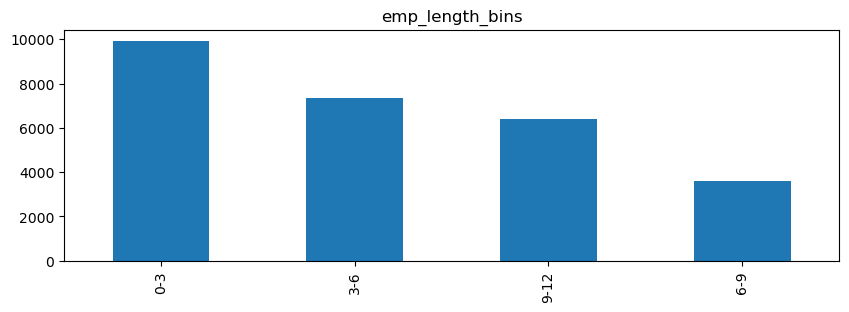

In [77]:
# Create and plot bins for emp_length with the range from 0 to 12 and bin size of 3

# create range lables
range_label = []
for i in range(0,12,3): 
    range_label.append(str(str(i)+'-'+str(i+3)))

# create bins
bins = np.linspace(0, 12, 5)

# Add a new column in the dataset indicating the bin for the record
loan_df['emp_length_bins'] = pd.cut(loan_df['emp_length'], bins, labels=range_label)

# Plot the bins and the count of records that falls under the bins
plt.figure(figsize = (10,3))
plt.title("emp_length_bins")
loan_df.emp_length_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()         


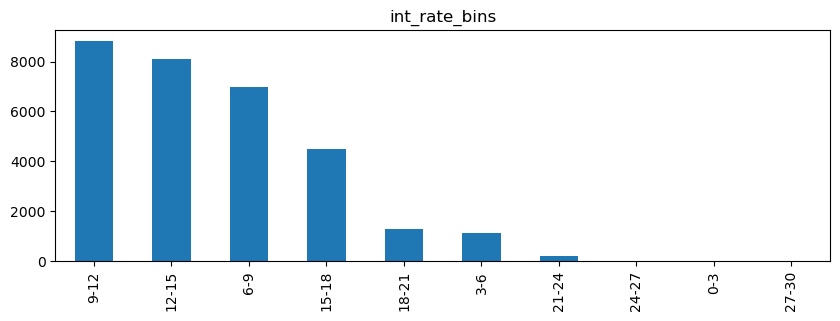

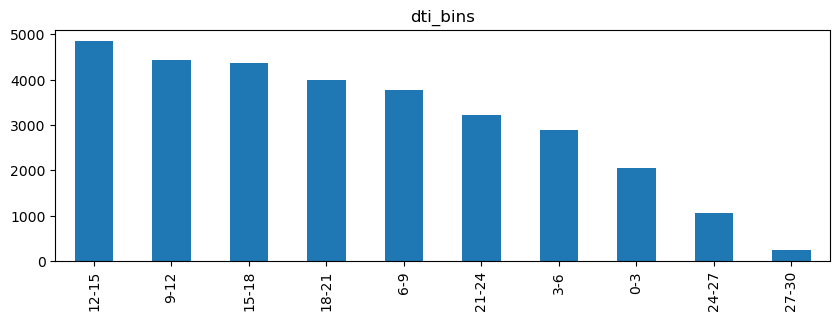

In [78]:
# Create and plot bins for int_rate and dti with the range from 0 to 30 and bin size of 3

# create range lables
range_label = []
for i in range(0,30,3): 
    range_label.append(str(str(i)+'-'+str(i+3)))

# create bins
bins = np.linspace(0, 30, 11)

# Add a new columns in the dataset indicating the bin for the record
loan_df['int_rate_bins'] = pd.cut(loan_df['int_rate'], bins, labels=range_label)
loan_df['dti_bins'] = pd.cut(loan_df['dti'], bins, labels=range_label)


# Plot the bins and the count of records that falls under the bins
plt.figure(figsize = (10,3))
plt.title("int_rate_bins")
loan_df.int_rate_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()         


plt.figure(figsize = (10,3))
plt.title("dti_bins")
loan_df.dti_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()   

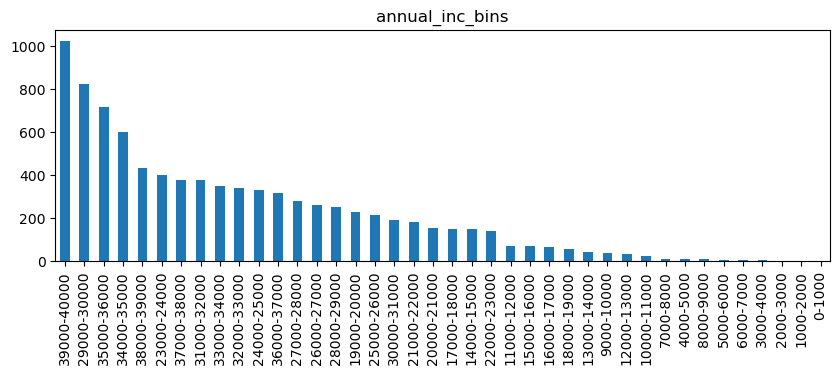

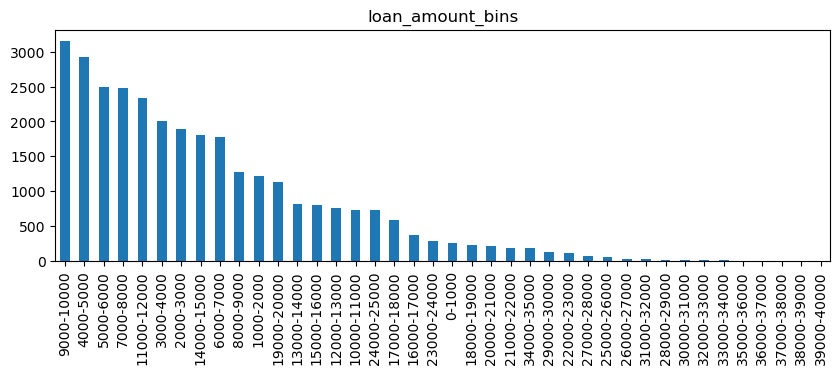

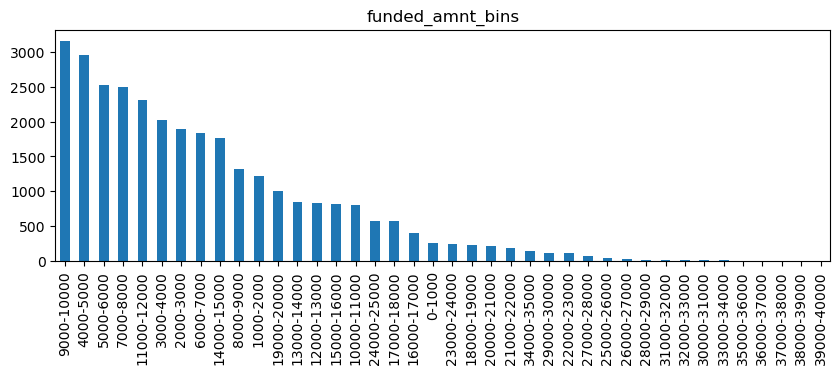

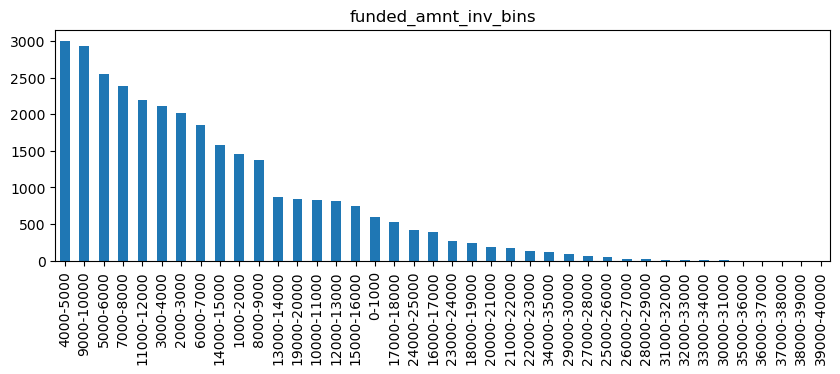

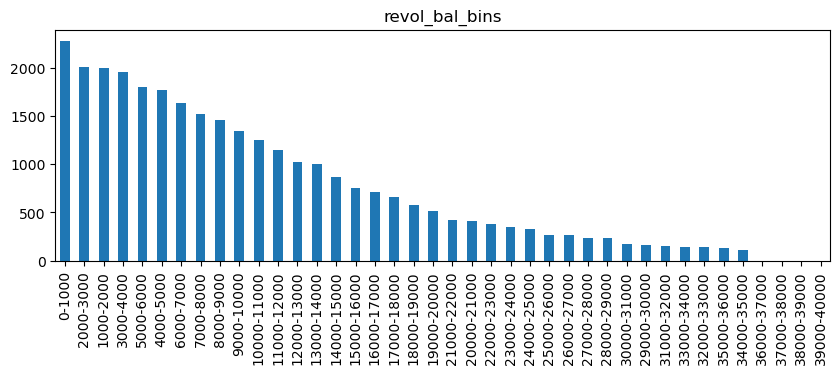

In [79]:
# Create and plot bins for loan_amnt, funded_amnt, funded_amnt_inv, annual_inc and revol_bal 
# with the range from 0 to 40000 and bin size of 1000

# create range lables
range_label = []
for i in range(0,40000,1000): 
    range_label.append(str(str(i)+'-'+str(i+1000)))

# create bins
bins = np.linspace(0, 40000, 41)

# Add a new columns in the dataset indicating the bin for the record
loan_df['loan_amount_bins'] = pd.cut(loan_df['loan_amnt'], bins, labels=range_label)
loan_df['funded_amnt_bins'] = pd.cut(loan_df['funded_amnt'], bins, labels=range_label)
loan_df['funded_amnt_inv_bins'] = pd.cut(loan_df['funded_amnt_inv'], bins, labels=range_label)
loan_df['annual_inc_bins'] = pd.cut(loan_df['annual_inc'], bins, labels=range_label)
loan_df['revol_bal_bins'] = pd.cut(loan_df['revol_bal'], bins, labels=range_label)


# Plot the bins and the count of records that falls under the bins

plt.figure(figsize = (10,3))
plt.title("annual_inc_bins")
loan_df.annual_inc_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()
                                    
plt.figure(figsize = (10,3))
plt.title("loan_amount_bins")
loan_df.loan_amount_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize = (10,3))
plt.title("funded_amnt_bins")
loan_df.funded_amnt_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize = (10,3))
plt.title("funded_amnt_inv_bins")
loan_df.funded_amnt_inv_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize = (10,3))
plt.title("revol_bal_bins")
loan_df.revol_bal_bins.value_counts().plot(kind = 'bar') 
plt.xticks(rotation=90)
plt.show()

## Insights from segmented analysis of the continuous data

- Maximum loan borrowers have 6-9 open accounts
- Maximum loan borrowers have 10-20 total accounts
- Revoling credit utilization for most of the borrowers lies between 40-50
- Revolving credit balance for most of the borrowers is 0-1000
- Employment length for most of the borrowers is between 0-3 indicating that the people who are very early in their career needs more loan
- Most of the loans are lended with 9-12 interest rate range
- Dti ratio for maximum loans is 12-15
- Borrowers with annual income between 39000–40000 are issued the maximum loans
- Maximum people have applied for loan amount beween 9000–10000.
- Maximum funded amount is between 9000–10000.
- Maximum investor funded amount is between 4000-5000 followed by 9000–10000.

## <font color='purple'> Heatmap to analyze correlation between continuous data </font>

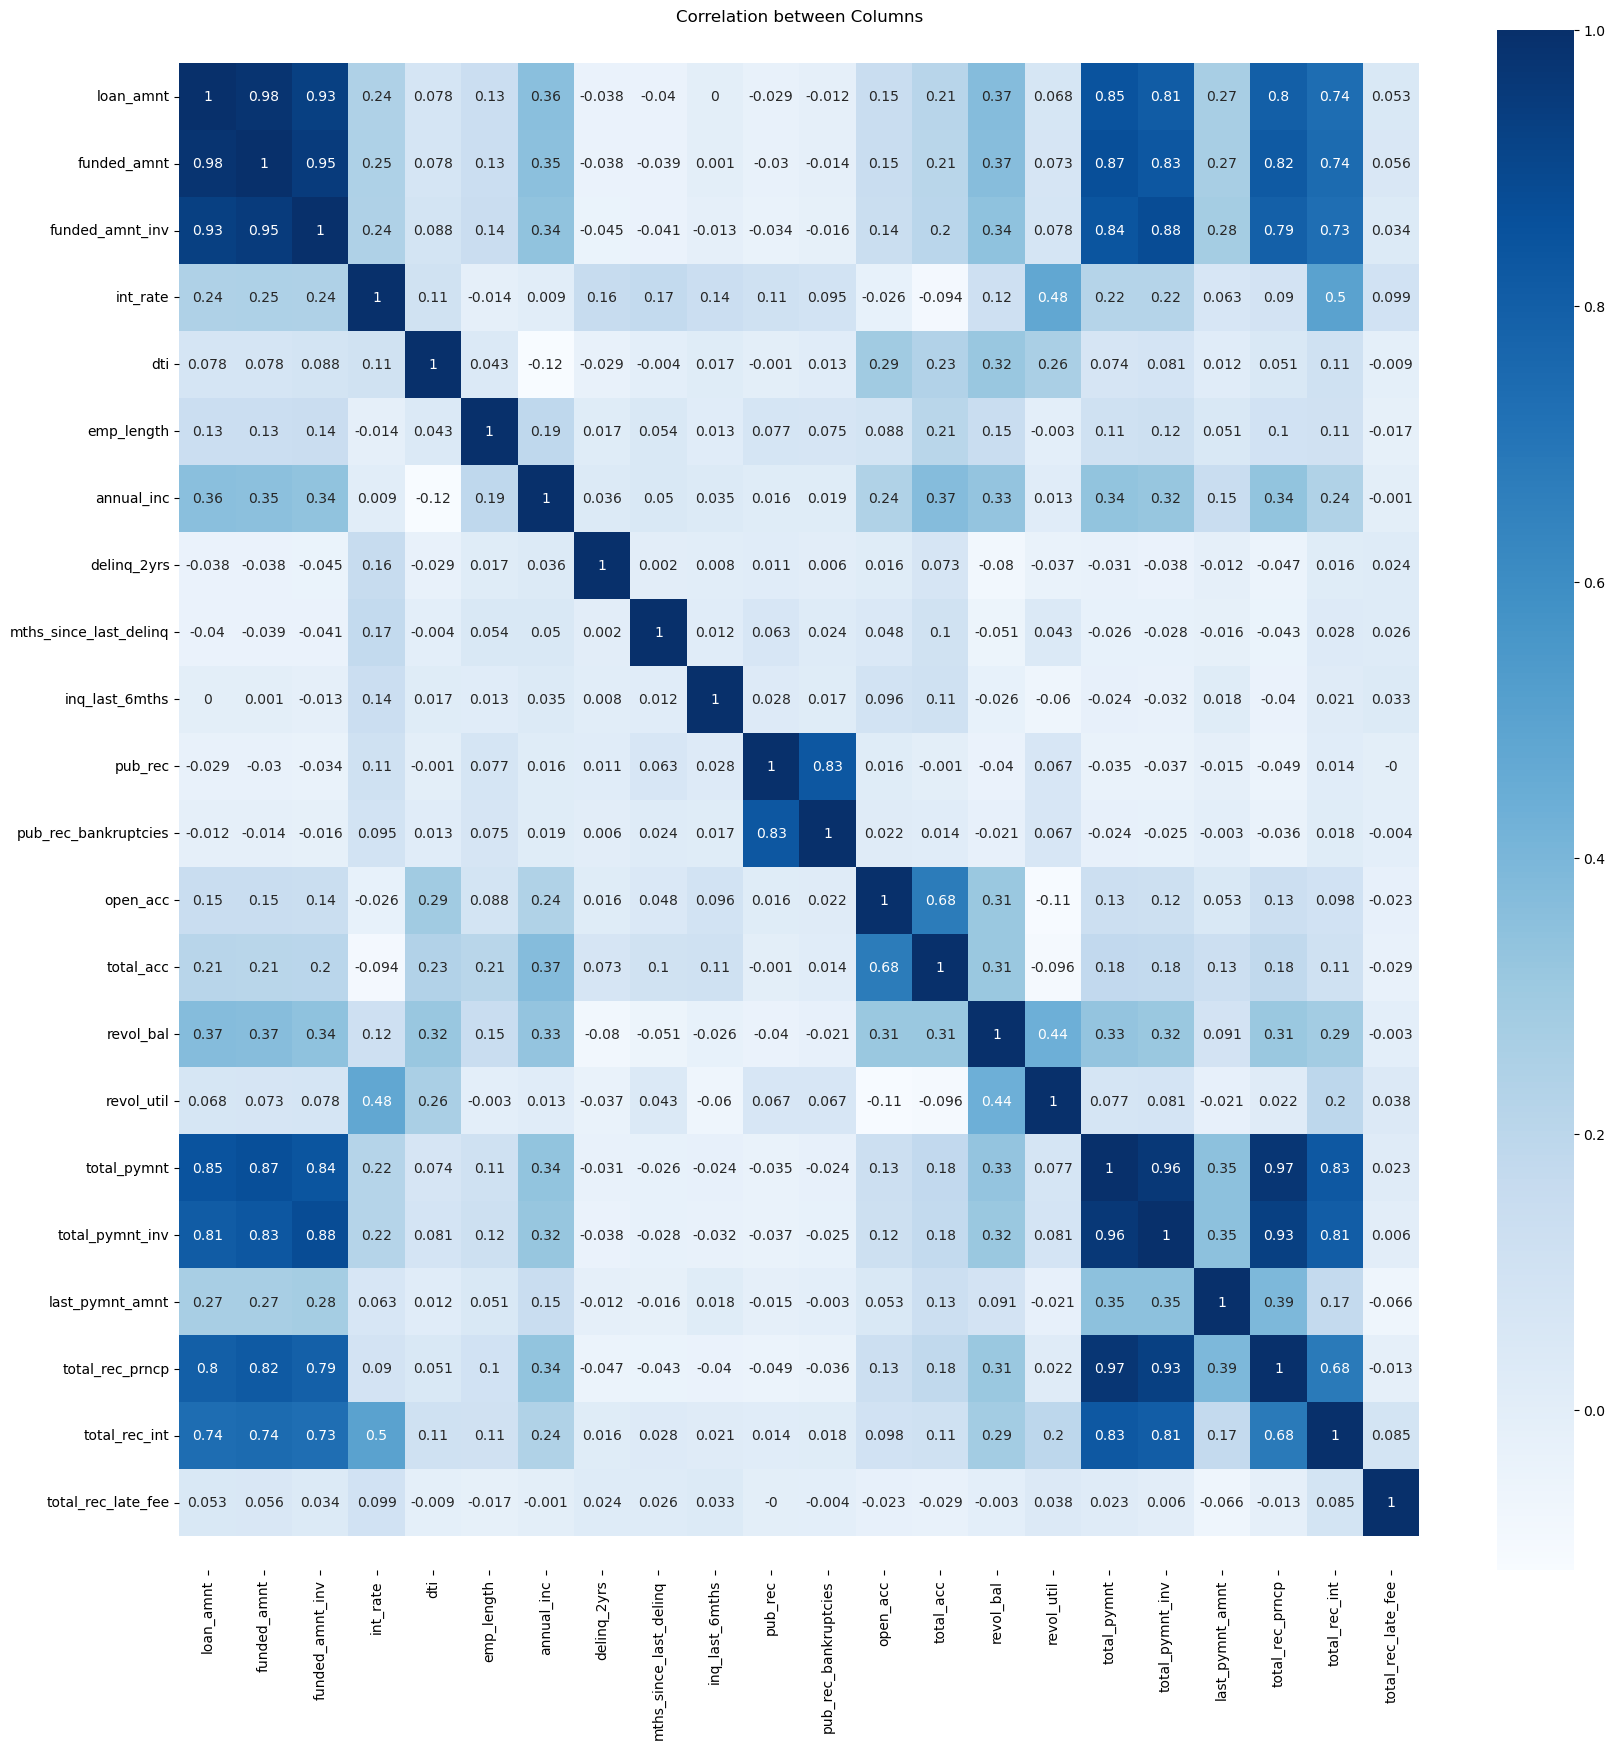

In [80]:
#Finding correlation matric
corr_matrix = round(loan_df[continuous].corr(),3)
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

##### Above heat map shows that loan_amt,funded_amt,funded_amt_inv are highly correlated. It implies that investors lend approx 95 percent of the loan amount claimed by the borrower.
##### Also total_pymnt, total_pymnt_inv, total_rec_prncp are highly correlated. It implies that borrower has paid approx 96 percent of the money investors lended.

## <font color='purple'> Analysis of Charged Off data </font>

<p> Now lets analyze the attributes for the loans that are declared as charged off to understand the key factors for defaulted loans
<p> To begin with, lets plot the distibutions for both charged off and fully paid loan and compare

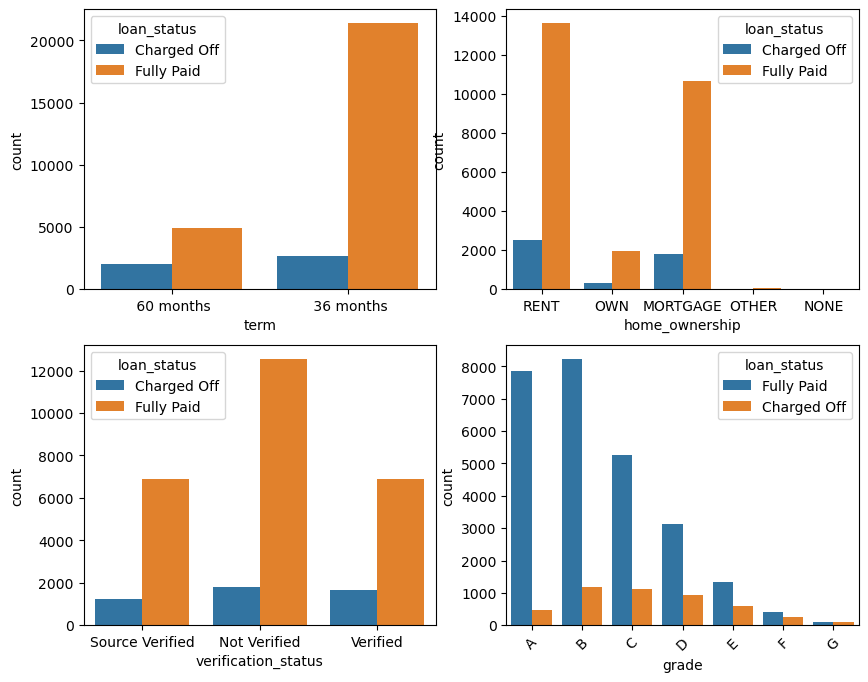

In [81]:
# Get the 2*2 grid and plot the subplots as specified below
figure, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

# Distribution Plot for Grade vs Loan Amount
ax = axes[0,0]    
sns.countplot(x='term', hue='loan_status', ax=ax, data=loan_df)
plt.xticks(rotation=45)

# Distribution Plot for Grade vs interest rate
ax = axes[0,1] 
sns.countplot(x='home_ownership', hue='loan_status', ax=ax, data=loan_df)
plt.xticks(rotation=45)

# Distribution Plot for Grade vs Dti
ax = axes[1,0]   
sns.countplot(x='verification_status', hue='loan_status', ax=ax, data=loan_df)
plt.xticks(rotation=45)

# Distribution Plot for Grade vs Dti
ax = axes[1,1]   
sns.countplot(x='grade', hue='loan_status', data=loan_df, hue_order=['Fully Paid', 'Charged Off'], order= ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xticks(rotation=45)

plt.show()

##### As seen in the above plots,

- The count of defaulters are higher in 36 months term with about 2500 charge-off whereas it is just 2000 for 36 month term. So, there is a possibility that short term loans are more risky and prone to higher default rate
- Most of defaulted barrowers are in decreasing order in grades. B, C and D grade loans results in more defaults whereas A and B category loans are majoritily paid fully
- Borrowers who are staying on rent or fall under mortgage category are more likely to default the loan
- Borrowers who are source verified have less default rate than non verified or verified borrowers

<p> Now lets continue plotting other attributes

In [82]:
def plotAttributeVsLoanStatus(column_name):  
    
    # Plot countplot with loan status hue for the given column
    
    plt.figure(figsize=(18, 5))
    plt.title(column_name)
    
    sns.countplot(x=column_name, hue='loan_status', data=loan_df)
                
    plt.xticks(rotation=90)
    plt.show()    

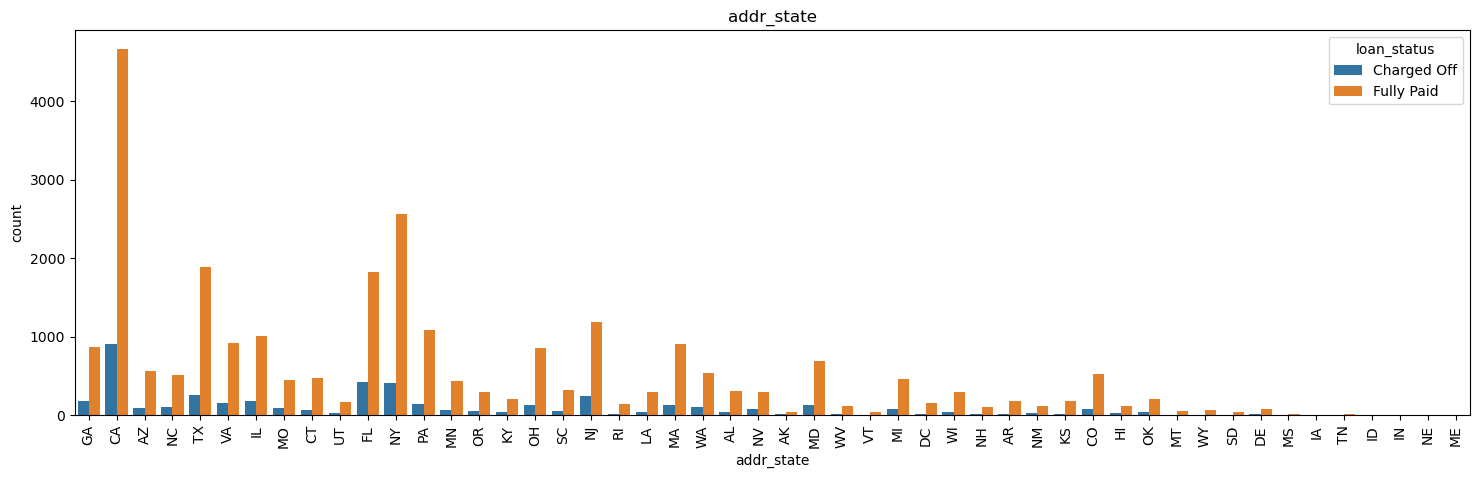

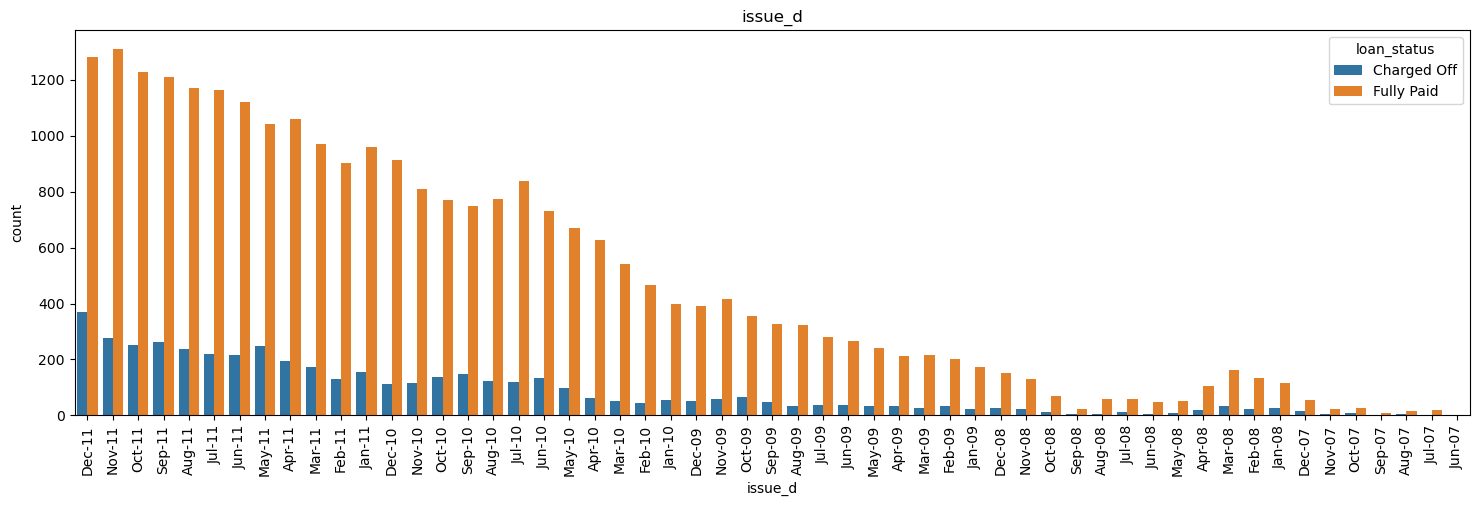

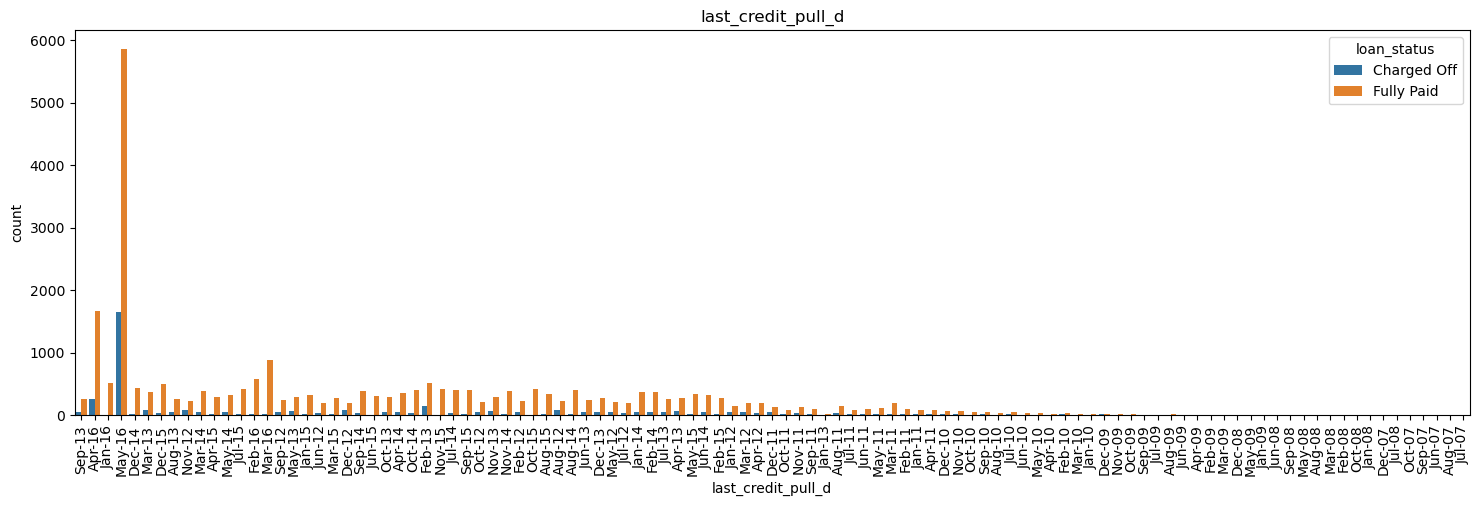

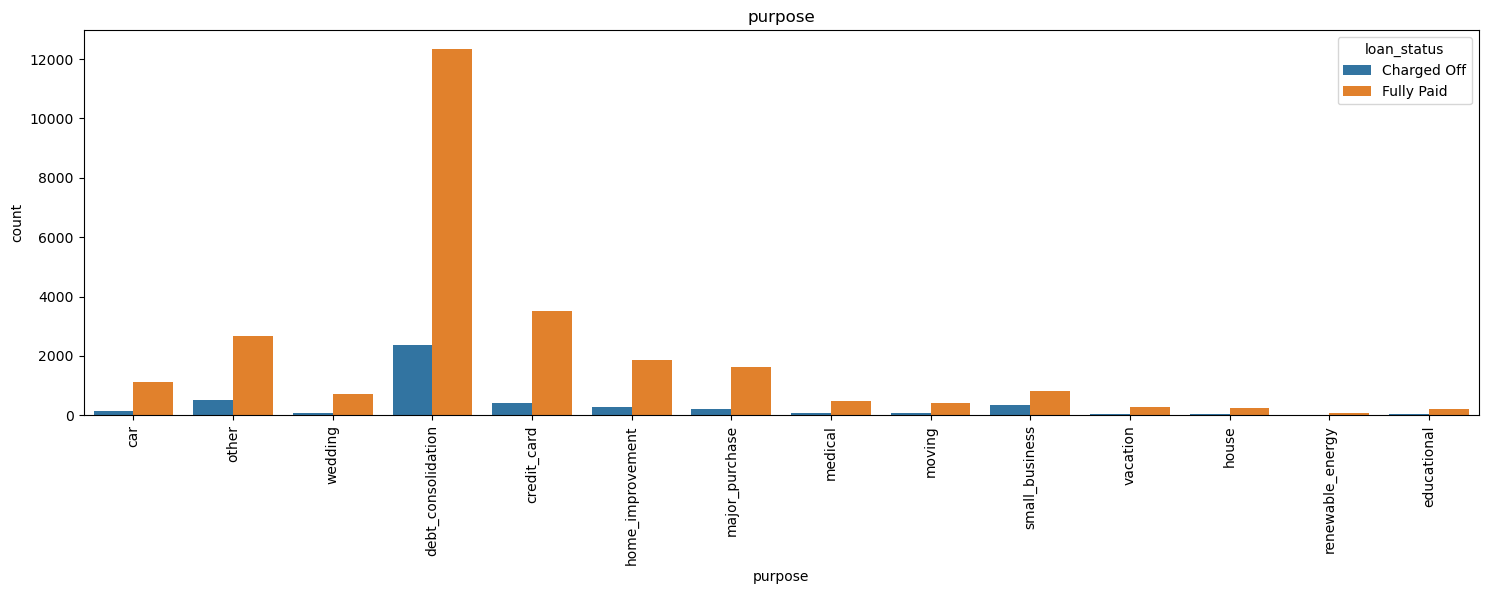

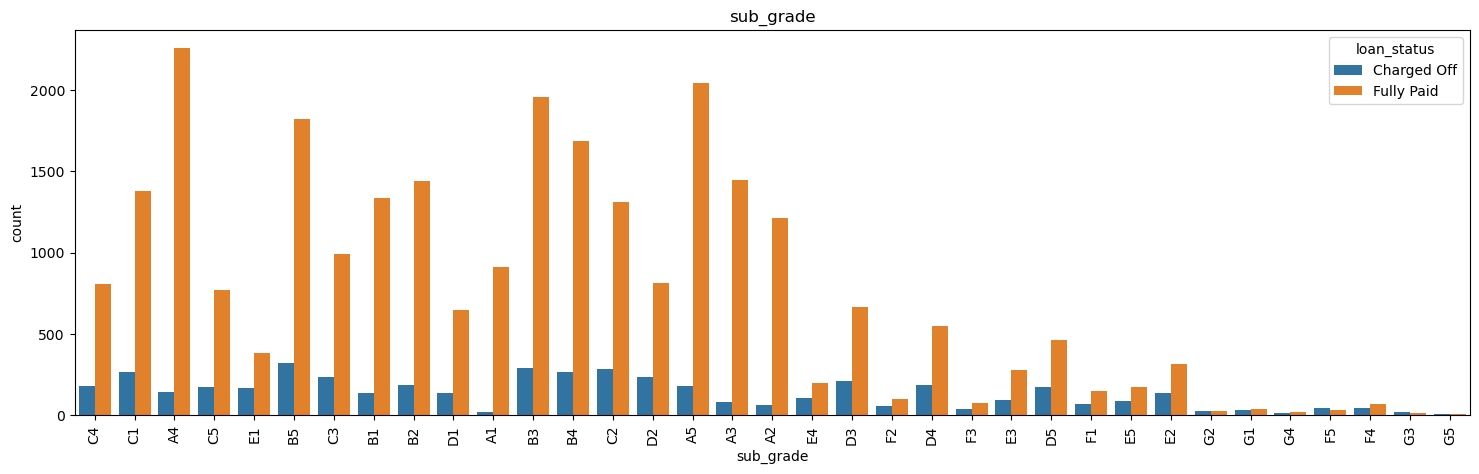

In [83]:
# Plot distibutions for both charged off and fully paid loan for below attributes
#'addr_state','issue_d','last_credit_pull_d','purpose','sub_grade'

plotCols = ['addr_state','issue_d','last_credit_pull_d','purpose','sub_grade']

for i in plotCols:
    plotAttributeVsLoanStatus(i)

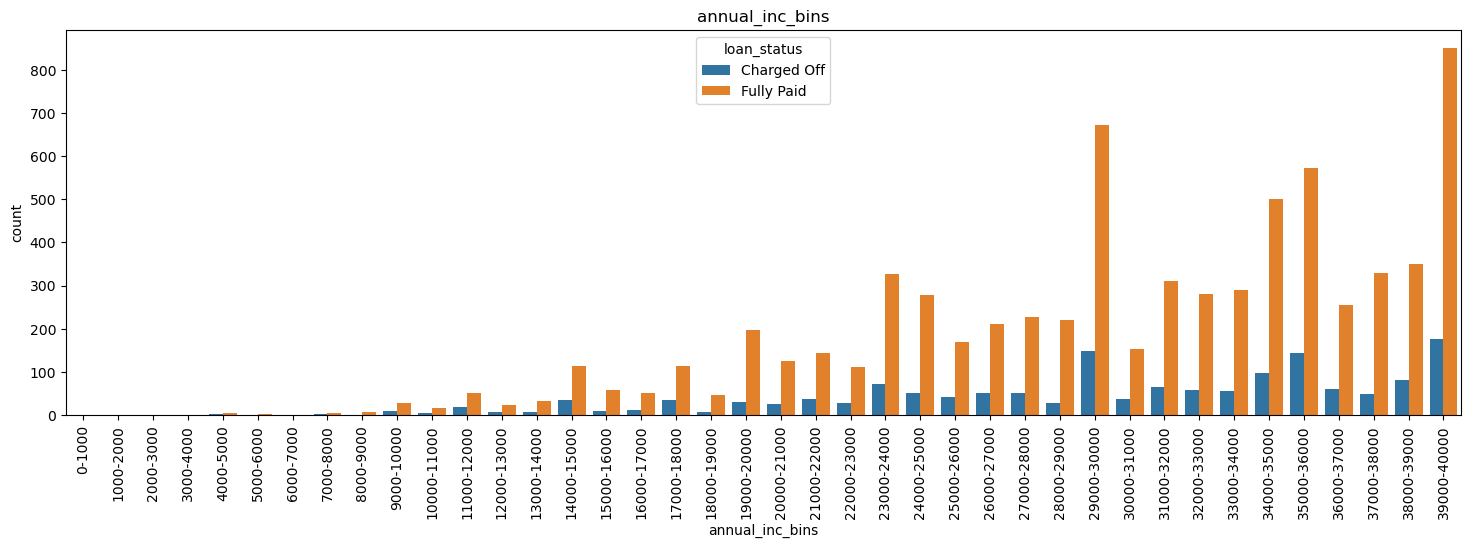

In [84]:
plotAttributeVsLoanStatus('annual_inc_bins')

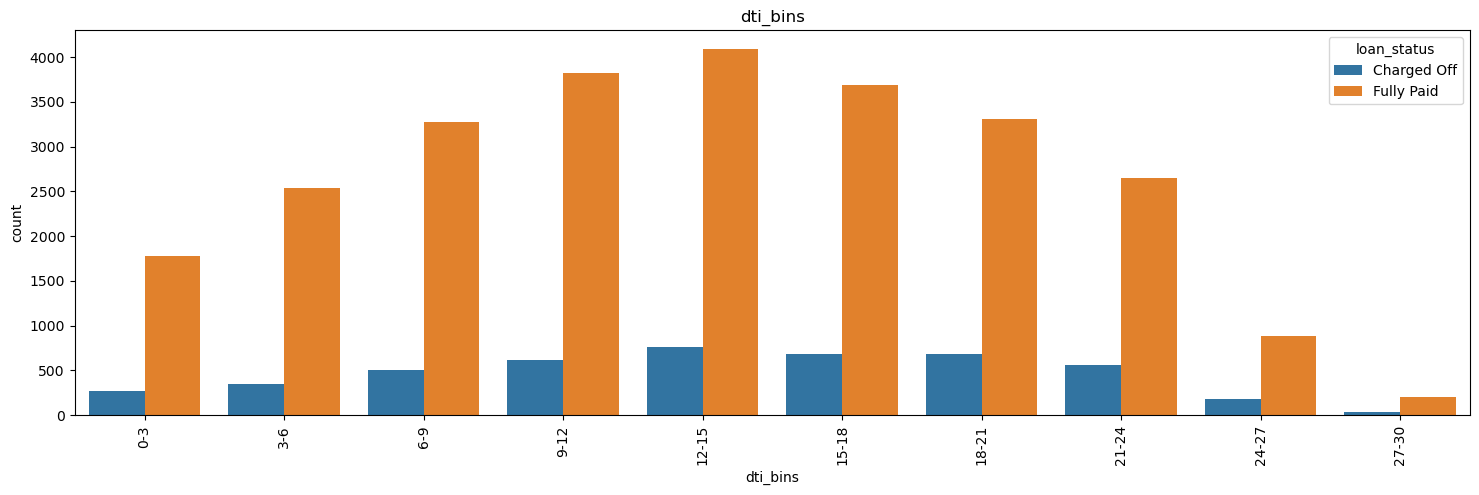

In [85]:
plotAttributeVsLoanStatus('dti_bins')

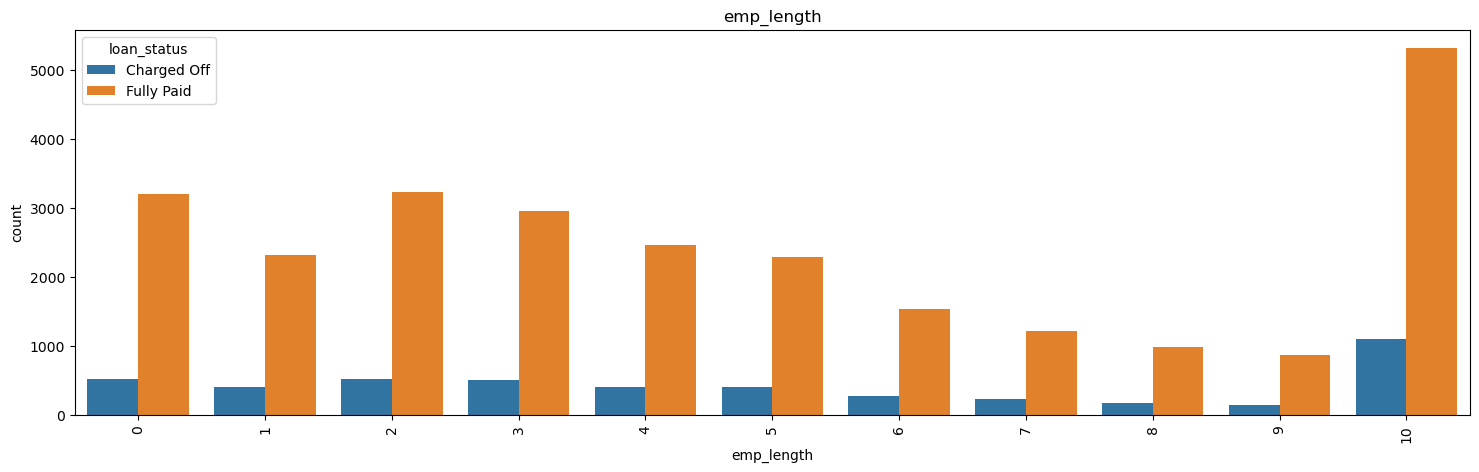

In [86]:
plotAttributeVsLoanStatus('emp_length')

## Insights from the analysis of Charged Off data

- The count of defaulters are higher in 36 months term with about 2500 charge-off whereas it is just 2000 for 60 month term. So, there is a possibility that short term loans are more risky and prone to higher default rate
- B, C and D grade loans results in more defaults whereas A and B category loans are majoritily paid fully
- B5 Sub-grade loans resultedin more default cases followed by B3, C2, B4, C1
- Borrowers who are staying on rent or fall under mortgage category are more likely to default the loan
- Borrowers who are source verified have less default rate than non verified or verified borrowers
- CA state has more number of loan defaulters followed by FL and NY. If we compare the total number of loans issues in FL and NY, FL has more defaulters than NY
- Majority default cases happened in Dec-2011 also majority loans were issued in this year which is indicating financial slowdown or recession 
- In May-16 most of the loan credit reports are pulled out of which around 1700 were for loan defaults and 5900 for fully paid loans
- Loand borrowed with the purpose of debt_consolidation resulted in more default
- Borrowers with annual income between 39k–40k have more default rate followed by people in the range of 35k-36k and 29-30k
- people with 12-15 dti ratio are more prone to loan default
- Most of the loan defaulters have employment length of 10 years

## <font color='purple'> Bivariate analysis for categorical variables </font>

### Term Vs Loan Amount, Interest Rate and Dti

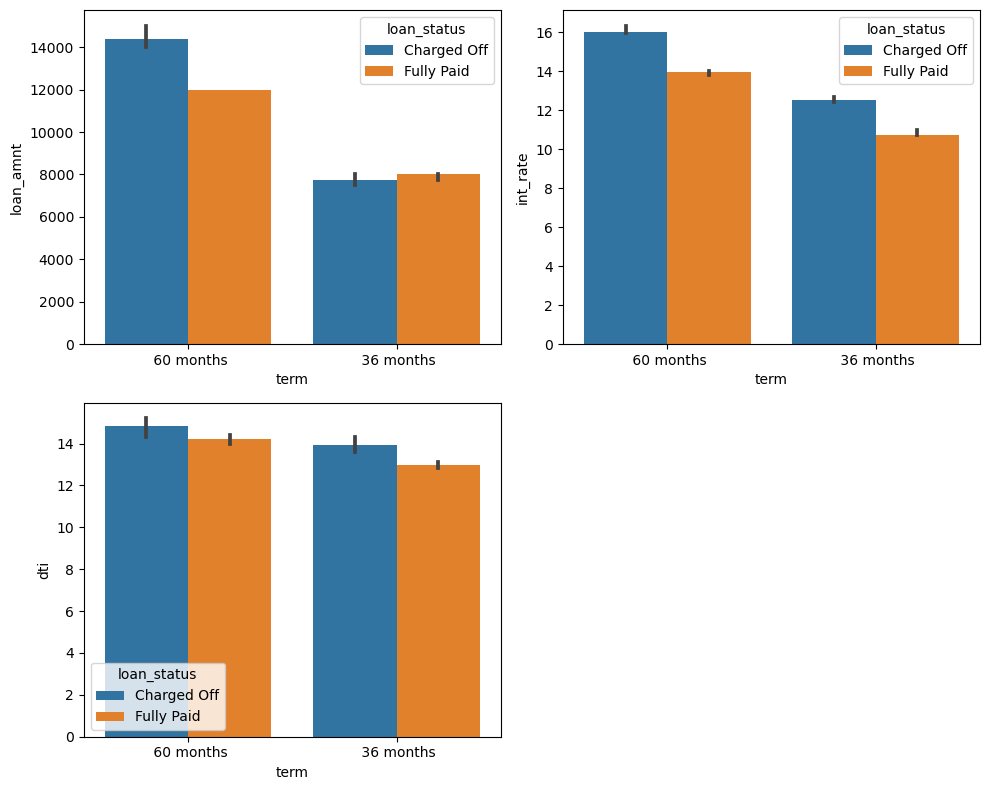

In [87]:
# Get the 2*2 grid and plot the subplots as specified below
figure, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

# Distribution Plot for Term vs Loan Amount
ax = axes[0,0]    
sns.barplot(x='term', y='loan_amnt', hue='loan_status', ax=ax, data=loan_df, estimator=np.median)

# Distribution Plot for Term vs interest rate
ax = axes[0,1] 
sns.barplot(x='term', y='int_rate', hue='loan_status', ax=ax, data=loan_df, estimator=np.median)

# Distribution Plot for Term vs Dti
ax = axes[1,0]   
sns.barplot(x='term', y='dti', hue='loan_status', ax=ax, data=loan_df, estimator=np.median)

figure.delaxes(axes[1][1])
figure.tight_layout()

plt.show()

#### Observations:
- It appears that more borrowers defaulted on loans with terms of 60 months than 36 months when the loan amount is higher whereas when the loan amount is lesser there is not much different in loan default and fully paid rate. 
- Both the 36-month tenure and the 60-month tenure have higher default rates with higher interest rates.
- As the Debit to Income Ratio increases, charge-offs are increasing as compared to fully pais loans.

### Grade Vs Loan Amount, Interest Rate and Dti

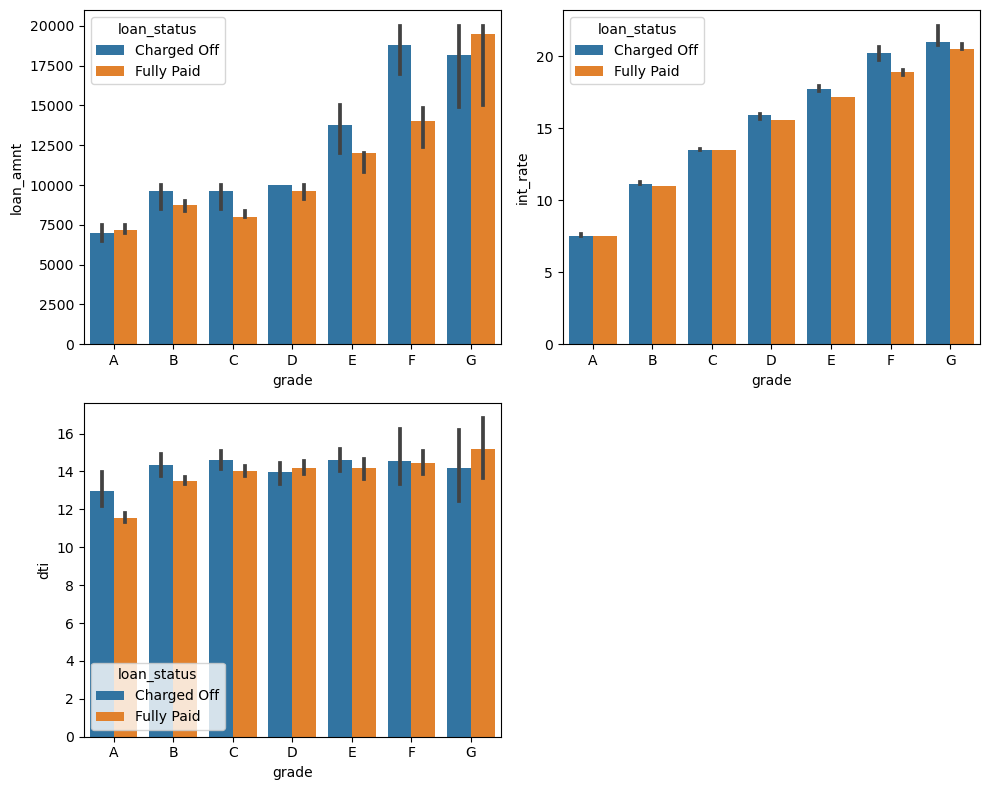

In [88]:
# Get the 2*2 grid and plot the subplots as specified below
figure, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

# Distribution Plot for Grade vs Loan Amount
ax = axes[0,0]    
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', ax=ax, data=loan_df, estimator=np.median, order= ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Distribution Plot for Grade vs interest rate
ax = axes[0,1] 
sns.barplot(x='grade', y='int_rate', hue='loan_status', ax=ax, data=loan_df, estimator=np.median,order= ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Distribution Plot for Grade vs Dti
ax = axes[1,0]   
sns.barplot(x='grade', y='dti', hue='loan_status', ax=ax, data=loan_df, estimator=np.median,order= ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

figure.delaxes(axes[1][1])
figure.tight_layout()

plt.show()

#### Observations
- F, G and E grade people are more prone to loan default. Loans with lower grades are issued with more amount that can be another reason for default.
- The interest rate gradually rises as grade drops. and they are increasingly likely to default on the loan.
- In terms of each grade and loan status, the dti hasn't changed all that much.

### Emp Length Vs Loan Amount, Interest Rate and Dti

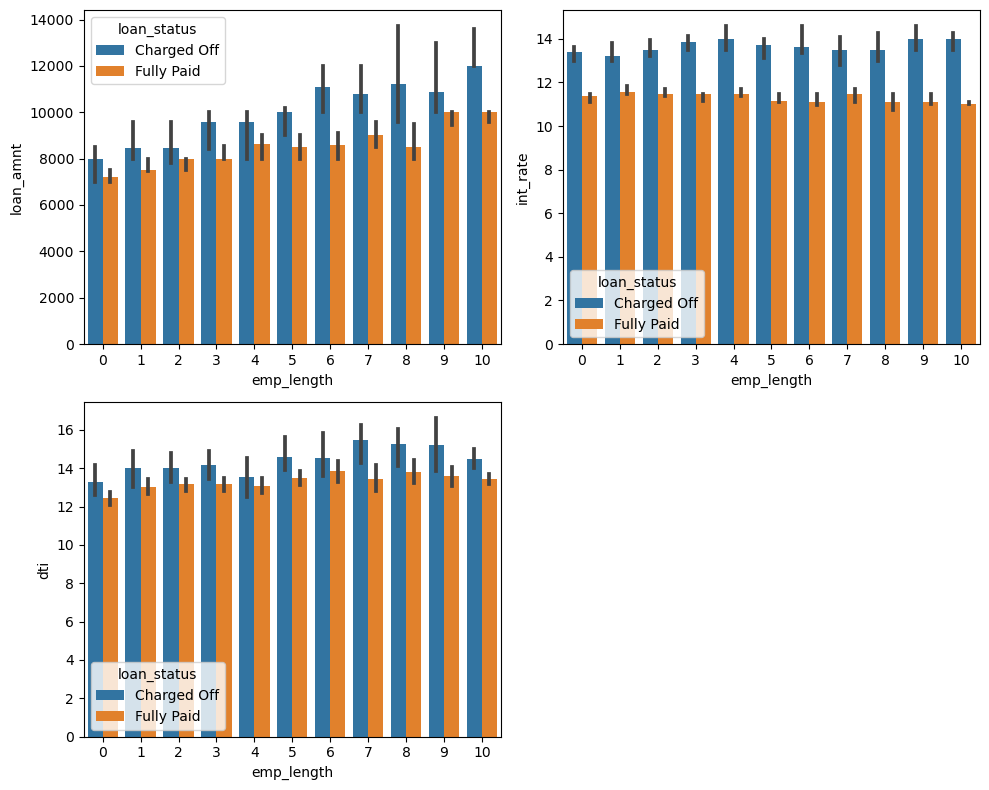

In [89]:
# Get the 2*2 grid and plot the subplots as specified below
figure, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

# Distribution Plot for emp length vs Loan Amount
ax = axes[0,0]    
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', ax=ax, data=loan_df, estimator=np.median)

# Distribution Plot for emp length vs interest rate
ax = axes[0,1] 
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', ax=ax, data=loan_df, estimator=np.median)

# Distribution Plot for emp length vs Dti
ax = axes[1,0]   
sns.barplot(x='emp_length', y='dti', hue='loan_status', ax=ax, data=loan_df, estimator=np.median)

figure.delaxes(axes[1][1])
figure.tight_layout()

plt.show()

#### Observations
- As the employment length increases loan amount increases so does the default rate
- Interest rates looks similar for borrowers with all the emmployment lengths
- DTI and Employment Length do not indicate any patterns about defaults.

### Home Ownership Vs Loan Amount, Interest Rate and Dti

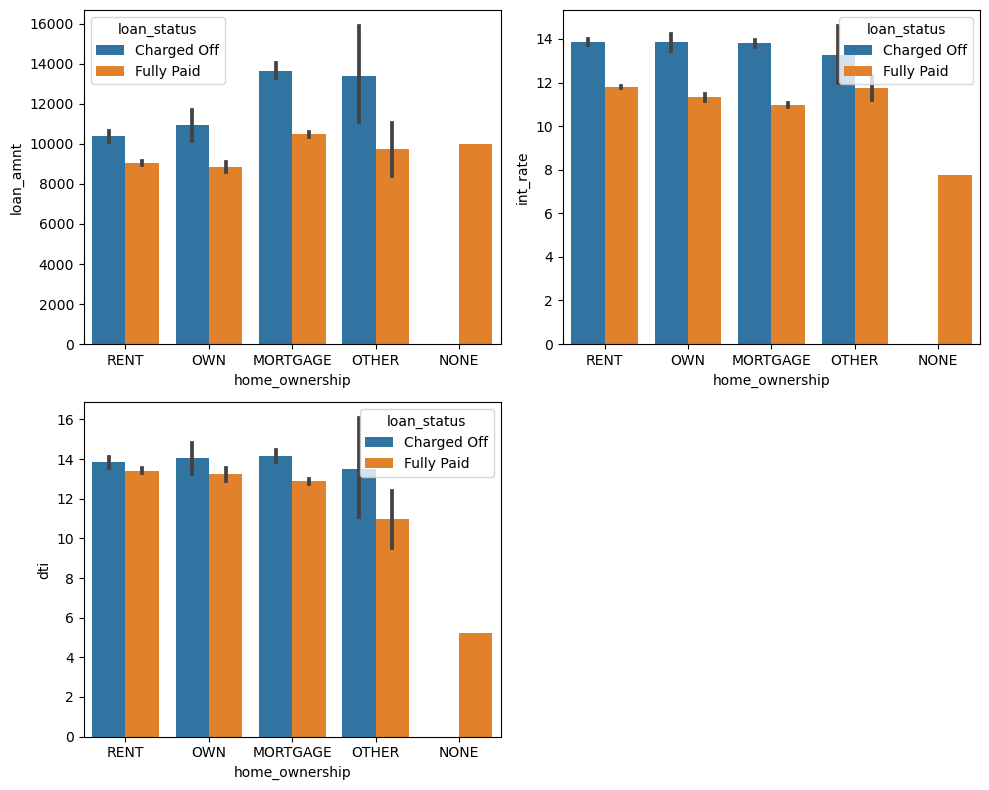

In [90]:
# Get the 2*2 grid and plot the subplots as specified below
figure, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

# Distribution Plot for home ownership vs Loan Amount
ax = axes[0,0]    
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', ax=ax, data=loan_df)

# Distribution Plot for home ownership vs interest rate
ax = axes[0,1] 
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', ax=ax, data=loan_df)

# Distribution Plot for home ownership vs Dti
ax = axes[1,0]   
sns.barplot(x='home_ownership', y='dti', hue='loan_status', ax=ax, data=loan_df)

figure.delaxes(axes[1][1])
figure.tight_layout()

plt.show()

#### Observations:
- With higher loan amount, borrowers from Mortgage and Other home ownership types has more default rate
- When the interest rate is high, the default rate is high regardless of home ownership.
- It is observed that higher the dti, more is the default rate across all the borrowers irrespective of their home ownership type.

### Verification Status Vs Loan Amount, Interest Rate and Dti

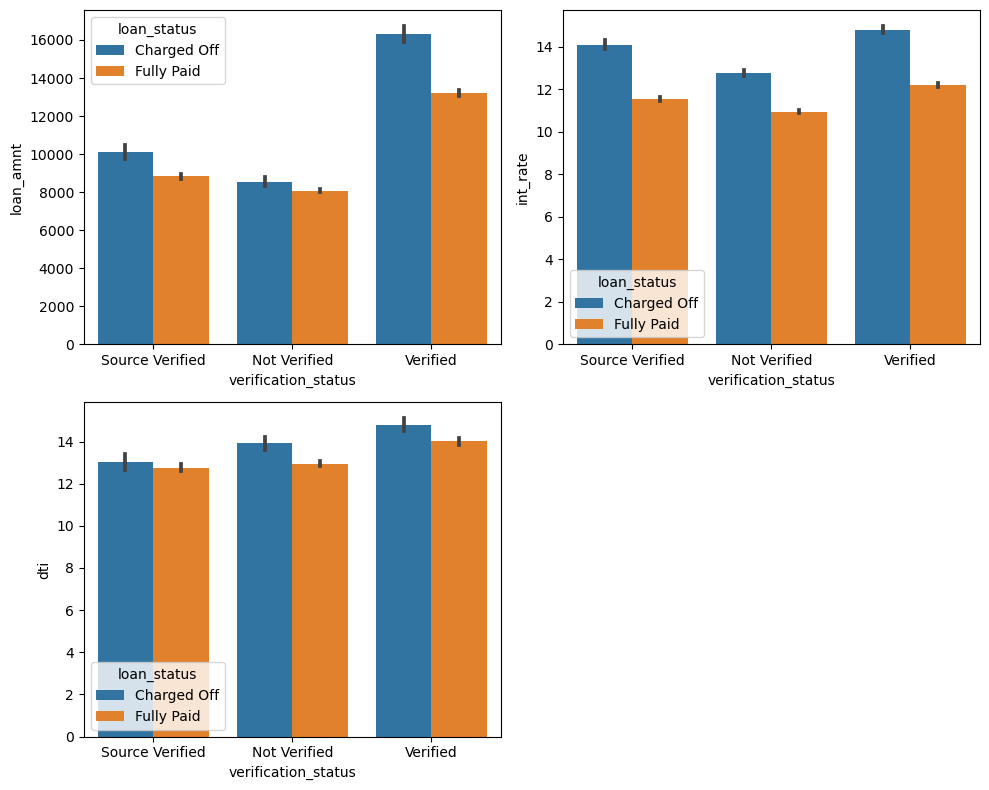

In [91]:
# Get the 2*2 grid and plot the subplots as specified below
figure, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))

# Distribution Plot for verification status vs Loan Amount
ax = axes[0,0]    
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', ax=ax, data=loan_df)

# Distribution Plot for verification status vs interest rate
ax = axes[0,1] 
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', ax=ax, data=loan_df)

# Distribution Plot for verification status vs Dti
ax = axes[1,0]   
sns.barplot(x='verification_status', y='dti', hue='loan_status', ax=ax, data=loan_df)

figure.delaxes(axes[1][1])
figure.tight_layout()

plt.show()

#### Observations:

- Loan amounts for verified loans are higher and so is the default rate. 
- Higher interest rates cause loan default regardless of verification status.
- The dti ratio for defaulted loans is higher across all categories of verification status.

### Purpose Vs Loan Amount, Interest Rate and Dti

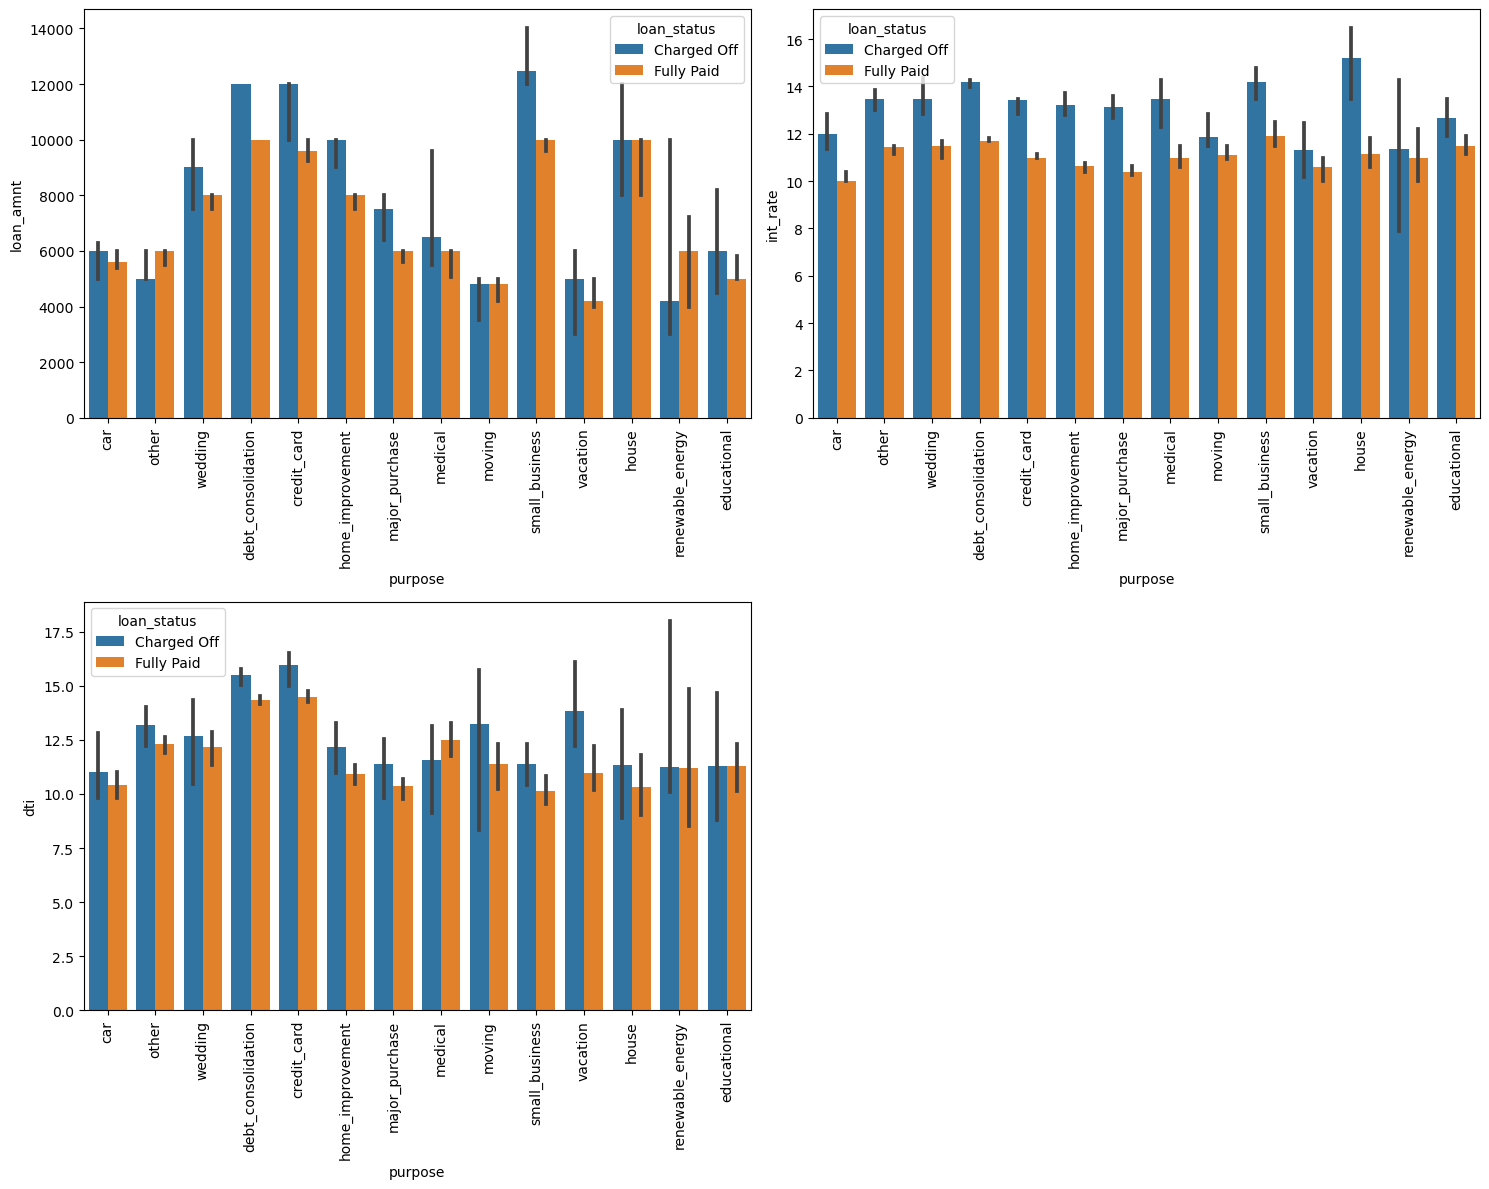

In [92]:
# Get the 2*2 grid and plot the subplots as specified below
figure, axes = plt.subplots(nrows=2,ncols=2,figsize=(15,12))

# Distribution Plot for Purpose vs Loan Amount
ax = axes[0,0]    
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', ax=ax, data=loan_df, estimator=np.median)
plt.setp( axes[0,0].xaxis.get_majorticklabels(), rotation=90 )

# Distribution Plot for Purpose vs interest rate
ax = axes[0,1] 
sns.barplot(x='purpose', y='int_rate', hue='loan_status', ax=ax, data=loan_df, estimator=np.median)
plt.setp( axes[0,1].xaxis.get_majorticklabels(), rotation=90 )

# Distribution Plot for Purpose vs Dti
ax = axes[1,0]   
sns.barplot(x='purpose', y='dti', hue='loan_status', ax=ax, data=loan_df, estimator=np.median)
plt.setp( axes[1,0].xaxis.get_majorticklabels(), rotation=90 )

figure.delaxes(axes[1][1])
figure.tight_layout()

plt.show()

#### Observations:
- Default rates for small businesses are higher when the loan amount is likewise large folled by debt consolidation and credit card loans.
- Home loans and small business loans tends to default more if the interest rates are higher
- Higer the dti ratio, more is the default rate for creadit card and deb consolidation loans

### Loan Amount vs Interest Rate

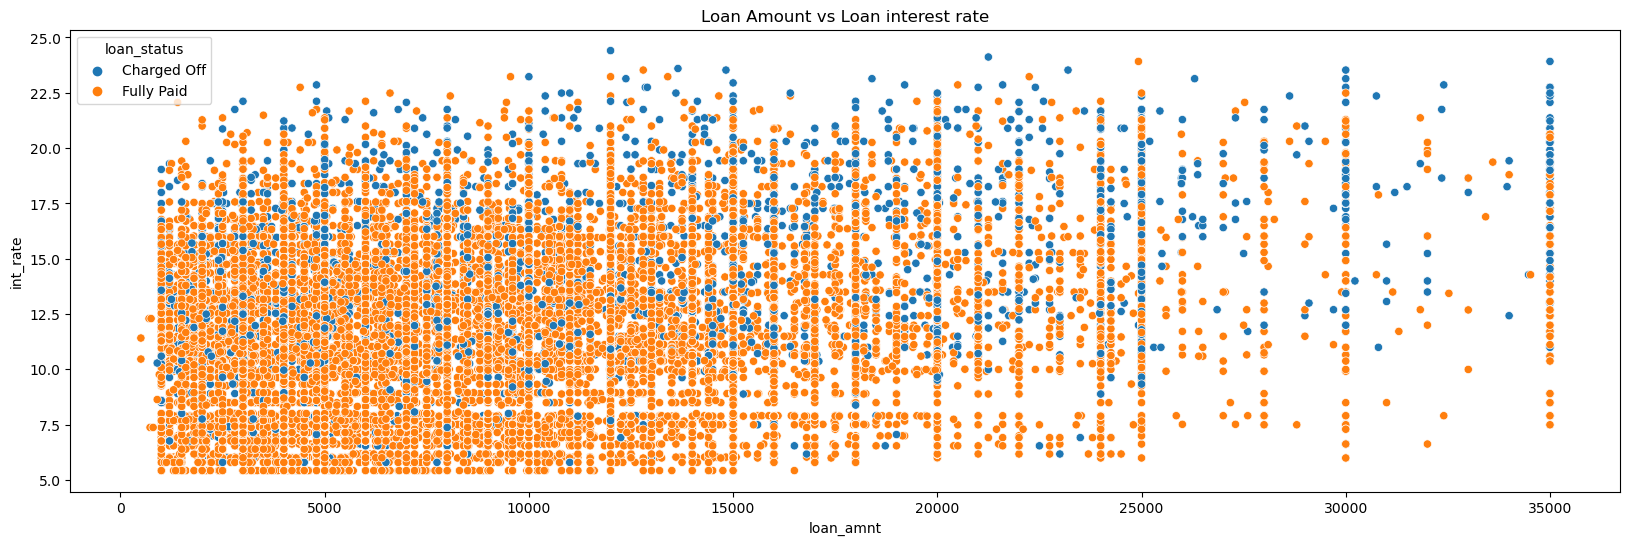

In [93]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_df, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

#### Observartions:
Values are essentially dispersed throughout the entire area. The spread does not exhibit any particular pattern.

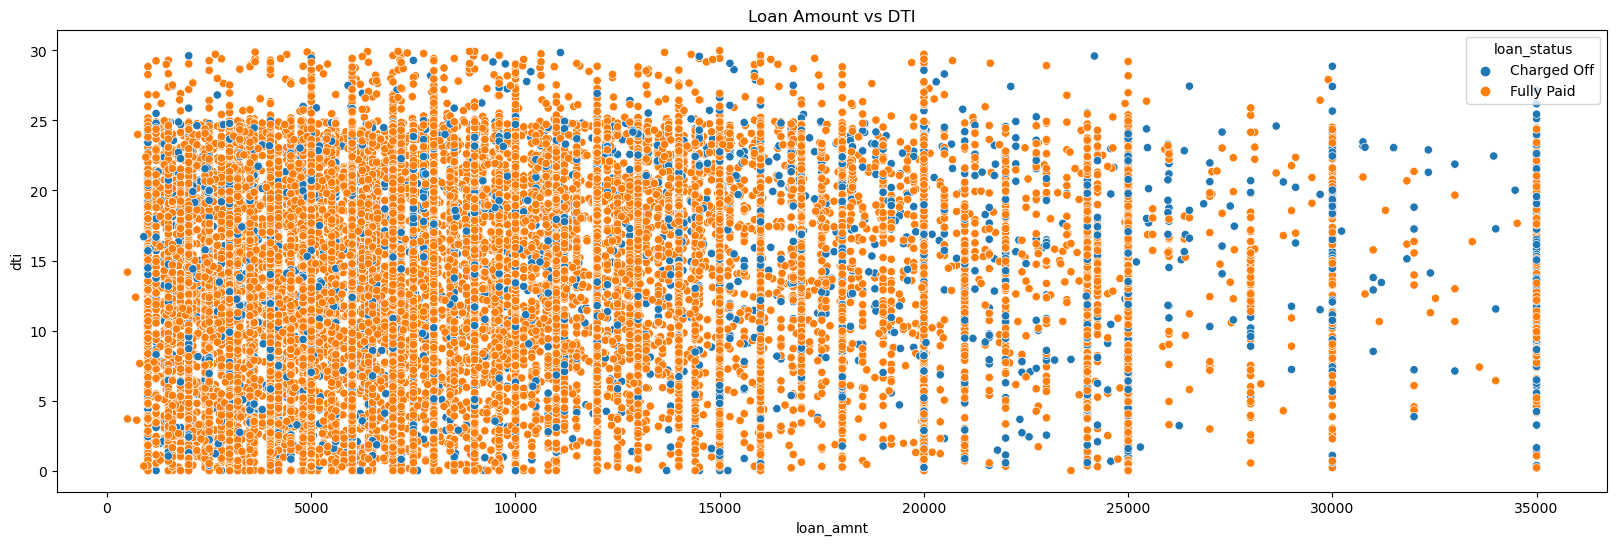

In [94]:
### Loan Amount vs DTI

plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=loan_df, hue='loan_status')
plt.title('Loan Amount vs DTI')
plt.show()

#### Observartions:
Values are essentially dispersed throughout the entire area. The spread does not exhibit any particular pattern.